<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-libraries-and-datasets-and-write-user-defined-functions" data-toc-modified-id="Import-required-libraries-and-datasets-and-write-user-defined-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required libraries and datasets and write user-defined functions</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Department" data-toc-modified-id="Department-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Department</a></span></li><li><span><a href="#Region" data-toc-modified-id="Region-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Region</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Recruitment-Channel" data-toc-modified-id="Recruitment-Channel-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Recruitment Channel</a></span></li><li><span><a href="#No-of-Trainings" data-toc-modified-id="No-of-Trainings-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>No of Trainings</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Previous-Year-Rating" data-toc-modified-id="Previous-Year-Rating-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Previous Year Rating</a></span></li><li><span><a href="#Length-of-Service" data-toc-modified-id="Length-of-Service-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Length of Service</a></span></li><li><span><a href="#KPIs-met-&gt;-80%?" data-toc-modified-id="KPIs-met->-80%?-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>KPIs met &gt; 80%?</a></span></li><li><span><a href="#Awards-Won" data-toc-modified-id="Awards-Won-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Awards Won</a></span></li><li><span><a href="#Average-Training-Score" data-toc-modified-id="Average-Training-Score-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Average Training Score</a></span></li></ul></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><span><a href="#Dummify-categorical-variables" data-toc-modified-id="Dummify-categorical-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummify categorical variables</a></span></li><li><span><a href="#Divide-into-train-and-test" data-toc-modified-id="Divide-into-train-and-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Divide into train and test</a></span></li><li><span><a href="#Scale-numerical-columns" data-toc-modified-id="Scale-numerical-columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scale numerical columns</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Accuracy-Score" data-toc-modified-id="Accuracy-Score-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Accuracy Score</a></span></li><li><span><a href="#Classification-Report" data-toc-modified-id="Classification-Report-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Classification Report</a></span></li><li><span><a href="#ROC-AUC" data-toc-modified-id="ROC-AUC-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ROC-AUC</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Model-Scoring" data-toc-modified-id="Model-Scoring-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model Scoring</a></span></li></ul></li></ul></div>

### Import required libraries and datasets and write user-defined functions

In [1]:
# Import required libraries
import swifter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import distributed.joblib

In [2]:
# Selective imports
from itertools import product
from dask.distributed import Client
from IPython.display import display_html, HTML
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

In [3]:
# Set up client and options
%matplotlib inline
client = Client()
palette = sns.cubehelix_palette()

In [4]:
def plot_dist(df, var, target, dist='cat'):
    '''Seaborn categorical plotting function facetting on target variable'''
    if dist == 'cat':
        plot = sns.catplot(x=var, col=target, data=df, palette=palette, kind='count')
        plot.set_xticklabels(rotation=90);
    elif dist == 'num':
        plot = sns.boxplot(y=var, x=target, data=df, palette=palette)

In [5]:
def plot_confusion_matrix( cm, normalize=False, cmap=plt.cm.Accent):
        '''
        This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
        '''
        classes = [0, 1]

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Confusion matrix with normalization'

        else:
            title = 'Confusion matrix without normalization'

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [6]:
def roc_plot( fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

In [7]:
def plot_roc_curve( y_train_true, train_pred_prob, y_test_true, test_pred_prob, *args):
    '''
    Generates roc plot for train and test and superimposes them
    '''

    AUC_Train = roc_auc_score(y_train_true, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_true, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_true, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(
            y_test_true, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_true, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(
            y_test_true, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [8]:
# Read the dataset
df = pd.read_csv('../data/raw/train_LZdllcl.csv', low_memory=False, encoding='latin1')
validation = pd.read_csv('../data/raw/test_2umaH9m.csv', low_memory=False, encoding='latin1')

In [9]:
# Print the dimensions
print('Shape of the training data is :', df.shape)
print('Shape of the validation data is :', validation.shape)

Shape of the training data is : (54808, 14)
Shape of the validation data is : (23490, 13)


In [10]:
# Print the first few rows
print('Head of the training data is :\n')
df.head(3)

Head of the training data is :



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


### Exploratory Data Analysis

#### Department

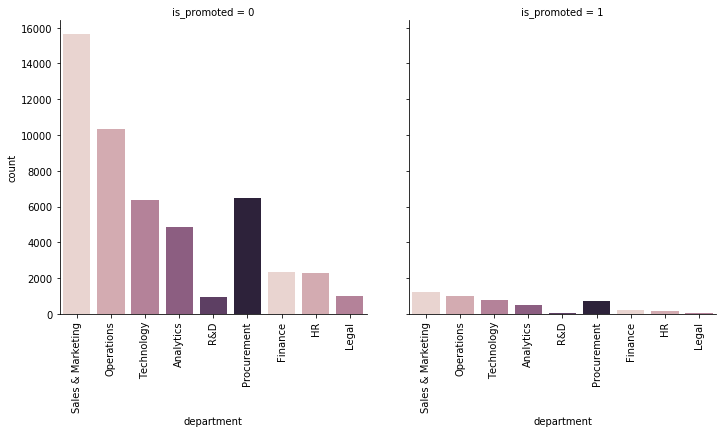

In [11]:
plot_dist(df, 'department', 'is_promoted')

#### Region

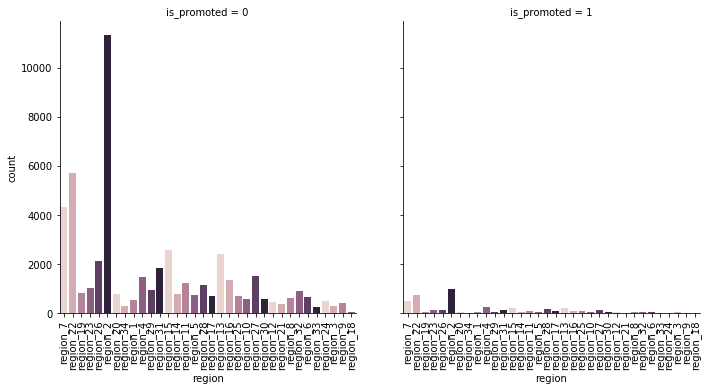

In [12]:
plot_dist(df, 'region', 'is_promoted')

#### Education

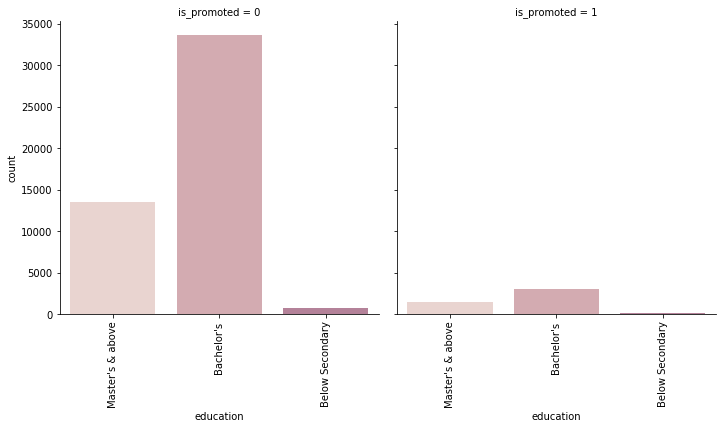

In [13]:
plot_dist(df, 'education', 'is_promoted')

#### Gender

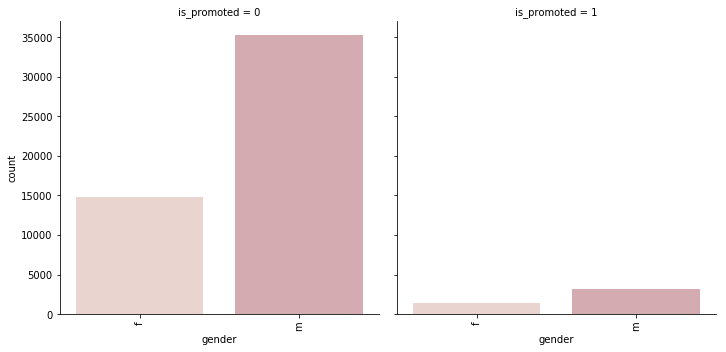

In [14]:
plot_dist(df, 'gender', 'is_promoted')

#### Recruitment Channel

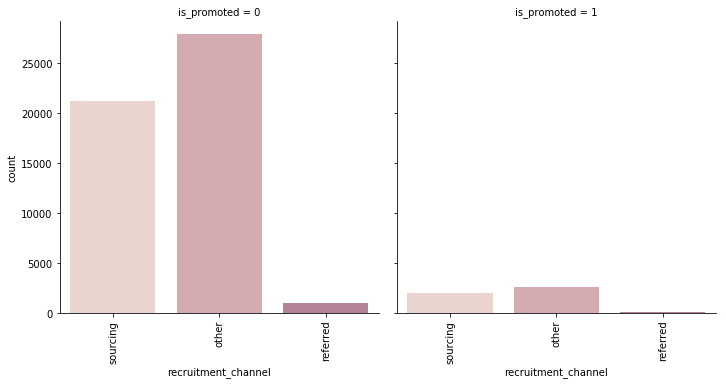

In [15]:
plot_dist(df, 'recruitment_channel', 'is_promoted')

#### No of Trainings

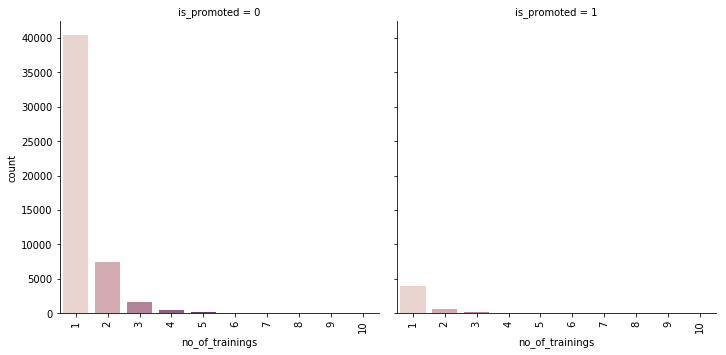

In [16]:
plot_dist(df, 'no_of_trainings', 'is_promoted')

#### Age

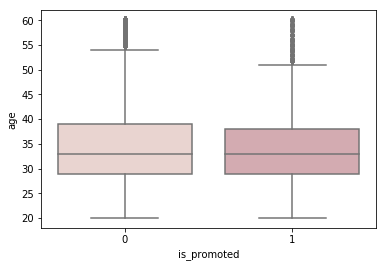

In [17]:
plot_dist(df, 'age', 'is_promoted', 'num')

#### Previous Year Rating

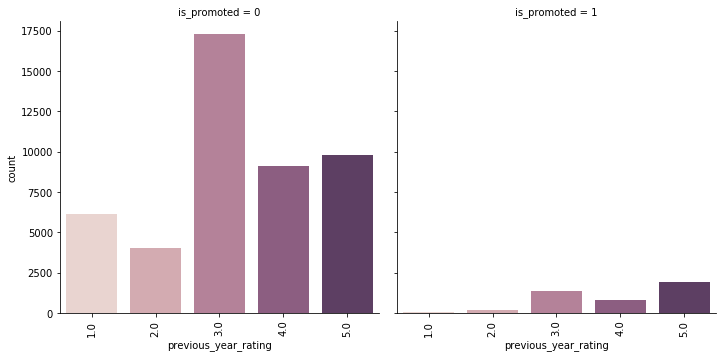

In [18]:
plot_dist(df, 'previous_year_rating', 'is_promoted')

#### Length of Service

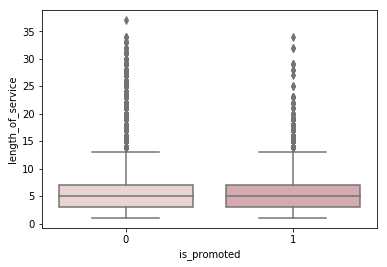

In [19]:
plot_dist(df, 'length_of_service', 'is_promoted', 'num')

#### KPIs met > 80%?

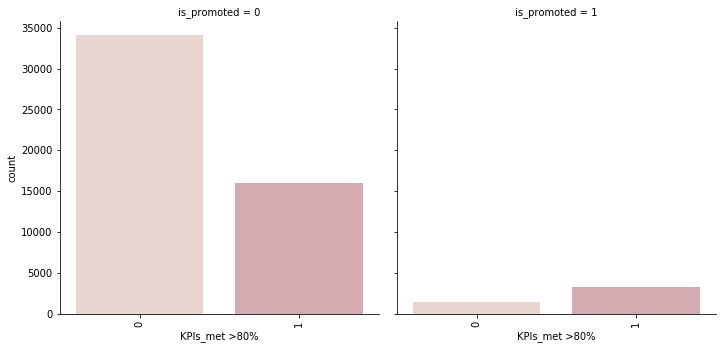

In [20]:
plot_dist(df, 'KPIs_met >80%', 'is_promoted')

#### Awards Won

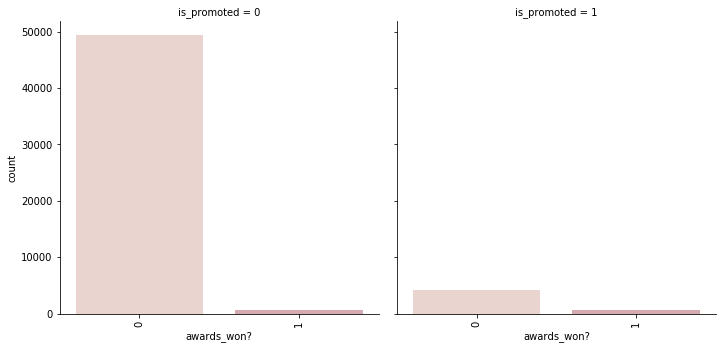

In [21]:
plot_dist(df, 'awards_won?', 'is_promoted')

#### Average Training Score

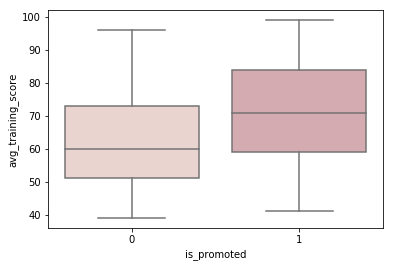

In [22]:
plot_dist(df, 'avg_training_score', 'is_promoted', 'num')

### Data Manipulation

In [23]:
# Categortical columns
cat_cols = ['department', 
            'region', 
            'education', 
            'gender', 
            'recruitment_channel', 
            'previous_year_rating', 
            'KPIs_met >80%', 
            'awards_won?']

# Numerical columns
num_cols = ['no_of_trainings', 
            'age', 
            'length_of_service', 
            'avg_training_score']

# Target columns
target_cols = ['employee_id', 'is_promoted']

#### Dummify categorical variables

In [24]:
# Dummify data 
df = pd.get_dummies(data=df, columns=cat_cols, dummy_na=True, drop_first=True)
validation = pd.get_dummies(data=validation, columns=cat_cols, dummy_na=True, drop_first=True)

In [25]:
# Print the dimensions
print('Shape of the training data is :', df.shape)
print('Shape of the validation data is :', validation.shape)

Shape of the training data is : (54808, 66)
Shape of the validation data is : (23490, 65)


In [26]:
# Print the first few rows
print('Head of the dataframe is :\n')
df.head(3)

Head of the dataframe is :



,employee_id,no_of_trainings,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,department_nan,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,region_nan,education_Below Secondary,education_Master's & above,education_nan,gender_m,gender_nan,recruitment_channel_referred,recruitment_channel_sourcing,recruitment_channel_nan,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_nan,KPIs_met >80%_1.0,KPIs_met >80%_nan,awards_won?_1.0,awards_won?_nan
0,65438,1,35,8,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,65141,1,30,4,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7513,1,34,7,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0


#### Divide into train and test

In [27]:
X = df.copy().drop(target_cols, axis=1)
y = df[target_cols]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [29]:
X_valid = validation.copy().drop('employee_id', axis=1)

In [30]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (43846, 64)
Shape of X_test :  (10962, 64)
Shape of y_train :  (43846, 2)
Shape of y_test :  (10962, 2)


#### Scale numerical columns

In [31]:
for i in num_cols:
    mean = X_train[i].mean()
    std = X_train[i].std()
    X_train[i] = X_train[i].swifter.apply(lambda x : ((x-mean)/std))
    X_test[i] = X_test[i].swifter.apply(lambda x : ((x-mean)/std))
    X_valid[i] = X_valid[i].swifter.apply(lambda x : ((x-mean)/std))

### Modelling

In [33]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

In [57]:
params = dict(n_estimators=[50, 100, 200], 
              max_depth=[3, 5, 7], 
              scale_pos_weight=[1, 3, 6, 9])

# Fit for train
model = CatBoostClassifier(random_state=1)
grid = GridSearchCV(model, 
                    params, 
                    n_jobs=-1, 
                    cv=5, 
                    scoring='f1', 
                    verbose=2)

grid.fit(X_train, y_train['is_promoted'],
         cat_features=categorical_features_indices,
         eval_set=(X_test, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=3, n_estimators=50, scale_pos_weight=1 ................
[CV] max_depth=3, n_estimators=50, scale_pos_weight=1 ................
[CV] max_depth=3, n_estimators=50, scale_pos_weight=1 ................
[CV] max_depth=3, n_estimators=50, scale_pos_weight=1 ................
Learning rate set to 0.408619
Learning rate set to 0.40862
Learning rate set to 0.40862
Learning rate set to 0.40862
0:	learn: 0.3610439	test: 1.4028559	best: 1.4028559 (0)	total: 357ms	remaining: 17.5s
0:	learn: 0.3576673	test: 1.4102387	best: 1.4102387 (0)	total: 434ms	remaining: 21.3s
0:	learn: 0.3910507	test: 1.3077256	best: 1.3077256 (0)	total: 481ms	remaining: 23.6s
0:	learn: 0.3579924	test: 1.4092319	best: 1.4092319 (0)	total: 446ms	remaining: 21.9s
1:	learn: 0.2833952	test: 1.8842816	best: 1.4028559 (0)	total: 755ms	remaining: 18.1s
1:	learn: 0.2803534	test: 1.8832341	best: 1.4102387 (0)	total: 801ms	remaining: 19.2s
1:	learn: 0.2854956	t

23:	learn: 0.1840253	test: 3.4493258	best: 1.4028559 (0)	total: 10.8s	remaining: 11.7s
23:	learn: 0.1743846	test: 3.6322084	best: 1.4102387 (0)	total: 10.9s	remaining: 11.8s
22:	learn: 0.1786733	test: 3.4240895	best: 1.3077256 (0)	total: 11s	remaining: 12.9s
22:	learn: 0.1733083	test: 3.6302927	best: 1.4092319 (0)	total: 10.9s	remaining: 12.7s
24:	learn: 0.1808142	test: 3.5301238	best: 1.4028559 (0)	total: 11.4s	remaining: 11.4s
24:	learn: 0.1742758	test: 3.6369567	best: 1.4102387 (0)	total: 11.6s	remaining: 11.6s
23:	learn: 0.1785040	test: 3.4295540	best: 1.3077256 (0)	total: 11.7s	remaining: 12.6s
23:	learn: 0.1731438	test: 3.6304274	best: 1.4092319 (0)	total: 11.7s	remaining: 12.7s
25:	learn: 0.1805741	test: 3.5321548	best: 1.4028559 (0)	total: 12.1s	remaining: 11.2s
25:	learn: 0.1739770	test: 3.6415369	best: 1.4102387 (0)	total: 12.4s	remaining: 11.4s
24:	learn: 0.1767461	test: 3.5406237	best: 1.3077256 (0)	total: 12.5s	remaining: 12.5s
24:	learn: 0.1717416	test: 3.6430433	best: 1.

45:	learn: 0.1632091	test: 4.3515113	best: 1.4092319 (0)	total: 21.6s	remaining: 1.87s
46:	learn: 0.1673061	test: 3.7993133	best: 1.4028559 (0)	total: 21.8s	remaining: 1.39s
48:	learn: 0.1654074	test: 3.8978214	best: 1.4102387 (0)	total: 22.2s	remaining: 454ms
46:	learn: 0.1683987	test: 3.8166374	best: 1.3077256 (0)	total: 22.3s	remaining: 1.42s
46:	learn: 0.1631910	test: 4.3536033	best: 1.4092319 (0)	total: 22.2s	remaining: 1.42s
47:	learn: 0.1671473	test: 3.8001938	best: 1.4028559 (0)	total: 22.5s	remaining: 938ms
49:	learn: 0.1653423	test: 3.9032387	best: 1.4102387 (0)	total: 23s	remaining: 0us

bestTest = 1.410238661
bestIteration = 0

Shrink model to first 1 iterations.
47:	learn: 0.1683328	test: 3.8186850	best: 1.3077256 (0)	total: 23.2s	remaining: 967ms
47:	learn: 0.1630986	test: 4.3561803	best: 1.4092319 (0)	total: 23.2s	remaining: 968ms
48:	learn: 0.1664748	test: 3.8053080	best: 1.4028559 (0)	total: 23.6s	remaining: 482ms
48:	learn: 0.1680623	test: 3.8242284	best: 1.3077256 (0

19:	learn: 0.1727787	test: 3.5881923	best: 1.4130695 (0)	total: 7.84s	remaining: 11.8s
17:	learn: 0.3184846	test: 2.6190898	best: 1.1153011 (0)	total: 7.19s	remaining: 12.8s
17:	learn: 0.3127590	test: 2.5480532	best: 1.1385852 (0)	total: 7.39s	remaining: 13.1s
16:	learn: 0.3195201	test: 2.7460291	best: 1.1196974 (0)	total: 7.08s	remaining: 13.7s
20:	learn: 0.1724514	test: 3.5911294	best: 1.4130695 (0)	total: 8.2s	remaining: 11.3s
18:	learn: 0.3181851	test: 2.6238588	best: 1.1153011 (0)	total: 7.54s	remaining: 12.3s
18:	learn: 0.3119772	test: 2.5906060	best: 1.1385852 (0)	total: 7.76s	remaining: 12.7s
17:	learn: 0.3190801	test: 2.7577770	best: 1.1196974 (0)	total: 7.44s	remaining: 13.2s
21:	learn: 0.1720719	test: 3.6340330	best: 1.4130695 (0)	total: 8.52s	remaining: 10.8s
19:	learn: 0.3174479	test: 2.6418591	best: 1.1153011 (0)	total: 7.95s	remaining: 11.9s
19:	learn: 0.3118263	test: 2.5953677	best: 1.1385852 (0)	total: 8.09s	remaining: 12.1s
18:	learn: 0.3185394	test: 2.7604632	best: 1

40:	learn: 0.2909758	test: 3.0593167	best: 1.1385852 (0)	total: 15.8s	remaining: 3.47s
43:	learn: 0.1633680	test: 3.9249208	best: 1.4130695 (0)	total: 16.5s	remaining: 2.26s
40:	learn: 0.2861229	test: 3.0994663	best: 1.1196974 (0)	total: 15.6s	remaining: 3.42s
41:	learn: 0.2885066	test: 3.0894075	best: 1.1153011 (0)	total: 16s	remaining: 3.04s
41:	learn: 0.2898026	test: 3.0826162	best: 1.1385852 (0)	total: 16.2s	remaining: 3.08s
44:	learn: 0.1632885	test: 3.9314414	best: 1.4130695 (0)	total: 16.9s	remaining: 1.88s
41:	learn: 0.2854108	test: 3.3364042	best: 1.1196974 (0)	total: 15.9s	remaining: 3.04s
42:	learn: 0.2883053	test: 3.0949994	best: 1.1153011 (0)	total: 16.3s	remaining: 2.65s
42:	learn: 0.2894466	test: 3.0923560	best: 1.1385852 (0)	total: 16.6s	remaining: 2.7s
45:	learn: 0.1629860	test: 3.9358212	best: 1.4130695 (0)	total: 17.3s	remaining: 1.5s
42:	learn: 0.2852132	test: 3.3448150	best: 1.1196974 (0)	total: 16.3s	remaining: 2.65s
43:	learn: 0.2875923	test: 3.1002805	best: 1.11

12:	learn: 0.3301533	test: 2.4438307	best: 1.1158804 (0)	total: 6.77s	remaining: 19.3s
12:	learn: 0.3971477	test: 2.1736966	best: 1.0817110 (0)	total: 6.04s	remaining: 17.2s
12:	learn: 0.3904594	test: 1.9147988	best: 1.0266165 (0)	total: 6.29s	remaining: 17.9s
12:	learn: 0.3158587	test: 2.6975279	best: 1.1238135 (0)	total: 6.49s	remaining: 18.5s
13:	learn: 0.3270240	test: 2.5646383	best: 1.1158804 (0)	total: 7.21s	remaining: 18.5s
13:	learn: 0.3962214	test: 2.1726456	best: 1.0817110 (0)	total: 6.43s	remaining: 16.5s
13:	learn: 0.3847453	test: 1.9356635	best: 1.0266165 (0)	total: 6.64s	remaining: 17.1s
13:	learn: 0.3128212	test: 2.6939155	best: 1.1238135 (0)	total: 6.89s	remaining: 17.7s
14:	learn: 0.3262437	test: 2.5695988	best: 1.1158804 (0)	total: 7.63s	remaining: 17.8s
14:	learn: 0.3904921	test: 2.1799973	best: 1.0817110 (0)	total: 6.84s	remaining: 16s
14:	learn: 0.3841777	test: 1.9419066	best: 1.0266165 (0)	total: 7.07s	remaining: 16.5s
14:	learn: 0.3118425	test: 2.6973635	best: 1.

35:	learn: 0.2872986	test: 2.9622487	best: 1.1238135 (0)	total: 16.7s	remaining: 6.48s
36:	learn: 0.3467481	test: 2.7346764	best: 1.0817110 (0)	total: 16.4s	remaining: 5.78s
36:	learn: 0.3525652	test: 2.5202839	best: 1.0266165 (0)	total: 16.8s	remaining: 5.9s
36:	learn: 0.2885606	test: 3.2468106	best: 1.1158804 (0)	total: 17.7s	remaining: 6.24s
36:	learn: 0.2864214	test: 2.9974284	best: 1.1238135 (0)	total: 17.3s	remaining: 6.07s
37:	learn: 0.3461847	test: 2.7382352	best: 1.0817110 (0)	total: 17.1s	remaining: 5.39s
37:	learn: 0.3522300	test: 2.5206787	best: 1.0266165 (0)	total: 17.4s	remaining: 5.49s
37:	learn: 0.2880880	test: 3.3091029	best: 1.1158804 (0)	total: 18.3s	remaining: 5.77s
37:	learn: 0.2864185	test: 2.9991680	best: 1.1238135 (0)	total: 17.7s	remaining: 5.6s
38:	learn: 0.3447738	test: 2.7640725	best: 1.0817110 (0)	total: 17.5s	remaining: 4.94s
38:	learn: 0.3515468	test: 2.5253877	best: 1.0266165 (0)	total: 17.7s	remaining: 5s
38:	learn: 0.2859783	test: 3.3526356	best: 1.115

6:	learn: 0.4117687	test: 2.0280229	best: 1.0895621 (0)	total: 3.13s	remaining: 19.2s
6:	learn: 0.4554006	test: 1.4984011	best: 0.9271971 (0)	total: 3.14s	remaining: 19.3s
7:	learn: 0.4066451	test: 2.0075150	best: 1.0867369 (0)	total: 3.68s	remaining: 19.3s
8:	learn: 0.4072973	test: 1.8744430	best: 1.1002115 (0)	total: 3.8s	remaining: 17.3s
7:	learn: 0.4038192	test: 2.0489838	best: 1.0895621 (0)	total: 3.69s	remaining: 19.4s
7:	learn: 0.4368710	test: 1.5274853	best: 0.9271971 (0)	total: 3.69s	remaining: 19.4s
8:	learn: 0.4009600	test: 2.0943450	best: 1.0867369 (0)	total: 4.14s	remaining: 18.8s
9:	learn: 0.4055573	test: 1.8993737	best: 1.1002115 (0)	total: 4.22s	remaining: 16.9s
8:	learn: 0.4021867	test: 2.0942643	best: 1.0895621 (0)	total: 4.09s	remaining: 18.7s
8:	learn: 0.4193155	test: 1.6256373	best: 0.9271971 (0)	total: 4.13s	remaining: 18.8s
9:	learn: 0.4004645	test: 2.0993210	best: 1.0867369 (0)	total: 4.67s	remaining: 18.7s
10:	learn: 0.3912808	test: 2.4504179	best: 1.1002115 (0

30:	learn: 0.3636906	test: 2.3575670	best: 1.0867369 (0)	total: 14.7s	remaining: 9.02s
31:	learn: 0.3539803	test: 2.6439315	best: 1.1002115 (0)	total: 14.9s	remaining: 8.37s
31:	learn: 0.3672398	test: 2.5119675	best: 0.9271971 (0)	total: 14.8s	remaining: 8.3s
30:	learn: 0.3582018	test: 2.4639085	best: 1.0895621 (0)	total: 14.8s	remaining: 9.09s
31:	learn: 0.3617511	test: 2.6388089	best: 1.0867369 (0)	total: 15.1s	remaining: 8.51s
32:	learn: 0.3535030	test: 2.6609879	best: 1.1002115 (0)	total: 15.3s	remaining: 7.89s
32:	learn: 0.3570219	test: 2.6414255	best: 1.0867369 (0)	total: 15.6s	remaining: 8.01s
31:	learn: 0.3572513	test: 2.4787808	best: 1.0895621 (0)	total: 15.3s	remaining: 8.62s
32:	learn: 0.3652758	test: 2.5161138	best: 0.9271971 (0)	total: 15.3s	remaining: 7.91s
33:	learn: 0.3530385	test: 2.6650688	best: 1.1002115 (0)	total: 15.8s	remaining: 7.43s
33:	learn: 0.3566122	test: 2.8120912	best: 1.0867369 (0)	total: 15.9s	remaining: 7.5s
32:	learn: 0.3510312	test: 2.4871028	best: 1.

2:	learn: 0.4794194	test: 1.5802191	best: 0.9989706 (0)	total: 1.11s	remaining: 17.4s
2:	learn: 0.4769647	test: 1.5682683	best: 0.9857546 (0)	total: 1.11s	remaining: 17.5s
2:	learn: 0.4780309	test: 1.6210506	best: 0.9810880 (0)	total: 1.31s	remaining: 20.6s
Learning rate set to 0.40862
3:	learn: 0.4521745	test: 1.6153326	best: 0.9989706 (0)	total: 1.54s	remaining: 17.7s
3:	learn: 0.4518661	test: 1.6505306	best: 0.9810880 (0)	total: 1.84s	remaining: 21.1s
3:	learn: 0.4512339	test: 1.6032387	best: 0.9857546 (0)	total: 1.69s	remaining: 19.4s
0:	learn: 0.5627895	test: 0.9886007	best: 0.9886007 (0)	total: 495ms	remaining: 24.2s
4:	learn: 0.4468058	test: 1.6454808	best: 0.9989706 (0)	total: 2.05s	remaining: 18.5s
4:	learn: 0.4455938	test: 1.6846178	best: 0.9810880 (0)	total: 2.25s	remaining: 20.3s
1:	learn: 0.5082953	test: 1.4394367	best: 0.9886007 (0)	total: 899ms	remaining: 21.6s
4:	learn: 0.4451100	test: 1.6411843	best: 0.9857546 (0)	total: 2.15s	remaining: 19.3s
5:	learn: 0.4418915	test:

26:	learn: 0.3724277	test: 2.3117859	best: 0.9810880 (0)	total: 12s	remaining: 10.2s
23:	learn: 0.3933946	test: 1.9799894	best: 0.9886007 (0)	total: 10.6s	remaining: 11.4s
26:	learn: 0.3853907	test: 2.2853589	best: 0.9989706 (0)	total: 12s	remaining: 10.2s
26:	learn: 0.3854257	test: 2.1884231	best: 0.9857546 (0)	total: 11.9s	remaining: 10.2s
27:	learn: 0.3695078	test: 2.3165635	best: 0.9810880 (0)	total: 12.3s	remaining: 9.67s
24:	learn: 0.3897662	test: 1.9891418	best: 0.9886007 (0)	total: 10.9s	remaining: 10.9s
27:	learn: 0.3805369	test: 2.2380991	best: 0.9857546 (0)	total: 12.3s	remaining: 9.64s
27:	learn: 0.3846366	test: 2.2819626	best: 0.9989706 (0)	total: 12.4s	remaining: 9.76s
25:	learn: 0.3861809	test: 1.9902815	best: 0.9886007 (0)	total: 11.2s	remaining: 10.4s
28:	learn: 0.3653275	test: 2.4137882	best: 0.9810880 (0)	total: 12.7s	remaining: 9.18s
28:	learn: 0.3838415	test: 2.2819961	best: 0.9989706 (0)	total: 12.8s	remaining: 9.25s
28:	learn: 0.3760707	test: 2.2902933	best: 0.98

49:	learn: 0.3547767	test: 2.7886963	best: 0.9989706 (0)	total: 20.3s	remaining: 0us

bestTest = 0.9989706054
bestIteration = 0

Shrink model to first 1 iterations.
47:	learn: 0.3575432	test: 2.4486274	best: 0.9886007 (0)	total: 19.1s	remaining: 796ms
49:	learn: 0.3558131	test: 2.7761796	best: 0.9857546 (0)	total: 20.4s	remaining: 0us

bestTest = 0.9857545825
bestIteration = 0

Shrink model to first 1 iterations.
48:	learn: 0.3575414	test: 2.4483887	best: 0.9886007 (0)	total: 19.4s	remaining: 397ms
49:	learn: 0.3570881	test: 2.4495224	best: 0.9886007 (0)	total: 19.7s	remaining: 0us

bestTest = 0.9886007036
bestIteration = 0

Shrink model to first 1 iterations.
[CV] . max_depth=3, n_estimators=50, scale_pos_weight=9, total=  30.9s
[CV] max_depth=3, n_estimators=100, scale_pos_weight=1 ...............
[CV] . max_depth=3, n_estimators=50, scale_pos_weight=9, total=  30.8s
[CV] max_depth=3, n_estimators=100, scale_pos_weight=1 ...............
[CV] . max_depth=3, n_estimators=50, scale_pos_

20:	learn: 0.1894692	test: 3.1754581	best: 1.1928592 (0)	total: 7.83s	remaining: 29.5s
21:	learn: 0.1834469	test: 3.3336435	best: 1.1280097 (0)	total: 8.25s	remaining: 29.2s
18:	learn: 0.1887394	test: 3.3063045	best: 1.1972451 (0)	total: 7.09s	remaining: 30.2s
21:	learn: 0.1890526	test: 3.1930847	best: 1.1928592 (0)	total: 8.22s	remaining: 29.2s
21:	learn: 0.1864915	test: 3.4867057	best: 1.1979397 (0)	total: 8.09s	remaining: 28.7s
22:	learn: 0.1831694	test: 3.3388095	best: 1.1280097 (0)	total: 8.72s	remaining: 29.2s
22:	learn: 0.1881750	test: 3.1955131	best: 1.1928592 (0)	total: 8.6s	remaining: 28.8s
19:	learn: 0.1881224	test: 3.3329287	best: 1.1972451 (0)	total: 7.56s	remaining: 30.3s
22:	learn: 0.1862069	test: 3.4862991	best: 1.1979397 (0)	total: 8.52s	remaining: 28.5s
23:	learn: 0.1829846	test: 3.3416676	best: 1.1280097 (0)	total: 9.14s	remaining: 28.9s
23:	learn: 0.1879521	test: 3.1966396	best: 1.1928592 (0)	total: 9.03s	remaining: 28.6s
20:	learn: 0.1878813	test: 3.3555440	best: 1

44:	learn: 0.1701801	test: 3.7210579	best: 1.1979397 (0)	total: 17.1s	remaining: 20.9s
44:	learn: 0.1738464	test: 3.5530062	best: 1.1280097 (0)	total: 17.5s	remaining: 21.3s
45:	learn: 0.1748113	test: 3.6774523	best: 1.1928592 (0)	total: 17.4s	remaining: 20.5s
42:	learn: 0.1678602	test: 3.7902885	best: 1.1972451 (0)	total: 16.6s	remaining: 22s
45:	learn: 0.1698583	test: 3.7161958	best: 1.1979397 (0)	total: 17.6s	remaining: 20.6s
45:	learn: 0.1734923	test: 3.5551515	best: 1.1280097 (0)	total: 17.9s	remaining: 21.1s
46:	learn: 0.1728775	test: 3.6834175	best: 1.1928592 (0)	total: 17.9s	remaining: 20.2s
43:	learn: 0.1675917	test: 3.7933225	best: 1.1972451 (0)	total: 17s	remaining: 21.6s
46:	learn: 0.1689554	test: 3.7207354	best: 1.1979397 (0)	total: 17.9s	remaining: 20.2s
46:	learn: 0.1727584	test: 3.5588429	best: 1.1280097 (0)	total: 18.3s	remaining: 20.7s
47:	learn: 0.1726959	test: 3.6867650	best: 1.1928592 (0)	total: 18.3s	remaining: 19.8s
44:	learn: 0.1673841	test: 3.8133698	best: 1.19

67:	learn: 0.1688294	test: 3.7410898	best: 1.1280097 (0)	total: 26.6s	remaining: 12.5s
69:	learn: 0.1672332	test: 3.8236689	best: 1.1928592 (0)	total: 26.5s	remaining: 11.4s
65:	learn: 0.1630786	test: 4.0954084	best: 1.1972451 (0)	total: 25.5s	remaining: 13.1s
69:	learn: 0.1637586	test: 4.4379385	best: 1.1979397 (0)	total: 26.4s	remaining: 11.3s
68:	learn: 0.1687531	test: 3.7435453	best: 1.1280097 (0)	total: 27.1s	remaining: 12.2s
70:	learn: 0.1670666	test: 3.8244711	best: 1.1928592 (0)	total: 26.9s	remaining: 11s
66:	learn: 0.1629490	test: 4.0973991	best: 1.1972451 (0)	total: 25.9s	remaining: 12.8s
70:	learn: 0.1635714	test: 4.4382409	best: 1.1979397 (0)	total: 26.8s	remaining: 11s
71:	learn: 0.1669210	test: 3.8537125	best: 1.1928592 (0)	total: 27.3s	remaining: 10.6s
69:	learn: 0.1680577	test: 3.7486907	best: 1.1280097 (0)	total: 27.5s	remaining: 11.8s
67:	learn: 0.1627999	test: 4.1004810	best: 1.1972451 (0)	total: 26.3s	remaining: 12.4s
71:	learn: 0.1635714	test: 4.4382479	best: 1.19

92:	learn: 0.1608568	test: 4.6382289	best: 1.1979397 (0)	total: 37.9s	remaining: 2.85s
93:	learn: 0.1639809	test: 3.9681794	best: 1.1928592 (0)	total: 38.3s	remaining: 2.44s
89:	learn: 0.1606639	test: 4.3725453	best: 1.1972451 (0)	total: 37.2s	remaining: 4.14s
91:	learn: 0.1650961	test: 3.9536437	best: 1.1280097 (0)	total: 38.5s	remaining: 3.35s
93:	learn: 0.1607277	test: 4.6402454	best: 1.1979397 (0)	total: 38.3s	remaining: 2.44s
94:	learn: 0.1638368	test: 3.9686644	best: 1.1928592 (0)	total: 38.7s	remaining: 2.04s
90:	learn: 0.1605592	test: 4.3730989	best: 1.1972451 (0)	total: 37.7s	remaining: 3.73s
92:	learn: 0.1649973	test: 3.9530746	best: 1.1280097 (0)	total: 39s	remaining: 2.94s
94:	learn: 0.1606152	test: 4.6397863	best: 1.1979397 (0)	total: 38.7s	remaining: 2.04s
91:	learn: 0.1604802	test: 4.3889553	best: 1.1972451 (0)	total: 38.2s	remaining: 3.32s
95:	learn: 0.1635138	test: 3.9718898	best: 1.1928592 (0)	total: 39.3s	remaining: 1.64s
93:	learn: 0.1649567	test: 3.9517544	best: 1.

8:	learn: 0.3378703	test: 2.1577625	best: 0.9958021 (0)	total: 3.33s	remaining: 33.6s
11:	learn: 0.3504202	test: 2.2973510	best: 0.9926848 (0)	total: 4.44s	remaining: 32.5s
15:	learn: 0.1969257	test: 3.2183242	best: 1.1998998 (0)	total: 5.52s	remaining: 29s
15:	learn: 0.3192032	test: 2.4392542	best: 1.0084817 (0)	total: 5.51s	remaining: 29s
9:	learn: 0.3279586	test: 2.3158819	best: 0.9958021 (0)	total: 3.7s	remaining: 33.3s
12:	learn: 0.3497836	test: 2.3025816	best: 0.9926848 (0)	total: 4.8s	remaining: 32.1s
16:	learn: 0.1964956	test: 3.2229851	best: 1.1998998 (0)	total: 5.88s	remaining: 28.7s
16:	learn: 0.3188709	test: 2.4430989	best: 1.0084817 (0)	total: 5.93s	remaining: 29s
10:	learn: 0.3277724	test: 2.3273390	best: 0.9958021 (0)	total: 4s	remaining: 32.4s
13:	learn: 0.3492866	test: 2.3023342	best: 0.9926848 (0)	total: 5.17s	remaining: 31.7s
17:	learn: 0.1961611	test: 3.2194082	best: 1.1998998 (0)	total: 6.21s	remaining: 28.3s
17:	learn: 0.3172823	test: 2.4474828	best: 1.0084817 (0)

32:	learn: 0.3042589	test: 2.7780941	best: 0.9958021 (0)	total: 12s	remaining: 24.4s
38:	learn: 0.2956821	test: 2.9779813	best: 1.0084817 (0)	total: 14.1s	remaining: 22.1s
35:	learn: 0.3025164	test: 2.7672716	best: 0.9926848 (0)	total: 13.2s	remaining: 23.5s
39:	learn: 0.1677893	test: 3.6828821	best: 1.1998998 (0)	total: 14.3s	remaining: 21.4s
33:	learn: 0.3024150	test: 2.8768696	best: 0.9958021 (0)	total: 12.4s	remaining: 24s
39:	learn: 0.2954248	test: 2.9790612	best: 1.0084817 (0)	total: 14.5s	remaining: 21.7s
36:	learn: 0.3004949	test: 2.7718736	best: 0.9926848 (0)	total: 13.6s	remaining: 23.2s
40:	learn: 0.1673670	test: 3.6869395	best: 1.1998998 (0)	total: 14.6s	remaining: 21.1s
34:	learn: 0.3022953	test: 2.8771449	best: 0.9958021 (0)	total: 12.8s	remaining: 23.7s
40:	learn: 0.2952303	test: 2.9799199	best: 1.0084817 (0)	total: 14.9s	remaining: 21.4s
37:	learn: 0.2995923	test: 2.8223797	best: 0.9926848 (0)	total: 14s	remaining: 22.8s
41:	learn: 0.1671386	test: 3.7070755	best: 1.1998

62:	learn: 0.2849723	test: 3.1146500	best: 1.0084817 (0)	total: 22.9s	remaining: 13.4s
58:	learn: 0.2879481	test: 3.1519200	best: 0.9926848 (0)	total: 22s	remaining: 15.3s
56:	learn: 0.2884024	test: 3.0507364	best: 0.9958021 (0)	total: 21s	remaining: 15.8s
63:	learn: 0.1624855	test: 4.1927437	best: 1.1998998 (0)	total: 23.2s	remaining: 13s
63:	learn: 0.2847359	test: 3.1288459	best: 1.0084817 (0)	total: 23.2s	remaining: 13.1s
57:	learn: 0.2876668	test: 3.0563793	best: 0.9958021 (0)	total: 21.4s	remaining: 15.5s
59:	learn: 0.2878556	test: 3.1565735	best: 0.9926848 (0)	total: 22.4s	remaining: 14.9s
64:	learn: 0.1623414	test: 4.2094294	best: 1.1998998 (0)	total: 23.5s	remaining: 12.7s
64:	learn: 0.2842277	test: 3.1658798	best: 1.0084817 (0)	total: 23.6s	remaining: 12.7s
58:	learn: 0.2868730	test: 3.3300513	best: 0.9958021 (0)	total: 21.7s	remaining: 15.1s
60:	learn: 0.2877427	test: 3.1560624	best: 0.9926848 (0)	total: 22.8s	remaining: 14.6s
65:	learn: 0.2841027	test: 3.1721272	best: 1.0084

82:	learn: 0.2794489	test: 3.5505215	best: 0.9926848 (0)	total: 30.9s	remaining: 6.33s
86:	learn: 0.1594709	test: 4.4589127	best: 1.1998998 (0)	total: 31.9s	remaining: 4.76s
79:	learn: 0.2802337	test: 3.5620954	best: 0.9958021 (0)	total: 29.9s	remaining: 7.48s
87:	learn: 0.2793798	test: 3.3286740	best: 1.0084817 (0)	total: 32.2s	remaining: 4.39s
87:	learn: 0.1593527	test: 4.4795101	best: 1.1998998 (0)	total: 32.2s	remaining: 4.39s
83:	learn: 0.2794307	test: 3.5485937	best: 0.9926848 (0)	total: 31.3s	remaining: 5.96s
80:	learn: 0.2802239	test: 3.5650818	best: 0.9958021 (0)	total: 30.2s	remaining: 7.09s
88:	learn: 0.2793283	test: 3.3282794	best: 1.0084817 (0)	total: 32.5s	remaining: 4.02s
81:	learn: 0.2800852	test: 3.5668759	best: 0.9958021 (0)	total: 30.5s	remaining: 6.7s
88:	learn: 0.1593090	test: 4.4788979	best: 1.1998998 (0)	total: 32.6s	remaining: 4.03s
84:	learn: 0.2792627	test: 3.5469339	best: 0.9926848 (0)	total: 31.7s	remaining: 5.59s
89:	learn: 0.2793133	test: 3.3290750	best: 1

8:	learn: 0.3658826	test: 2.1400812	best: 0.9931990 (0)	total: 3.14s	remaining: 31.7s
2:	learn: 0.4774910	test: 1.3978653	best: 0.9281246 (0)	total: 1.07s	remaining: 34.6s
8:	learn: 0.3551026	test: 2.1463022	best: 0.9986463 (0)	total: 3.35s	remaining: 33.8s
9:	learn: 0.3558871	test: 2.1662617	best: 0.9931990 (0)	total: 3.52s	remaining: 31.7s
3:	learn: 0.4664094	test: 1.4565507	best: 0.9281246 (0)	total: 1.42s	remaining: 34.2s
9:	learn: 0.3509097	test: 2.1622949	best: 0.9986463 (0)	total: 3.73s	remaining: 33.6s
Learning rate set to 0.303724
10:	learn: 0.3474320	test: 2.4395568	best: 0.9931990 (0)	total: 4.11s	remaining: 33.2s
4:	learn: 0.4583397	test: 1.5441224	best: 0.9281246 (0)	total: 1.97s	remaining: 37.5s
10:	learn: 0.3489184	test: 2.2212532	best: 0.9986463 (0)	total: 4.27s	remaining: 34.6s
0:	learn: 0.5667939	test: 0.9652067	best: 0.9652067 (0)	total: 419ms	remaining: 41.5s
5:	learn: 0.4481105	test: 1.5682402	best: 0.9281246 (0)	total: 2.33s	remaining: 36.5s
11:	learn: 0.3466449	t

21:	learn: 0.3864960	test: 2.1366146	best: 0.9652067 (0)	total: 10.2s	remaining: 36s
32:	learn: 0.2988931	test: 2.6215035	best: 0.9986463 (0)	total: 14.4s	remaining: 29.1s
33:	learn: 0.2941935	test: 2.8909831	best: 0.9931990 (0)	total: 14.5s	remaining: 28.1s
27:	learn: 0.3689612	test: 2.1889462	best: 0.9281246 (0)	total: 12.4s	remaining: 31.8s
22:	learn: 0.3862186	test: 2.1387212	best: 0.9652067 (0)	total: 10.5s	remaining: 35.2s
33:	learn: 0.2981770	test: 2.6268382	best: 0.9986463 (0)	total: 14.8s	remaining: 28.6s
34:	learn: 0.2941542	test: 2.8922403	best: 0.9931990 (0)	total: 14.9s	remaining: 27.6s
23:	learn: 0.3858317	test: 2.1412549	best: 0.9652067 (0)	total: 10.9s	remaining: 34.5s
28:	learn: 0.3685597	test: 2.1976879	best: 0.9281246 (0)	total: 12.8s	remaining: 31.3s
34:	learn: 0.2978668	test: 2.6465900	best: 0.9986463 (0)	total: 15.2s	remaining: 28.3s
29:	learn: 0.3671774	test: 2.2066557	best: 0.9281246 (0)	total: 13.1s	remaining: 30.6s
35:	learn: 0.2935832	test: 2.8956914	best: 0.

50:	learn: 0.3493830	test: 2.4923843	best: 0.9281246 (0)	total: 21.7s	remaining: 20.9s
55:	learn: 0.2835591	test: 3.2272040	best: 0.9986463 (0)	total: 24.1s	remaining: 18.9s
46:	learn: 0.3570188	test: 2.9341290	best: 0.9652067 (0)	total: 20s	remaining: 22.6s
57:	learn: 0.2828763	test: 3.1227179	best: 0.9931990 (0)	total: 24.1s	remaining: 17.4s
51:	learn: 0.3490063	test: 2.4941695	best: 0.9281246 (0)	total: 22.1s	remaining: 20.4s
56:	learn: 0.2834657	test: 3.2310894	best: 0.9986463 (0)	total: 24.4s	remaining: 18.4s
47:	learn: 0.3566062	test: 2.9365950	best: 0.9652067 (0)	total: 20.4s	remaining: 22.1s
58:	learn: 0.2824879	test: 3.1250792	best: 0.9931990 (0)	total: 24.6s	remaining: 17.1s
52:	learn: 0.3487754	test: 2.4980162	best: 0.9281246 (0)	total: 22.5s	remaining: 20s
48:	learn: 0.3562697	test: 2.9381174	best: 0.9652067 (0)	total: 20.8s	remaining: 21.7s
57:	learn: 0.2832582	test: 3.2429616	best: 0.9986463 (0)	total: 24.9s	remaining: 18s
59:	learn: 0.2821410	test: 3.1253898	best: 0.9931

81:	learn: 0.2765316	test: 3.3011746	best: 0.9931990 (0)	total: 33.5s	remaining: 7.36s
79:	learn: 0.2778042	test: 3.5394360	best: 0.9986463 (0)	total: 33.7s	remaining: 8.42s
69:	learn: 0.3451819	test: 3.1464823	best: 0.9652067 (0)	total: 29.6s	remaining: 12.7s
74:	learn: 0.3421757	test: 2.5712859	best: 0.9281246 (0)	total: 31.6s	remaining: 10.5s
82:	learn: 0.2765316	test: 3.3010790	best: 0.9931990 (0)	total: 34s	remaining: 6.96s
80:	learn: 0.2777554	test: 3.5403039	best: 0.9986463 (0)	total: 34.1s	remaining: 7.99s
70:	learn: 0.3429620	test: 3.2509218	best: 0.9652067 (0)	total: 30.1s	remaining: 12.3s
75:	learn: 0.3413401	test: 2.5735315	best: 0.9281246 (0)	total: 32s	remaining: 10.1s
81:	learn: 0.2775444	test: 3.5430892	best: 0.9986463 (0)	total: 34.4s	remaining: 7.55s
83:	learn: 0.2755928	test: 3.3043042	best: 0.9931990 (0)	total: 34.4s	remaining: 6.55s
71:	learn: 0.3428186	test: 3.3521653	best: 0.9652067 (0)	total: 30.5s	remaining: 11.8s
76:	learn: 0.3412036	test: 2.5864186	best: 0.92

95:	learn: 0.3348023	test: 3.6610257	best: 0.9652067 (0)	total: 42.9s	remaining: 1.79s
96:	learn: 0.3348022	test: 3.6607921	best: 0.9652067 (0)	total: 43.3s	remaining: 1.34s
97:	learn: 0.3348021	test: 3.6606306	best: 0.9652067 (0)	total: 43.8s	remaining: 894ms
98:	learn: 0.3348019	test: 3.6605331	best: 0.9652067 (0)	total: 44.1s	remaining: 446ms
99:	learn: 0.3346057	test: 3.6589783	best: 0.9652067 (0)	total: 44.4s	remaining: 0us

bestTest = 0.9652067182
bestIteration = 0

Shrink model to first 1 iterations.
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=3, total=  54.7s
[CV] max_depth=3, n_estimators=100, scale_pos_weight=6 ...............
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=3, total=  55.9s
[CV] max_depth=3, n_estimators=100, scale_pos_weight=6 ...............
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=6, total=  56.0s
[CV] max_depth=3, n_estimators=100, scale_pos_weight=6 ...............
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=6, tota

18:	learn: 0.3858121	test: 2.0577250	best: 0.9707780 (0)	total: 8.7s	remaining: 37.1s
23:	learn: 0.3794655	test: 2.2924461	best: 0.9779666 (0)	total: 11.1s	remaining: 35s
13:	learn: 0.4069347	test: 1.7935771	best: 0.8570141 (0)	total: 6.64s	remaining: 40.8s
28:	learn: 0.3725611	test: 2.3115687	best: 0.9687508 (0)	total: 12.5s	remaining: 30.7s
19:	learn: 0.3848023	test: 2.0760464	best: 0.9707780 (0)	total: 9.04s	remaining: 36.2s
24:	learn: 0.3781390	test: 2.2948885	best: 0.9779666 (0)	total: 11.4s	remaining: 34.2s
14:	learn: 0.4062292	test: 1.8005005	best: 0.8570141 (0)	total: 7.02s	remaining: 39.8s
29:	learn: 0.3711703	test: 2.3183366	best: 0.9687508 (0)	total: 12.9s	remaining: 30.1s
20:	learn: 0.3842412	test: 2.0800841	best: 0.9707780 (0)	total: 9.4s	remaining: 35.4s
15:	learn: 0.4059659	test: 1.8064199	best: 0.8570141 (0)	total: 7.34s	remaining: 38.5s
25:	learn: 0.3766010	test: 2.2989208	best: 0.9779666 (0)	total: 11.8s	remaining: 33.6s
30:	learn: 0.3704812	test: 2.3244609	best: 0.96

46:	learn: 0.3529848	test: 2.5397381	best: 0.9779666 (0)	total: 24.8s	remaining: 28s
52:	learn: 0.3463115	test: 3.0018337	best: 0.9687508 (0)	total: 26.3s	remaining: 23.3s
37:	learn: 0.3814747	test: 1.9588311	best: 0.8570141 (0)	total: 20.5s	remaining: 33.5s
42:	learn: 0.3516904	test: 2.3790779	best: 0.9707780 (0)	total: 23.2s	remaining: 30.8s
53:	learn: 0.3460494	test: 3.0048475	best: 0.9687508 (0)	total: 27s	remaining: 23s
47:	learn: 0.3527544	test: 2.5456770	best: 0.9779666 (0)	total: 25.6s	remaining: 27.8s
38:	learn: 0.3807708	test: 1.9710754	best: 0.8570141 (0)	total: 21.3s	remaining: 33.3s
43:	learn: 0.3499456	test: 2.4194565	best: 0.9707780 (0)	total: 23.7s	remaining: 30.2s
48:	learn: 0.3522645	test: 2.5525658	best: 0.9779666 (0)	total: 26.2s	remaining: 27.2s
54:	learn: 0.3458672	test: 3.0086207	best: 0.9687508 (0)	total: 27.6s	remaining: 22.6s
39:	learn: 0.3775702	test: 2.0699691	best: 0.8570141 (0)	total: 21.9s	remaining: 32.8s
44:	learn: 0.3494632	test: 2.4193625	best: 0.9707

65:	learn: 0.3378028	test: 2.7370971	best: 0.9707780 (0)	total: 35.2s	remaining: 18.1s
76:	learn: 0.3346961	test: 3.3045188	best: 0.9687508 (0)	total: 38.8s	remaining: 11.6s
61:	learn: 0.3538189	test: 2.3456009	best: 0.8570141 (0)	total: 33.2s	remaining: 20.3s
70:	learn: 0.3384696	test: 3.1735791	best: 0.9779666 (0)	total: 37.7s	remaining: 15.4s
66:	learn: 0.3376477	test: 2.7506387	best: 0.9707780 (0)	total: 35.6s	remaining: 17.6s
77:	learn: 0.3346921	test: 3.3038251	best: 0.9687508 (0)	total: 39.3s	remaining: 11.1s
62:	learn: 0.3535928	test: 2.3470892	best: 0.8570141 (0)	total: 33.7s	remaining: 19.8s
71:	learn: 0.3383266	test: 3.1748343	best: 0.9779666 (0)	total: 38.5s	remaining: 15s
67:	learn: 0.3374686	test: 2.7536751	best: 0.9707780 (0)	total: 36.6s	remaining: 17.2s
78:	learn: 0.3346114	test: 3.3625798	best: 0.9687508 (0)	total: 40.3s	remaining: 10.7s
63:	learn: 0.3532857	test: 2.3479120	best: 0.8570141 (0)	total: 34.6s	remaining: 19.5s
72:	learn: 0.3380833	test: 3.1949620	best: 0.

84:	learn: 0.3478049	test: 2.4836558	best: 0.8570141 (0)	total: 44s	remaining: 7.77s
93:	learn: 0.3330304	test: 3.5840822	best: 0.9779666 (0)	total: 48.5s	remaining: 3.09s
89:	learn: 0.3319293	test: 2.9677725	best: 0.9707780 (0)	total: 46.6s	remaining: 5.17s
85:	learn: 0.3477460	test: 2.4850904	best: 0.8570141 (0)	total: 44.4s	remaining: 7.23s
94:	learn: 0.3329633	test: 3.5860525	best: 0.9779666 (0)	total: 48.9s	remaining: 2.57s
90:	learn: 0.3308695	test: 2.9686037	best: 0.9707780 (0)	total: 46.9s	remaining: 4.64s
95:	learn: 0.3329397	test: 3.5877580	best: 0.9779666 (0)	total: 49.3s	remaining: 2.05s
86:	learn: 0.3471405	test: 2.4856037	best: 0.8570141 (0)	total: 44.9s	remaining: 6.7s
91:	learn: 0.3308190	test: 2.9694005	best: 0.9707780 (0)	total: 47.3s	remaining: 4.11s
96:	learn: 0.3328772	test: 3.5887585	best: 0.9779666 (0)	total: 49.7s	remaining: 1.53s
87:	learn: 0.3468106	test: 2.4850044	best: 0.8570141 (0)	total: 45.3s	remaining: 6.17s
92:	learn: 0.3307498	test: 2.9738603	best: 0.9

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.5min


[CV]  max_depth=3, n_estimators=100, scale_pos_weight=6, total= 1.0min
[CV] max_depth=3, n_estimators=100, scale_pos_weight=9 ...............
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=6, total= 1.1min
[CV] max_depth=3, n_estimators=100, scale_pos_weight=9 ...............
[CV]  max_depth=3, n_estimators=100, scale_pos_weight=9, total= 1.1min
[CV] max_depth=3, n_estimators=100, scale_pos_weight=9 ...............
Learning rate set to 0.303724
0:	learn: 0.5832718	test: 0.8932504	best: 0.8932504 (0)	total: 480ms	remaining: 47.5s
1:	learn: 0.5397674	test: 1.0022218	best: 0.8932504 (0)	total: 795ms	remaining: 38.9s
2:	learn: 0.4949142	test: 1.3777554	best: 0.8932504 (0)	total: 1.18s	remaining: 38.3s
3:	learn: 0.4834150	test: 1.4859327	best: 0.8932504 (0)	total: 1.56s	remaining: 37.6s
Learning rate set to 0.303724
4:	learn: 0.4751768	test: 1.4992672	best: 0.8932504 (0)	total: 1.91s	remaining: 36.3s
0:	learn: 0.5811573	test: 0.8965931	best: 0.8965931 (0)	total: 403ms	remaining: 39.9

18:	learn: 0.4131288	test: 1.7722319	best: 0.9055988 (0)	total: 8.87s	remaining: 37.8s
12:	learn: 0.4280072	test: 1.6777059	best: 0.8986116 (0)	total: 5.37s	remaining: 36s
27:	learn: 0.3885804	test: 1.9612615	best: 0.8965931 (0)	total: 11.9s	remaining: 30.7s
32:	learn: 0.3768254	test: 2.2028063	best: 0.8932504 (0)	total: 13.8s	remaining: 28.1s
19:	learn: 0.4116252	test: 1.8132438	best: 0.9055988 (0)	total: 9.24s	remaining: 37s
13:	learn: 0.4206354	test: 1.7536549	best: 0.8986116 (0)	total: 5.71s	remaining: 35.1s
28:	learn: 0.3879841	test: 1.9604351	best: 0.8965931 (0)	total: 12.3s	remaining: 30s
33:	learn: 0.3767600	test: 2.2036260	best: 0.8932504 (0)	total: 14.2s	remaining: 27.6s
20:	learn: 0.4046989	test: 1.8450390	best: 0.9055988 (0)	total: 9.63s	remaining: 36.2s
14:	learn: 0.4198503	test: 1.7602721	best: 0.8986116 (0)	total: 6.11s	remaining: 34.6s
29:	learn: 0.3867159	test: 2.0055162	best: 0.8965931 (0)	total: 12.7s	remaining: 29.6s
34:	learn: 0.3764729	test: 2.2045758	best: 0.8932

42:	learn: 0.3632522	test: 2.2829266	best: 0.9055988 (0)	total: 19.2s	remaining: 25.4s
36:	learn: 0.3723271	test: 2.2364841	best: 0.8986116 (0)	total: 15.6s	remaining: 26.6s
51:	learn: 0.3616632	test: 2.2516515	best: 0.8965931 (0)	total: 22.3s	remaining: 20.6s
55:	learn: 0.3570841	test: 2.3997292	best: 0.8932504 (0)	total: 24.3s	remaining: 19.1s
43:	learn: 0.3627479	test: 2.2881767	best: 0.9055988 (0)	total: 19.8s	remaining: 25.2s
37:	learn: 0.3715439	test: 2.2433533	best: 0.8986116 (0)	total: 16.3s	remaining: 26.6s
52:	learn: 0.3606687	test: 2.4235679	best: 0.8965931 (0)	total: 23s	remaining: 20.4s
56:	learn: 0.3568833	test: 2.4001344	best: 0.8932504 (0)	total: 24.9s	remaining: 18.8s
44:	learn: 0.3622394	test: 2.3040574	best: 0.9055988 (0)	total: 20.3s	remaining: 24.8s
38:	learn: 0.3712956	test: 2.2444491	best: 0.8986116 (0)	total: 16.8s	remaining: 26.2s
53:	learn: 0.3599270	test: 2.6756598	best: 0.8965931 (0)	total: 23.5s	remaining: 20.1s
57:	learn: 0.3564786	test: 2.4029589	best: 0.

66:	learn: 0.3504086	test: 2.5818956	best: 0.9055988 (0)	total: 32.4s	remaining: 16s
74:	learn: 0.3544395	test: 3.0256497	best: 0.8965931 (0)	total: 35.4s	remaining: 11.8s
60:	learn: 0.3562068	test: 2.5054440	best: 0.8986116 (0)	total: 28.9s	remaining: 18.4s
79:	learn: 0.3505847	test: 2.7408349	best: 0.8932504 (0)	total: 37.5s	remaining: 9.37s
67:	learn: 0.3500371	test: 2.5849302	best: 0.9055988 (0)	total: 32.9s	remaining: 15.5s
75:	learn: 0.3540392	test: 3.1225623	best: 0.8965931 (0)	total: 35.9s	remaining: 11.3s
61:	learn: 0.3561166	test: 2.5063421	best: 0.8986116 (0)	total: 29.4s	remaining: 18s
80:	learn: 0.3505055	test: 2.7421528	best: 0.8932504 (0)	total: 37.9s	remaining: 8.9s
68:	learn: 0.3498924	test: 2.5822808	best: 0.9055988 (0)	total: 33.5s	remaining: 15s
76:	learn: 0.3540387	test: 3.1224768	best: 0.8965931 (0)	total: 36.4s	remaining: 10.9s
62:	learn: 0.3559899	test: 2.5129132	best: 0.8986116 (0)	total: 29.9s	remaining: 17.6s
81:	learn: 0.3501616	test: 2.7414656	best: 0.89325

83:	learn: 0.3506911	test: 2.6780229	best: 0.8986116 (0)	total: 41.8s	remaining: 7.96s
91:	learn: 0.3455276	test: 2.7293131	best: 0.9055988 (0)	total: 45.6s	remaining: 3.96s
99:	learn: 0.3469585	test: 3.3001032	best: 0.8965931 (0)	total: 48.5s	remaining: 0us

bestTest = 0.8965931081
bestIteration = 0

Shrink model to first 1 iterations.
84:	learn: 0.3505794	test: 2.6680868	best: 0.8986116 (0)	total: 42.2s	remaining: 7.44s
92:	learn: 0.3453826	test: 2.7308571	best: 0.9055988 (0)	total: 46.1s	remaining: 3.47s
85:	learn: 0.3504024	test: 2.6701567	best: 0.8986116 (0)	total: 42.7s	remaining: 6.95s
93:	learn: 0.3453585	test: 2.7320995	best: 0.9055988 (0)	total: 46.5s	remaining: 2.97s
86:	learn: 0.3501267	test: 2.6715900	best: 0.8986116 (0)	total: 43s	remaining: 6.42s
94:	learn: 0.3452450	test: 2.7316634	best: 0.9055988 (0)	total: 46.8s	remaining: 2.46s
87:	learn: 0.3496517	test: 2.6737165	best: 0.8986116 (0)	total: 43.3s	remaining: 5.91s
95:	learn: 0.3451386	test: 2.7313170	best: 0.9055988 (

28:	learn: 0.1919761	test: 3.1951258	best: 1.0037471 (0)	total: 10.4s	remaining: 1m 1s
9:	learn: 0.2201643	test: 2.7357219	best: 1.0517189 (0)	total: 4.03s	remaining: 1m 16s
21:	learn: 0.1959954	test: 3.1603161	best: 1.0481962 (0)	total: 8.36s	remaining: 1m 7s
10:	learn: 0.2179959	test: 2.8174431	best: 1.0517189 (0)	total: 4.36s	remaining: 1m 14s
29:	learn: 0.1912500	test: 3.2010070	best: 1.0037471 (0)	total: 10.8s	remaining: 1m 1s
Learning rate set to 0.225755
22:	learn: 0.1957965	test: 3.1735915	best: 1.0481962 (0)	total: 8.81s	remaining: 1m 7s
11:	learn: 0.2140877	test: 2.8453443	best: 1.0517189 (0)	total: 4.77s	remaining: 1m 14s
30:	learn: 0.1898206	test: 3.2099620	best: 1.0037471 (0)	total: 11.2s	remaining: 1m 1s
0:	learn: 0.4703345	test: 1.0512407	best: 1.0512407 (0)	total: 403ms	remaining: 1m 20s
23:	learn: 0.1954551	test: 3.1850854	best: 1.0481962 (0)	total: 9.25s	remaining: 1m 7s
31:	learn: 0.1894888	test: 3.2245866	best: 1.0037471 (0)	total: 11.6s	remaining: 1m
12:	learn: 0.2

33:	learn: 0.1842605	test: 3.3561918	best: 1.0517189 (0)	total: 13.8s	remaining: 1m 7s
22:	learn: 0.1844545	test: 3.1730725	best: 1.0512407 (0)	total: 9.43s	remaining: 1m 12s
52:	learn: 0.1763674	test: 3.5277289	best: 1.0037471 (0)	total: 20.4s	remaining: 56.7s
45:	learn: 0.1796400	test: 3.5020801	best: 1.0481962 (0)	total: 18.3s	remaining: 1m 1s
34:	learn: 0.1830551	test: 3.3634977	best: 1.0517189 (0)	total: 14.3s	remaining: 1m 7s
23:	learn: 0.1840077	test: 3.1760806	best: 1.0512407 (0)	total: 9.77s	remaining: 1m 11s
53:	learn: 0.1750969	test: 3.5307269	best: 1.0037471 (0)	total: 20.9s	remaining: 56.5s
46:	learn: 0.1785381	test: 3.5081445	best: 1.0481962 (0)	total: 18.8s	remaining: 1m 1s
35:	learn: 0.1826889	test: 3.3653376	best: 1.0517189 (0)	total: 14.7s	remaining: 1m 6s
24:	learn: 0.1821490	test: 3.1841574	best: 1.0512407 (0)	total: 10.2s	remaining: 1m 11s
54:	learn: 0.1743858	test: 3.5336311	best: 1.0037471 (0)	total: 21.3s	remaining: 56.1s
47:	learn: 0.1784073	test: 3.5187639	bes

46:	learn: 0.1722340	test: 3.5207550	best: 1.0512407 (0)	total: 20.9s	remaining: 1m 7s
75:	learn: 0.1695281	test: 3.7325930	best: 1.0037471 (0)	total: 31.9s	remaining: 52s
57:	learn: 0.1690916	test: 3.6224666	best: 1.0517189 (0)	total: 25.6s	remaining: 1m 2s
69:	learn: 0.1717277	test: 3.7165959	best: 1.0481962 (0)	total: 29.9s	remaining: 55.4s
47:	learn: 0.1722151	test: 3.5209749	best: 1.0512407 (0)	total: 21.3s	remaining: 1m 7s
76:	learn: 0.1694672	test: 3.7442223	best: 1.0037471 (0)	total: 32.4s	remaining: 51.7s
58:	learn: 0.1690050	test: 3.6230854	best: 1.0517189 (0)	total: 26.1s	remaining: 1m 2s
70:	learn: 0.1709612	test: 3.7225267	best: 1.0481962 (0)	total: 30.4s	remaining: 55.2s
77:	learn: 0.1693725	test: 3.7445632	best: 1.0037471 (0)	total: 32.8s	remaining: 51.2s
48:	learn: 0.1714477	test: 3.5223426	best: 1.0512407 (0)	total: 21.9s	remaining: 1m 7s
59:	learn: 0.1688516	test: 3.6509239	best: 1.0517189 (0)	total: 26.5s	remaining: 1m 1s
71:	learn: 0.1707985	test: 3.7498157	best: 1.

69:	learn: 0.1647017	test: 3.7326242	best: 1.0512407 (0)	total: 29.8s	remaining: 55.3s
93:	learn: 0.1671120	test: 3.9441035	best: 1.0481962 (0)	total: 38.6s	remaining: 43.5s
80:	learn: 0.1649470	test: 4.0216644	best: 1.0517189 (0)	total: 34.5s	remaining: 50.6s
100:	learn: 0.1671103	test: 3.8507923	best: 1.0037471 (0)	total: 41s	remaining: 40.2s
70:	learn: 0.1646388	test: 3.7335809	best: 1.0512407 (0)	total: 30.1s	remaining: 54.7s
94:	learn: 0.1670719	test: 3.9438211	best: 1.0481962 (0)	total: 39s	remaining: 43.1s
81:	learn: 0.1647654	test: 4.0431459	best: 1.0517189 (0)	total: 34.8s	remaining: 50.1s
71:	learn: 0.1645849	test: 3.7339915	best: 1.0512407 (0)	total: 30.5s	remaining: 54.1s
101:	learn: 0.1670969	test: 3.8635755	best: 1.0037471 (0)	total: 41.4s	remaining: 39.8s
95:	learn: 0.1669709	test: 3.9455259	best: 1.0481962 (0)	total: 39.4s	remaining: 42.6s
82:	learn: 0.1646377	test: 4.0883108	best: 1.0517189 (0)	total: 35.2s	remaining: 49.6s
72:	learn: 0.1645397	test: 3.7361493	best: 1.

103:	learn: 0.1621294	test: 4.1534897	best: 1.0517189 (0)	total: 42.9s	remaining: 39.6s
93:	learn: 0.1620978	test: 3.9110773	best: 1.0512407 (0)	total: 38.4s	remaining: 43.3s
117:	learn: 0.1642963	test: 4.0526570	best: 1.0481962 (0)	total: 47.2s	remaining: 32.8s
123:	learn: 0.1657832	test: 4.0208435	best: 1.0037471 (0)	total: 49.4s	remaining: 30.2s
104:	learn: 0.1621136	test: 4.1571626	best: 1.0517189 (0)	total: 43.3s	remaining: 39.1s
124:	learn: 0.1657591	test: 4.0206727	best: 1.0037471 (0)	total: 49.6s	remaining: 29.8s
94:	learn: 0.1619715	test: 3.9120377	best: 1.0512407 (0)	total: 38.8s	remaining: 42.9s
118:	learn: 0.1640647	test: 4.0558146	best: 1.0481962 (0)	total: 47.5s	remaining: 32.4s
125:	learn: 0.1656858	test: 4.0223335	best: 1.0037471 (0)	total: 50s	remaining: 29.3s
105:	learn: 0.1620720	test: 4.1617164	best: 1.0517189 (0)	total: 43.6s	remaining: 38.7s
95:	learn: 0.1619426	test: 3.9176069	best: 1.0512407 (0)	total: 39.2s	remaining: 42.4s
119:	learn: 0.1640444	test: 4.0629308

146:	learn: 0.1637741	test: 4.2752618	best: 1.0037471 (0)	total: 58.3s	remaining: 21s
140:	learn: 0.1624932	test: 4.1864099	best: 1.0481962 (0)	total: 56.3s	remaining: 23.5s
117:	learn: 0.1603777	test: 4.0650136	best: 1.0512407 (0)	total: 47.8s	remaining: 33.2s
147:	learn: 0.1637501	test: 4.2752881	best: 1.0037471 (0)	total: 58.8s	remaining: 20.7s
127:	learn: 0.1600107	test: 4.3795486	best: 1.0517189 (0)	total: 52.5s	remaining: 29.5s
141:	learn: 0.1624334	test: 4.1907349	best: 1.0481962 (0)	total: 56.9s	remaining: 23.2s
118:	learn: 0.1603365	test: 4.0649602	best: 1.0512407 (0)	total: 48.3s	remaining: 32.9s
148:	learn: 0.1636350	test: 4.2778987	best: 1.0037471 (0)	total: 59.3s	remaining: 20.3s
128:	learn: 0.1599796	test: 4.4709605	best: 1.0517189 (0)	total: 52.9s	remaining: 29.1s
142:	learn: 0.1623657	test: 4.1924386	best: 1.0481962 (0)	total: 57.2s	remaining: 22.8s
119:	learn: 0.1603061	test: 4.0657388	best: 1.0512407 (0)	total: 48.8s	remaining: 32.5s
149:	learn: 0.1636310	test: 4.2778

170:	learn: 0.1625718	test: 4.3379247	best: 1.0037471 (0)	total: 1m 9s	remaining: 11.7s
164:	learn: 0.1614652	test: 4.2404286	best: 1.0481962 (0)	total: 1m 7s	remaining: 14.3s
140:	learn: 0.1590705	test: 4.2199893	best: 1.0512407 (0)	total: 58.6s	remaining: 24.5s
150:	learn: 0.1589961	test: 4.5821512	best: 1.0517189 (0)	total: 1m 3s	remaining: 20.5s
171:	learn: 0.1625582	test: 4.3425339	best: 1.0037471 (0)	total: 1m 9s	remaining: 11.4s
141:	learn: 0.1590478	test: 4.2250268	best: 1.0512407 (0)	total: 59.1s	remaining: 24.1s
165:	learn: 0.1614624	test: 4.2398456	best: 1.0481962 (0)	total: 1m 7s	remaining: 13.9s
172:	learn: 0.1625169	test: 4.3413341	best: 1.0037471 (0)	total: 1m 10s	remaining: 10.9s
151:	learn: 0.1589836	test: 4.5828762	best: 1.0517189 (0)	total: 1m 3s	remaining: 20.2s
166:	learn: 0.1614374	test: 4.2407820	best: 1.0481962 (0)	total: 1m 8s	remaining: 13.5s
142:	learn: 0.1590422	test: 4.2246208	best: 1.0512407 (0)	total: 59.5s	remaining: 23.7s
152:	learn: 0.1589456	test: 4.6

172:	learn: 0.1581730	test: 4.8911918	best: 1.0517189 (0)	total: 1m 14s	remaining: 11.6s
164:	learn: 0.1581744	test: 4.3538362	best: 1.0512407 (0)	total: 1m 9s	remaining: 14.8s
187:	learn: 0.1607460	test: 4.2658183	best: 1.0481962 (0)	total: 1m 18s	remaining: 5.03s
194:	learn: 0.1618808	test: 4.3835289	best: 1.0037471 (0)	total: 1m 21s	remaining: 2.08s
173:	learn: 0.1581419	test: 4.8919536	best: 1.0517189 (0)	total: 1m 14s	remaining: 11.2s
165:	learn: 0.1581139	test: 4.3538616	best: 1.0512407 (0)	total: 1m 10s	remaining: 14.4s
188:	learn: 0.1607460	test: 4.2658307	best: 1.0481962 (0)	total: 1m 19s	remaining: 4.61s
195:	learn: 0.1618554	test: 4.4569912	best: 1.0037471 (0)	total: 1m 21s	remaining: 1.66s
174:	learn: 0.1580948	test: 4.8927902	best: 1.0517189 (0)	total: 1m 15s	remaining: 10.8s
166:	learn: 0.1580169	test: 4.3734667	best: 1.0512407 (0)	total: 1m 10s	remaining: 14s
189:	learn: 0.1606532	test: 4.3930475	best: 1.0481962 (0)	total: 1m 19s	remaining: 4.2s
196:	learn: 0.1618496	tes

1:	learn: 0.3683003	test: 1.3537508	best: 1.0530841 (0)	total: 862ms	remaining: 1m 25s
2:	learn: 0.3179256	test: 1.6016377	best: 1.0530841 (0)	total: 1.19s	remaining: 1m 18s
3:	learn: 0.2820537	test: 1.8333848	best: 1.0530841 (0)	total: 1.48s	remaining: 1m 12s
4:	learn: 0.2559588	test: 2.0849684	best: 1.0530841 (0)	total: 1.83s	remaining: 1m 11s
5:	learn: 0.2481633	test: 2.2089757	best: 1.0530841 (0)	total: 2.15s	remaining: 1m 9s
Learning rate set to 0.225755
6:	learn: 0.2379680	test: 2.3227920	best: 1.0530841 (0)	total: 2.53s	remaining: 1m 9s
0:	learn: 0.5658808	test: 0.9184016	best: 0.9184016 (0)	total: 319ms	remaining: 1m 3s
7:	learn: 0.2238854	test: 2.6340327	best: 1.0530841 (0)	total: 3.05s	remaining: 1m 13s
1:	learn: 0.5069486	test: 1.1058482	best: 0.9184016 (0)	total: 811ms	remaining: 1m 20s
8:	learn: 0.2206657	test: 2.7108791	best: 1.0530841 (0)	total: 3.38s	remaining: 1m 11s
2:	learn: 0.4721166	test: 1.2365874	best: 0.9184016 (0)	total: 1.15s	remaining: 1m 15s
[CV]  max_depth=

1:	learn: 0.4721458	test: 1.2692736	best: 0.9098358 (0)	total: 867ms	remaining: 1m 25s
14:	learn: 0.3612178	test: 2.1758976	best: 0.9076044 (0)	total: 6.07s	remaining: 1m 14s
36:	learn: 0.3113228	test: 2.5602362	best: 0.9184016 (0)	total: 14s	remaining: 1m 1s
42:	learn: 0.1724768	test: 3.6154629	best: 1.0530841 (0)	total: 16.4s	remaining: 60s
2:	learn: 0.4404915	test: 1.4371615	best: 0.9098358 (0)	total: 1.27s	remaining: 1m 23s
15:	learn: 0.3520082	test: 2.1981117	best: 0.9076044 (0)	total: 6.48s	remaining: 1m 14s
37:	learn: 0.3108827	test: 2.5664892	best: 0.9184016 (0)	total: 14.4s	remaining: 1m 1s
43:	learn: 0.1720176	test: 3.6553194	best: 1.0530841 (0)	total: 16.8s	remaining: 59.6s
3:	learn: 0.4275080	test: 1.5318240	best: 0.9098358 (0)	total: 1.77s	remaining: 1m 26s
16:	learn: 0.3511900	test: 2.2056368	best: 0.9076044 (0)	total: 7.01s	remaining: 1m 15s
38:	learn: 0.3104272	test: 2.5797132	best: 0.9184016 (0)	total: 14.9s	remaining: 1m 1s
44:	learn: 0.1714327	test: 3.6568883	best: 1

65:	learn: 0.1657259	test: 4.0067883	best: 1.0530841 (0)	total: 28.7s	remaining: 58.3s
25:	learn: 0.3247899	test: 2.5738189	best: 0.9098358 (0)	total: 13.6s	remaining: 1m 31s
60:	learn: 0.2943376	test: 2.7773366	best: 0.9184016 (0)	total: 26.7s	remaining: 1m
38:	learn: 0.3106778	test: 2.6646974	best: 0.9076044 (0)	total: 19s	remaining: 1m 18s
66:	learn: 0.1656342	test: 4.0095696	best: 1.0530841 (0)	total: 29.2s	remaining: 57.9s
26:	learn: 0.3156783	test: 2.6250403	best: 0.9098358 (0)	total: 14.1s	remaining: 1m 30s
61:	learn: 0.2942391	test: 2.7786238	best: 0.9184016 (0)	total: 27.2s	remaining: 1m
39:	learn: 0.3095197	test: 2.6819137	best: 0.9076044 (0)	total: 19.4s	remaining: 1m 17s
67:	learn: 0.1649291	test: 4.0133954	best: 1.0530841 (0)	total: 29.6s	remaining: 57.5s
62:	learn: 0.2941259	test: 2.7798170	best: 0.9184016 (0)	total: 27.7s	remaining: 1m
27:	learn: 0.3153671	test: 2.6293874	best: 0.9098358 (0)	total: 14.8s	remaining: 1m 30s
40:	learn: 0.3093802	test: 2.6839086	best: 0.9076

48:	learn: 0.2978599	test: 2.8449401	best: 0.9098358 (0)	total: 25.6s	remaining: 1m 18s
89:	learn: 0.1614533	test: 4.1263114	best: 1.0530841 (0)	total: 41s	remaining: 50.1s
62:	learn: 0.2915683	test: 2.9992355	best: 0.9076044 (0)	total: 31.1s	remaining: 1m 7s
84:	learn: 0.2874735	test: 2.9162421	best: 0.9184016 (0)	total: 39.1s	remaining: 52.9s
49:	learn: 0.2971726	test: 2.8480935	best: 0.9098358 (0)	total: 26.1s	remaining: 1m 18s
90:	learn: 0.1611411	test: 4.1276388	best: 1.0530841 (0)	total: 41.6s	remaining: 49.8s
63:	learn: 0.2908851	test: 3.0019355	best: 0.9076044 (0)	total: 31.7s	remaining: 1m 7s
85:	learn: 0.2872911	test: 2.9194444	best: 0.9184016 (0)	total: 39.6s	remaining: 52.5s
50:	learn: 0.2969233	test: 2.8469673	best: 0.9098358 (0)	total: 26.6s	remaining: 1m 17s
91:	learn: 0.1610805	test: 4.1442521	best: 1.0530841 (0)	total: 42.1s	remaining: 49.4s
64:	learn: 0.2907606	test: 3.0005776	best: 0.9076044 (0)	total: 32.1s	remaining: 1m 6s
86:	learn: 0.2869078	test: 2.9398582	best:

72:	learn: 0.2881041	test: 3.1856202	best: 0.9098358 (0)	total: 37.8s	remaining: 1m 5s
85:	learn: 0.2870527	test: 3.0970648	best: 0.9076044 (0)	total: 43.1s	remaining: 57.1s
108:	learn: 0.2841575	test: 3.0625321	best: 0.9184016 (0)	total: 51.2s	remaining: 42.7s
73:	learn: 0.2881036	test: 3.1856977	best: 0.9098358 (0)	total: 38.2s	remaining: 1m 5s
113:	learn: 0.1594856	test: 4.2706018	best: 1.0530841 (0)	total: 53.6s	remaining: 40.4s
86:	learn: 0.2870514	test: 3.0979663	best: 0.9076044 (0)	total: 43.5s	remaining: 56.6s
109:	learn: 0.2841571	test: 3.0622353	best: 0.9184016 (0)	total: 51.7s	remaining: 42.3s
114:	learn: 0.1594530	test: 4.2699874	best: 1.0530841 (0)	total: 54s	remaining: 39.9s
74:	learn: 0.2879908	test: 3.1909557	best: 0.9098358 (0)	total: 38.8s	remaining: 1m 4s
87:	learn: 0.2870426	test: 3.0985251	best: 0.9076044 (0)	total: 43.9s	remaining: 55.9s
110:	learn: 0.2840123	test: 3.0628019	best: 0.9184016 (0)	total: 52.2s	remaining: 41.9s
88:	learn: 0.2869586	test: 3.1007684	bes

131:	learn: 0.2817535	test: 3.2266205	best: 0.9184016 (0)	total: 1m 2s	remaining: 32.1s
96:	learn: 0.2822830	test: 3.4015588	best: 0.9098358 (0)	total: 49.4s	remaining: 52.4s
109:	learn: 0.2823868	test: 3.1754403	best: 0.9076044 (0)	total: 54.6s	remaining: 44.7s
137:	learn: 0.1583283	test: 4.3915232	best: 1.0530841 (0)	total: 1m 4s	remaining: 29.1s
132:	learn: 0.2817366	test: 3.2268250	best: 0.9184016 (0)	total: 1m 2s	remaining: 31.6s
97:	learn: 0.2821383	test: 3.4237490	best: 0.9098358 (0)	total: 49.8s	remaining: 51.9s
110:	learn: 0.2823866	test: 3.1754034	best: 0.9076044 (0)	total: 55.1s	remaining: 44.1s
138:	learn: 0.1583073	test: 4.3933422	best: 1.0530841 (0)	total: 1m 5s	remaining: 28.7s
133:	learn: 0.2816632	test: 3.2279338	best: 0.9184016 (0)	total: 1m 3s	remaining: 31.2s
111:	learn: 0.2822861	test: 3.1761340	best: 0.9076044 (0)	total: 55.5s	remaining: 43.6s
98:	learn: 0.2819612	test: 3.4270123	best: 0.9098358 (0)	total: 50.3s	remaining: 51.4s
139:	learn: 0.1583061	test: 4.39375

154:	learn: 0.2794879	test: 3.4449080	best: 0.9184016 (0)	total: 1m 13s	remaining: 21.3s
132:	learn: 0.2813920	test: 3.2233824	best: 0.9076044 (0)	total: 1m 5s	remaining: 33.1s
120:	learn: 0.2776869	test: 3.4799842	best: 0.9098358 (0)	total: 1m	remaining: 39.5s
161:	learn: 0.1573074	test: 4.4348009	best: 1.0530841 (0)	total: 1m 15s	remaining: 17.8s
155:	learn: 0.2794870	test: 3.4447980	best: 0.9184016 (0)	total: 1m 13s	remaining: 20.8s
133:	learn: 0.2813208	test: 3.2242401	best: 0.9076044 (0)	total: 1m 6s	remaining: 32.6s
121:	learn: 0.2776869	test: 3.4800495	best: 0.9098358 (0)	total: 1m 1s	remaining: 39s
162:	learn: 0.1572178	test: 4.4352404	best: 1.0530841 (0)	total: 1m 16s	remaining: 17.4s
156:	learn: 0.2793920	test: 3.4449485	best: 0.9184016 (0)	total: 1m 14s	remaining: 20.4s
134:	learn: 0.2812756	test: 3.2287798	best: 0.9076044 (0)	total: 1m 6s	remaining: 32s
122:	learn: 0.2776867	test: 3.4800977	best: 0.9098358 (0)	total: 1m 1s	remaining: 38.5s
163:	learn: 0.1571636	test: 4.4356

155:	learn: 0.2792536	test: 3.3906011	best: 0.9076044 (0)	total: 1m 16s	remaining: 21.7s
143:	learn: 0.2761657	test: 3.5745159	best: 0.9098358 (0)	total: 1m 11s	remaining: 27.9s
178:	learn: 0.2769971	test: 3.5069103	best: 0.9184016 (0)	total: 1m 24s	remaining: 9.96s
184:	learn: 0.1561959	test: 4.4789734	best: 1.0530841 (0)	total: 1m 27s	remaining: 7.07s
156:	learn: 0.2792309	test: 3.3903644	best: 0.9076044 (0)	total: 1m 17s	remaining: 21.2s
179:	learn: 0.2769900	test: 3.5065770	best: 0.9184016 (0)	total: 1m 25s	remaining: 9.47s
144:	learn: 0.2761643	test: 3.5760172	best: 0.9098358 (0)	total: 1m 12s	remaining: 27.4s
185:	learn: 0.1561281	test: 4.4809108	best: 1.0530841 (0)	total: 1m 27s	remaining: 6.59s
157:	learn: 0.2791580	test: 3.3936523	best: 0.9076044 (0)	total: 1m 17s	remaining: 20.6s
180:	learn: 0.2768504	test: 3.5067487	best: 0.9184016 (0)	total: 1m 25s	remaining: 8.98s
145:	learn: 0.2761375	test: 3.5793160	best: 0.9098358 (0)	total: 1m 12s	remaining: 26.9s
186:	learn: 0.1561281

169:	learn: 0.2737912	test: 3.5986999	best: 0.9098358 (0)	total: 1m 23s	remaining: 14.7s
182:	learn: 0.2774991	test: 3.5439259	best: 0.9076044 (0)	total: 1m 28s	remaining: 8.2s
170:	learn: 0.2737912	test: 3.5986627	best: 0.9098358 (0)	total: 1m 23s	remaining: 14.1s
183:	learn: 0.2774417	test: 3.6566932	best: 0.9076044 (0)	total: 1m 28s	remaining: 7.71s
171:	learn: 0.2732917	test: 3.5999373	best: 0.9098358 (0)	total: 1m 23s	remaining: 13.6s
184:	learn: 0.2772670	test: 3.6590601	best: 0.9076044 (0)	total: 1m 28s	remaining: 7.21s
172:	learn: 0.2732461	test: 3.6004023	best: 0.9098358 (0)	total: 1m 23s	remaining: 13.1s
185:	learn: 0.2772256	test: 3.6631572	best: 0.9076044 (0)	total: 1m 29s	remaining: 6.72s
173:	learn: 0.2731938	test: 3.6023413	best: 0.9098358 (0)	total: 1m 24s	remaining: 12.6s
186:	learn: 0.2771662	test: 3.6639691	best: 0.9076044 (0)	total: 1m 29s	remaining: 6.23s
174:	learn: 0.2731778	test: 3.6046378	best: 0.9098358 (0)	total: 1m 24s	remaining: 12.1s
187:	learn: 0.2770868	

21:	learn: 0.3278985	test: 2.3344464	best: 0.9080408 (0)	total: 11.2s	remaining: 1m 30s
15:	learn: 0.3430156	test: 2.3494837	best: 0.9118185 (0)	total: 9.32s	remaining: 1m 47s
22:	learn: 0.3225400	test: 2.3480224	best: 0.9080408 (0)	total: 11.9s	remaining: 1m 31s
16:	learn: 0.3422650	test: 2.3556446	best: 0.9118185 (0)	total: 10.3s	remaining: 1m 50s
23:	learn: 0.3221603	test: 2.3522133	best: 0.9080408 (0)	total: 12.5s	remaining: 1m 31s
Learning rate set to 0.225755
17:	learn: 0.3414064	test: 2.3553516	best: 0.9118185 (0)	total: 10.7s	remaining: 1m 48s
24:	learn: 0.3216319	test: 2.3729219	best: 0.9080408 (0)	total: 13s	remaining: 1m 30s
0:	learn: 0.6065662	test: 0.8603087	best: 0.8603087 (0)	total: 441ms	remaining: 1m 27s
18:	learn: 0.3377428	test: 2.3638478	best: 0.9118185 (0)	total: 11.3s	remaining: 1m 47s
25:	learn: 0.3154551	test: 2.3832960	best: 0.9080408 (0)	total: 13.6s	remaining: 1m 30s
1:	learn: 0.5688095	test: 0.9646202	best: 0.8603087 (0)	total: 988ms	remaining: 1m 37s
19:	le

42:	learn: 0.2994606	test: 2.6686916	best: 0.9118185 (0)	total: 23.5s	remaining: 1m 25s
12:	learn: 0.4335027	test: 1.7415876	best: 0.8851661 (0)	total: 7.09s	remaining: 1m 42s
25:	learn: 0.3912056	test: 1.9254364	best: 0.8603087 (0)	total: 13.5s	remaining: 1m 30s
50:	learn: 0.2954907	test: 2.7365645	best: 0.9080408 (0)	total: 26.4s	remaining: 1m 17s
13:	learn: 0.4328485	test: 1.7408372	best: 0.8851661 (0)	total: 7.94s	remaining: 1m 45s
43:	learn: 0.2993072	test: 2.6709207	best: 0.9118185 (0)	total: 24.4s	remaining: 1m 26s
26:	learn: 0.3907040	test: 1.9385807	best: 0.8603087 (0)	total: 14.2s	remaining: 1m 30s
51:	learn: 0.2954907	test: 2.7364053	best: 0.9080408 (0)	total: 27s	remaining: 1m 16s
14:	learn: 0.4303779	test: 1.7467435	best: 0.8851661 (0)	total: 8.46s	remaining: 1m 44s
44:	learn: 0.2988538	test: 2.6759966	best: 0.9118185 (0)	total: 25s	remaining: 1m 25s
27:	learn: 0.3901078	test: 1.9346817	best: 0.8603087 (0)	total: 14.7s	remaining: 1m 30s
52:	learn: 0.2944469	test: 2.9151192

65:	learn: 0.2885311	test: 2.8095920	best: 0.9118185 (0)	total: 36.5s	remaining: 1m 14s
48:	learn: 0.3622084	test: 2.2152114	best: 0.8603087 (0)	total: 26.1s	remaining: 1m 20s
36:	learn: 0.3745270	test: 2.1619159	best: 0.8851661 (0)	total: 20.3s	remaining: 1m 29s
66:	learn: 0.2877345	test: 2.9425289	best: 0.9118185 (0)	total: 36.9s	remaining: 1m 13s
74:	learn: 0.2835294	test: 3.1404074	best: 0.9080408 (0)	total: 39.1s	remaining: 1m 5s
49:	learn: 0.3608174	test: 2.2222812	best: 0.8603087 (0)	total: 26.6s	remaining: 1m 19s
37:	learn: 0.3743940	test: 2.1628414	best: 0.8851661 (0)	total: 20.7s	remaining: 1m 28s
67:	learn: 0.2876617	test: 2.9482541	best: 0.9118185 (0)	total: 37.4s	remaining: 1m 12s
75:	learn: 0.2833857	test: 3.1549031	best: 0.9080408 (0)	total: 39.7s	remaining: 1m 4s
50:	learn: 0.3605865	test: 2.2248338	best: 0.8603087 (0)	total: 27.1s	remaining: 1m 19s
38:	learn: 0.3743864	test: 2.1655683	best: 0.8851661 (0)	total: 21.2s	remaining: 1m 27s
68:	learn: 0.2875739	test: 2.94895

88:	learn: 0.2804259	test: 3.3118987	best: 0.9118185 (0)	total: 47.9s	remaining: 59.7s
97:	learn: 0.2791364	test: 3.4200522	best: 0.9080408 (0)	total: 50.3s	remaining: 52.3s
72:	learn: 0.3509329	test: 2.3472907	best: 0.8603087 (0)	total: 37.7s	remaining: 1m 5s
89:	learn: 0.2802658	test: 3.3130660	best: 0.9118185 (0)	total: 48.3s	remaining: 59s
60:	learn: 0.3537872	test: 2.4180175	best: 0.8851661 (0)	total: 31.9s	remaining: 1m 12s
98:	learn: 0.2790373	test: 3.4213056	best: 0.9080408 (0)	total: 50.8s	remaining: 51.9s
73:	learn: 0.3506076	test: 2.3591820	best: 0.8603087 (0)	total: 38.3s	remaining: 1m 5s
61:	learn: 0.3531466	test: 2.4205920	best: 0.8851661 (0)	total: 32.3s	remaining: 1m 11s
90:	learn: 0.2802013	test: 3.3138674	best: 0.9118185 (0)	total: 48.8s	remaining: 58.5s
99:	learn: 0.2790373	test: 3.4213289	best: 0.9080408 (0)	total: 51.3s	remaining: 51.3s
62:	learn: 0.3529260	test: 2.4231300	best: 0.8851661 (0)	total: 32.8s	remaining: 1m 11s
74:	learn: 0.3502071	test: 2.3606891	best:

95:	learn: 0.3409935	test: 2.9290912	best: 0.8603087 (0)	total: 49s	remaining: 53s
112:	learn: 0.2769030	test: 3.3888832	best: 0.9118185 (0)	total: 59.6s	remaining: 45.9s
121:	learn: 0.2770661	test: 3.5260281	best: 0.9080408 (0)	total: 1m 1s	remaining: 39.5s
84:	learn: 0.3456537	test: 3.1872870	best: 0.8851661 (0)	total: 43.3s	remaining: 58.6s
96:	learn: 0.3406951	test: 2.9295897	best: 0.8603087 (0)	total: 49.4s	remaining: 52.5s
113:	learn: 0.2766768	test: 3.3909975	best: 0.9118185 (0)	total: 1m	remaining: 45.3s
122:	learn: 0.2770596	test: 3.5260914	best: 0.9080408 (0)	total: 1m 2s	remaining: 39s
85:	learn: 0.3441753	test: 3.1899767	best: 0.8851661 (0)	total: 43.9s	remaining: 58.1s
97:	learn: 0.3406874	test: 2.9293099	best: 0.8603087 (0)	total: 50s	remaining: 52s
114:	learn: 0.2765459	test: 3.3977647	best: 0.9118185 (0)	total: 1m	remaining: 44.8s
123:	learn: 0.2770391	test: 3.5270001	best: 0.9080408 (0)	total: 1m 2s	remaining: 38.5s
86:	learn: 0.3439889	test: 3.1920533	best: 0.8851661 

107:	learn: 0.3389471	test: 3.4582267	best: 0.8851661 (0)	total: 55.2s	remaining: 47s
144:	learn: 0.2739013	test: 3.6412193	best: 0.9080408 (0)	total: 1m 13s	remaining: 28s
136:	learn: 0.2748000	test: 3.5234398	best: 0.9118185 (0)	total: 1m 11s	remaining: 33s
119:	learn: 0.3379616	test: 3.2021708	best: 0.8603087 (0)	total: 1m 1s	remaining: 40.9s
108:	learn: 0.3388715	test: 3.4599194	best: 0.8851661 (0)	total: 55.7s	remaining: 46.5s
145:	learn: 0.2738479	test: 3.6420895	best: 0.9080408 (0)	total: 1m 14s	remaining: 27.5s
137:	learn: 0.2747905	test: 3.5242102	best: 0.9118185 (0)	total: 1m 12s	remaining: 32.5s
120:	learn: 0.3378694	test: 3.2034764	best: 0.8603087 (0)	total: 1m 1s	remaining: 40.4s
109:	learn: 0.3386502	test: 3.4612071	best: 0.8851661 (0)	total: 56.2s	remaining: 46s
146:	learn: 0.2737497	test: 3.6425659	best: 0.9080408 (0)	total: 1m 14s	remaining: 27s
138:	learn: 0.2744958	test: 3.5255944	best: 0.9118185 (0)	total: 1m 12s	remaining: 32s
121:	learn: 0.3376701	test: 3.2048319	

159:	learn: 0.2732523	test: 3.6105226	best: 0.9118185 (0)	total: 1m 22s	remaining: 20.7s
130:	learn: 0.3345765	test: 3.4866375	best: 0.8851661 (0)	total: 1m 6s	remaining: 34.9s
142:	learn: 0.3356518	test: 3.3802072	best: 0.8603087 (0)	total: 1m 12s	remaining: 28.8s
168:	learn: 0.2716324	test: 3.7041154	best: 0.9080408 (0)	total: 1m 24s	remaining: 15.6s
160:	learn: 0.2732514	test: 3.6109595	best: 0.9118185 (0)	total: 1m 23s	remaining: 20.1s
143:	learn: 0.3355709	test: 3.3726222	best: 0.8603087 (0)	total: 1m 12s	remaining: 28.3s
169:	learn: 0.2716249	test: 3.7043688	best: 0.9080408 (0)	total: 1m 25s	remaining: 15.1s
131:	learn: 0.3345034	test: 3.4874890	best: 0.8851661 (0)	total: 1m 6s	remaining: 34.5s
161:	learn: 0.2732462	test: 3.6115597	best: 0.9118185 (0)	total: 1m 23s	remaining: 19.6s
144:	learn: 0.3354949	test: 3.3724849	best: 0.8603087 (0)	total: 1m 13s	remaining: 27.8s
170:	learn: 0.2716244	test: 3.7043074	best: 0.9080408 (0)	total: 1m 25s	remaining: 14.6s
132:	learn: 0.3343254	t

182:	learn: 0.2721606	test: 3.7134221	best: 0.9118185 (0)	total: 1m 33s	remaining: 8.68s
191:	learn: 0.2703111	test: 3.7100177	best: 0.9080408 (0)	total: 1m 35s	remaining: 3.99s
153:	learn: 0.3330070	test: 3.5208513	best: 0.8851661 (0)	total: 1m 17s	remaining: 23.1s
183:	learn: 0.2720468	test: 3.7155561	best: 0.9118185 (0)	total: 1m 33s	remaining: 8.17s
166:	learn: 0.3326439	test: 3.5303289	best: 0.8603087 (0)	total: 1m 23s	remaining: 16.5s
192:	learn: 0.2703090	test: 3.7101815	best: 0.9080408 (0)	total: 1m 36s	remaining: 3.49s
154:	learn: 0.3328599	test: 3.5215426	best: 0.8851661 (0)	total: 1m 17s	remaining: 22.6s
167:	learn: 0.3325789	test: 3.5392500	best: 0.8603087 (0)	total: 1m 23s	remaining: 16s
184:	learn: 0.2715692	test: 3.7177662	best: 0.9118185 (0)	total: 1m 34s	remaining: 7.66s
193:	learn: 0.2703054	test: 3.7066037	best: 0.9080408 (0)	total: 1m 36s	remaining: 2.99s
155:	learn: 0.3327259	test: 3.5223452	best: 0.8851661 (0)	total: 1m 18s	remaining: 22.1s
168:	learn: 0.3325780	t

185:	learn: 0.3309234	test: 3.5524994	best: 0.8851661 (0)	total: 1m 31s	remaining: 6.9s
198:	learn: 0.3293852	test: 4.0021725	best: 0.8603087 (0)	total: 1m 37s	remaining: 492ms
186:	learn: 0.3309007	test: 3.5534840	best: 0.8851661 (0)	total: 1m 32s	remaining: 6.41s
199:	learn: 0.3293038	test: 4.0024237	best: 0.8603087 (0)	total: 1m 38s	remaining: 0us

bestTest = 0.8603087024
bestIteration = 0

Shrink model to first 1 iterations.
[CV]  max_depth=3, n_estimators=200, scale_pos_weight=3, total= 1.9min
[CV] max_depth=3, n_estimators=200, scale_pos_weight=6 ...............
187:	learn: 0.3308231	test: 3.5537495	best: 0.8851661 (0)	total: 1m 33s	remaining: 5.95s
188:	learn: 0.3307552	test: 3.5636755	best: 0.8851661 (0)	total: 1m 33s	remaining: 5.47s
189:	learn: 0.3307230	test: 3.6165661	best: 0.8851661 (0)	total: 1m 34s	remaining: 4.98s
190:	learn: 0.3306962	test: 3.6169455	best: 0.8851661 (0)	total: 1m 35s	remaining: 4.49s
191:	learn: 0.3306715	test: 3.6178267	best: 0.8851661 (0)	total: 1m 3

9:	learn: 0.4427339	test: 1.6271487	best: 0.8891089 (0)	total: 4.46s	remaining: 1m 24s
33:	learn: 0.3728876	test: 2.1958238	best: 0.8877072 (0)	total: 14.5s	remaining: 1m 10s
26:	learn: 0.3807265	test: 2.1597795	best: 0.8939875 (0)	total: 11.6s	remaining: 1m 14s
10:	learn: 0.4394998	test: 1.6742319	best: 0.8891089 (0)	total: 4.89s	remaining: 1m 23s
34:	learn: 0.3701747	test: 2.2049537	best: 0.8877072 (0)	total: 14.9s	remaining: 1m 10s
27:	learn: 0.3804886	test: 2.1631276	best: 0.8939875 (0)	total: 12s	remaining: 1m 13s
11:	learn: 0.4316853	test: 1.6927650	best: 0.8891089 (0)	total: 5.43s	remaining: 1m 25s
35:	learn: 0.3692522	test: 2.2443440	best: 0.8877072 (0)	total: 15.5s	remaining: 1m 10s
28:	learn: 0.3800472	test: 2.1636612	best: 0.8939875 (0)	total: 12.6s	remaining: 1m 14s
12:	learn: 0.4208645	test: 1.7369865	best: 0.8891089 (0)	total: 5.89s	remaining: 1m 24s
36:	learn: 0.3691122	test: 2.2451790	best: 0.8877072 (0)	total: 16s	remaining: 1m 10s
29:	learn: 0.3798241	test: 2.1660580	

50:	learn: 0.3579225	test: 2.3140422	best: 0.8939875 (0)	total: 23.3s	remaining: 1m 8s
19:	learn: 0.4133265	test: 1.6180194	best: 0.8091476 (0)	total: 9.76s	remaining: 1m 27s
58:	learn: 0.3556452	test: 2.6792777	best: 0.8877072 (0)	total: 26.5s	remaining: 1m 3s
35:	learn: 0.3772396	test: 2.0566855	best: 0.8891089 (0)	total: 16.6s	remaining: 1m 15s
51:	learn: 0.3537078	test: 2.3206685	best: 0.8939875 (0)	total: 23.8s	remaining: 1m 7s
20:	learn: 0.4127604	test: 1.6249764	best: 0.8091476 (0)	total: 10.2s	remaining: 1m 27s
36:	learn: 0.3749525	test: 2.0598005	best: 0.8891089 (0)	total: 17s	remaining: 1m 15s
59:	learn: 0.3532637	test: 2.6841352	best: 0.8877072 (0)	total: 27s	remaining: 1m 3s
21:	learn: 0.4122495	test: 1.6285985	best: 0.8091476 (0)	total: 10.7s	remaining: 1m 26s
52:	learn: 0.3523077	test: 2.3467743	best: 0.8939875 (0)	total: 24.3s	remaining: 1m 7s
60:	learn: 0.3528970	test: 2.6861627	best: 0.8877072 (0)	total: 27.4s	remaining: 1m 2s
37:	learn: 0.3723404	test: 2.0655124	best:

74:	learn: 0.3409977	test: 2.7768233	best: 0.8939875 (0)	total: 35.2s	remaining: 58.6s
81:	learn: 0.3403195	test: 3.5151060	best: 0.8877072 (0)	total: 38.3s	remaining: 55.1s
43:	learn: 0.3812016	test: 2.1279123	best: 0.8091476 (0)	total: 21.8s	remaining: 1m 17s
59:	learn: 0.3518245	test: 2.3984972	best: 0.8891089 (0)	total: 28.6s	remaining: 1m 6s
75:	learn: 0.3409216	test: 2.7765901	best: 0.8939875 (0)	total: 35.6s	remaining: 58.2s
82:	learn: 0.3403160	test: 3.5150556	best: 0.8877072 (0)	total: 38.8s	remaining: 54.7s
44:	learn: 0.3806823	test: 2.1290760	best: 0.8091476 (0)	total: 22.3s	remaining: 1m 16s
60:	learn: 0.3514479	test: 2.4004851	best: 0.8891089 (0)	total: 29s	remaining: 1m 6s
76:	learn: 0.3386759	test: 2.8193872	best: 0.8939875 (0)	total: 36.1s	remaining: 57.7s
83:	learn: 0.3396371	test: 3.5173503	best: 0.8877072 (0)	total: 39.3s	remaining: 54.3s
61:	learn: 0.3509211	test: 2.4063618	best: 0.8891089 (0)	total: 29.4s	remaining: 1m 5s
45:	learn: 0.3796329	test: 2.1299188	best: 

104:	learn: 0.3362266	test: 3.6093329	best: 0.8877072 (0)	total: 49.6s	remaining: 44.9s
98:	learn: 0.3345621	test: 2.9733688	best: 0.8939875 (0)	total: 46.7s	remaining: 47.7s
83:	learn: 0.3378536	test: 2.7395414	best: 0.8891089 (0)	total: 39.9s	remaining: 55.1s
67:	learn: 0.3685749	test: 2.1990846	best: 0.8091476 (0)	total: 33.3s	remaining: 1m 4s
105:	learn: 0.3351399	test: 3.6114463	best: 0.8877072 (0)	total: 50.1s	remaining: 44.4s
99:	learn: 0.3338388	test: 2.9747319	best: 0.8939875 (0)	total: 47.1s	remaining: 47.1s
84:	learn: 0.3373867	test: 2.7427053	best: 0.8891089 (0)	total: 40.3s	remaining: 54.6s
68:	learn: 0.3675836	test: 2.2967705	best: 0.8091476 (0)	total: 33.8s	remaining: 1m 4s
106:	learn: 0.3350908	test: 3.6123994	best: 0.8877072 (0)	total: 50.4s	remaining: 43.8s
100:	learn: 0.3338045	test: 2.9755388	best: 0.8939875 (0)	total: 47.6s	remaining: 46.7s
85:	learn: 0.3368591	test: 2.7522977	best: 0.8891089 (0)	total: 40.7s	remaining: 54s
69:	learn: 0.3671015	test: 2.2971149	best

90:	learn: 0.3576106	test: 2.3767485	best: 0.8091476 (0)	total: 42.7s	remaining: 51.2s
107:	learn: 0.3333173	test: 2.8314706	best: 0.8891089 (0)	total: 49.5s	remaining: 42.1s
128:	learn: 0.3325048	test: 3.6523102	best: 0.8877072 (0)	total: 59.5s	remaining: 32.7s
122:	learn: 0.3317145	test: 3.0767729	best: 0.8939875 (0)	total: 56.5s	remaining: 35.4s
91:	learn: 0.3571410	test: 2.3773754	best: 0.8091476 (0)	total: 43.1s	remaining: 50.6s
108:	learn: 0.3332264	test: 2.8327692	best: 0.8891089 (0)	total: 49.8s	remaining: 41.6s
129:	learn: 0.3324997	test: 3.6522628	best: 0.8877072 (0)	total: 59.9s	remaining: 32.2s
123:	learn: 0.3307533	test: 3.0786312	best: 0.8939875 (0)	total: 56.9s	remaining: 34.9s
92:	learn: 0.3571226	test: 2.3777626	best: 0.8091476 (0)	total: 43.5s	remaining: 50.1s
109:	learn: 0.3331478	test: 2.8330176	best: 0.8891089 (0)	total: 50.3s	remaining: 41.1s
130:	learn: 0.3321244	test: 3.6549884	best: 0.8877072 (0)	total: 1m	remaining: 31.7s
124:	learn: 0.3307250	test: 3.0841444	

145:	learn: 0.3282251	test: 3.2931003	best: 0.8939875 (0)	total: 1m 6s	remaining: 24.4s
130:	learn: 0.3303232	test: 3.1918949	best: 0.8891089 (0)	total: 59.2s	remaining: 31.2s
114:	learn: 0.3526098	test: 2.6636950	best: 0.8091476 (0)	total: 52.7s	remaining: 39s
152:	learn: 0.3295720	test: 3.7318472	best: 0.8877072 (0)	total: 1m 9s	remaining: 21.3s
131:	learn: 0.3302870	test: 3.1917653	best: 0.8891089 (0)	total: 59.6s	remaining: 30.7s
146:	learn: 0.3280360	test: 3.2951917	best: 0.8939875 (0)	total: 1m 6s	remaining: 24s
115:	learn: 0.3523116	test: 2.6651212	best: 0.8091476 (0)	total: 53.1s	remaining: 38.5s
153:	learn: 0.3295015	test: 3.7297318	best: 0.8877072 (0)	total: 1m 9s	remaining: 20.9s
132:	learn: 0.3301944	test: 3.1926897	best: 0.8891089 (0)	total: 60s	remaining: 30.2s
147:	learn: 0.3279269	test: 3.3013640	best: 0.8939875 (0)	total: 1m 6s	remaining: 23.5s
116:	learn: 0.3521822	test: 2.6663617	best: 0.8091476 (0)	total: 53.5s	remaining: 38s
154:	learn: 0.3294001	test: 3.7312468	be

137:	learn: 0.3473486	test: 2.9033042	best: 0.8091476 (0)	total: 1m 2s	remaining: 28.2s
175:	learn: 0.3284879	test: 3.8407786	best: 0.8877072 (0)	total: 1m 19s	remaining: 10.8s
169:	learn: 0.3262188	test: 3.4359299	best: 0.8939875 (0)	total: 1m 16s	remaining: 13.5s
154:	learn: 0.3284667	test: 3.2037711	best: 0.8891089 (0)	total: 1m 9s	remaining: 20.3s
138:	learn: 0.3472947	test: 2.9039369	best: 0.8091476 (0)	total: 1m 3s	remaining: 27.8s
176:	learn: 0.3284126	test: 3.8421349	best: 0.8877072 (0)	total: 1m 20s	remaining: 10.4s
170:	learn: 0.3261644	test: 3.4361848	best: 0.8939875 (0)	total: 1m 17s	remaining: 13.1s
155:	learn: 0.3283556	test: 3.2110039	best: 0.8891089 (0)	total: 1m 10s	remaining: 19.9s
177:	learn: 0.3283364	test: 3.8433108	best: 0.8877072 (0)	total: 1m 20s	remaining: 9.95s
139:	learn: 0.3471819	test: 2.9046034	best: 0.8091476 (0)	total: 1m 3s	remaining: 27.4s
171:	learn: 0.3255837	test: 3.4371284	best: 0.8939875 (0)	total: 1m 17s	remaining: 12.7s
156:	learn: 0.3283286	tes

177:	learn: 0.3272285	test: 3.2394000	best: 0.8891089 (0)	total: 1m 20s	remaining: 9.89s
192:	learn: 0.3248366	test: 3.4837648	best: 0.8939875 (0)	total: 1m 26s	remaining: 3.15s
199:	learn: 0.3266735	test: 3.9474114	best: 0.8877072 (0)	total: 1m 30s	remaining: 0us

bestTest = 0.8877071817
bestIteration = 0

Shrink model to first 1 iterations.
160:	learn: 0.3448363	test: 3.0679163	best: 0.8091476 (0)	total: 1m 13s	remaining: 17.8s
178:	learn: 0.3271989	test: 3.2398049	best: 0.8891089 (0)	total: 1m 20s	remaining: 9.44s
193:	learn: 0.3248366	test: 3.4838841	best: 0.8939875 (0)	total: 1m 27s	remaining: 2.7s
161:	learn: 0.3446569	test: 3.2092927	best: 0.8091476 (0)	total: 1m 13s	remaining: 17.4s
179:	learn: 0.3271215	test: 3.2406584	best: 0.8891089 (0)	total: 1m 20s	remaining: 8.98s
194:	learn: 0.3248365	test: 3.4839768	best: 0.8939875 (0)	total: 1m 27s	remaining: 2.25s
162:	learn: 0.3446278	test: 3.2091280	best: 0.8091476 (0)	total: 1m 14s	remaining: 16.9s
195:	learn: 0.3248364	test: 3.484

8:	learn: 0.4590906	test: 1.4526763	best: 0.8334915 (0)	total: 3.95s	remaining: 1m 23s
4:	learn: 0.4920406	test: 1.2707434	best: 0.8359216 (0)	total: 2.05s	remaining: 1m 19s
9:	learn: 0.4568730	test: 1.4632318	best: 0.8334915 (0)	total: 4.36s	remaining: 1m 22s
5:	learn: 0.4847807	test: 1.3229985	best: 0.8359216 (0)	total: 2.54s	remaining: 1m 22s
10:	learn: 0.4567061	test: 1.4673444	best: 0.8334915 (0)	total: 4.8s	remaining: 1m 22s
6:	learn: 0.4793722	test: 1.3816002	best: 0.8359216 (0)	total: 2.93s	remaining: 1m 20s
11:	learn: 0.4508408	test: 1.4812017	best: 0.8334915 (0)	total: 5.39s	remaining: 1m 24s
7:	learn: 0.4745184	test: 1.4117746	best: 0.8359216 (0)	total: 3.69s	remaining: 1m 28s
12:	learn: 0.4494959	test: 1.4856359	best: 0.8334915 (0)	total: 6.11s	remaining: 1m 27s
8:	learn: 0.4568780	test: 1.4822880	best: 0.8359216 (0)	total: 4.3s	remaining: 1m 31s
13:	learn: 0.4480139	test: 1.5060502	best: 0.8334915 (0)	total: 6.45s	remaining: 1m 25s
14:	learn: 0.4467085	test: 1.5213548	best

42:	learn: 0.3840076	test: 2.0272617	best: 0.8334915 (0)	total: 18.9s	remaining: 1m 8s
0:	learn: 0.6026754	test: 0.8373075	best: 0.8373075 (0)	total: 434ms	remaining: 1m 26s
37:	learn: 0.3881339	test: 1.9961552	best: 0.8359216 (0)	total: 16.9s	remaining: 1m 12s
25:	learn: 0.4046450	test: 1.7015907	best: 0.8420581 (0)	total: 11.1s	remaining: 1m 14s
43:	learn: 0.3802320	test: 2.0874334	best: 0.8334915 (0)	total: 19.3s	remaining: 1m 8s
1:	learn: 0.5451310	test: 1.0776129	best: 0.8373075 (0)	total: 824ms	remaining: 1m 21s
38:	learn: 0.3878821	test: 1.9978209	best: 0.8359216 (0)	total: 17.3s	remaining: 1m 11s
26:	learn: 0.4040389	test: 1.7245234	best: 0.8420581 (0)	total: 11.5s	remaining: 1m 13s
44:	learn: 0.3794973	test: 2.0927480	best: 0.8334915 (0)	total: 19.8s	remaining: 1m 8s
39:	learn: 0.3877807	test: 1.9985398	best: 0.8359216 (0)	total: 17.8s	remaining: 1m 11s
2:	learn: 0.5169205	test: 1.1565207	best: 0.8373075 (0)	total: 1.43s	remaining: 1m 34s
27:	learn: 0.4037297	test: 1.7295299	b

65:	learn: 0.3663613	test: 2.3349521	best: 0.8334915 (0)	total: 31.5s	remaining: 1m 3s
48:	learn: 0.3778427	test: 2.1628805	best: 0.8420581 (0)	total: 23.6s	remaining: 1m 12s
24:	learn: 0.4101136	test: 1.8335452	best: 0.8373075 (0)	total: 13.3s	remaining: 1m 33s
66:	learn: 0.3660313	test: 2.3359337	best: 0.8334915 (0)	total: 32s	remaining: 1m 3s
61:	learn: 0.3702111	test: 2.2508488	best: 0.8359216 (0)	total: 29.9s	remaining: 1m 6s
49:	learn: 0.3773859	test: 2.1572751	best: 0.8420581 (0)	total: 24.1s	remaining: 1m 12s
25:	learn: 0.3995863	test: 1.8381206	best: 0.8373075 (0)	total: 13.9s	remaining: 1m 32s
67:	learn: 0.3652991	test: 2.3381510	best: 0.8334915 (0)	total: 32.5s	remaining: 1m 3s
62:	learn: 0.3693869	test: 2.2577295	best: 0.8359216 (0)	total: 30.4s	remaining: 1m 6s
50:	learn: 0.3771246	test: 2.1670599	best: 0.8420581 (0)	total: 24.6s	remaining: 1m 11s
26:	learn: 0.3989268	test: 1.8646800	best: 0.8373075 (0)	total: 14.4s	remaining: 1m 32s
68:	learn: 0.3648452	test: 2.3404947	be

89:	learn: 0.3576859	test: 2.5677144	best: 0.8334915 (0)	total: 42.9s	remaining: 52.4s
47:	learn: 0.3786870	test: 2.1528230	best: 0.8373075 (0)	total: 24.5s	remaining: 1m 17s
84:	learn: 0.3561985	test: 2.4533431	best: 0.8359216 (0)	total: 41s	remaining: 55.4s
73:	learn: 0.3605463	test: 2.2996036	best: 0.8420581 (0)	total: 35.2s	remaining: 59.9s
90:	learn: 0.3557996	test: 2.5954174	best: 0.8334915 (0)	total: 43.3s	remaining: 51.9s
48:	learn: 0.3770153	test: 2.1535924	best: 0.8373075 (0)	total: 24.9s	remaining: 1m 16s
85:	learn: 0.3554649	test: 2.4551121	best: 0.8359216 (0)	total: 41.4s	remaining: 54.9s
74:	learn: 0.3604253	test: 2.3013224	best: 0.8420581 (0)	total: 35.6s	remaining: 59.4s
91:	learn: 0.3555216	test: 2.5996329	best: 0.8334915 (0)	total: 43.7s	remaining: 51.3s
49:	learn: 0.3768223	test: 2.1559599	best: 0.8373075 (0)	total: 25.4s	remaining: 1m 16s
86:	learn: 0.3551367	test: 2.4588775	best: 0.8359216 (0)	total: 41.9s	remaining: 54.4s
92:	learn: 0.3554146	test: 2.6030901	best:

107:	learn: 0.3506310	test: 2.9150061	best: 0.8359216 (0)	total: 51.9s	remaining: 44.2s
113:	learn: 0.3504833	test: 2.6413730	best: 0.8334915 (0)	total: 54.2s	remaining: 40.9s
71:	learn: 0.3623416	test: 2.3185649	best: 0.8373075 (0)	total: 35.8s	remaining: 1m 3s
97:	learn: 0.3517338	test: 2.4403616	best: 0.8420581 (0)	total: 46.4s	remaining: 48.3s
108:	learn: 0.3503063	test: 2.9160105	best: 0.8359216 (0)	total: 52.4s	remaining: 43.7s
114:	learn: 0.3503654	test: 2.6423984	best: 0.8334915 (0)	total: 54.7s	remaining: 40.4s
72:	learn: 0.3621221	test: 2.3368913	best: 0.8373075 (0)	total: 36.3s	remaining: 1m 3s
98:	learn: 0.3516097	test: 2.4433166	best: 0.8420581 (0)	total: 47s	remaining: 47.9s
109:	learn: 0.3502926	test: 2.9221931	best: 0.8359216 (0)	total: 53s	remaining: 43.3s
115:	learn: 0.3501604	test: 2.6429748	best: 0.8334915 (0)	total: 55.3s	remaining: 40s
73:	learn: 0.3618915	test: 2.3386755	best: 0.8373075 (0)	total: 36.9s	remaining: 1m 2s
99:	learn: 0.3513530	test: 2.4427161	best: 

94:	learn: 0.3503994	test: 2.6377815	best: 0.8373075 (0)	total: 46.9s	remaining: 51.8s
131:	learn: 0.3456022	test: 3.1191603	best: 0.8359216 (0)	total: 1m 3s	remaining: 32.6s
120:	learn: 0.3467309	test: 2.5991681	best: 0.8420581 (0)	total: 57.6s	remaining: 37.6s
95:	learn: 0.3503972	test: 2.6379034	best: 0.8373075 (0)	total: 47.3s	remaining: 51.3s
137:	learn: 0.3466475	test: 2.8145725	best: 0.8334915 (0)	total: 1m 5s	remaining: 29.6s
132:	learn: 0.3453800	test: 3.1193708	best: 0.8359216 (0)	total: 1m 3s	remaining: 32.2s
121:	learn: 0.3465586	test: 2.5990146	best: 0.8420581 (0)	total: 58.1s	remaining: 37.2s
138:	learn: 0.3465235	test: 2.8154290	best: 0.8334915 (0)	total: 1m 6s	remaining: 29.1s
133:	learn: 0.3451529	test: 3.1216360	best: 0.8359216 (0)	total: 1m 4s	remaining: 31.7s
96:	learn: 0.3502314	test: 2.6388470	best: 0.8373075 (0)	total: 47.9s	remaining: 50.9s
122:	learn: 0.3464570	test: 2.6067054	best: 0.8420581 (0)	total: 58.6s	remaining: 36.7s
134:	learn: 0.3451478	test: 3.12197

159:	learn: 0.3450655	test: 2.8517978	best: 0.8334915 (0)	total: 1m 17s	remaining: 19.4s
143:	learn: 0.3438898	test: 2.6227581	best: 0.8420581 (0)	total: 1m 9s	remaining: 27s
118:	learn: 0.3481249	test: 2.6861763	best: 0.8373075 (0)	total: 59.1s	remaining: 40.3s
156:	learn: 0.3428764	test: 3.1181724	best: 0.8359216 (0)	total: 1m 15s	remaining: 20.8s
144:	learn: 0.3438641	test: 2.6243734	best: 0.8420581 (0)	total: 1m 9s	remaining: 26.5s
160:	learn: 0.3450142	test: 2.8518666	best: 0.8334915 (0)	total: 1m 18s	remaining: 18.9s
119:	learn: 0.3480228	test: 2.7529908	best: 0.8373075 (0)	total: 59.6s	remaining: 39.7s
157:	learn: 0.3428592	test: 3.1347037	best: 0.8359216 (0)	total: 1m 16s	remaining: 20.3s
145:	learn: 0.3438533	test: 2.6254664	best: 0.8420581 (0)	total: 1m 10s	remaining: 26.1s
161:	learn: 0.3449610	test: 2.8528602	best: 0.8334915 (0)	total: 1m 18s	remaining: 18.4s
120:	learn: 0.3478398	test: 2.7527835	best: 0.8373075 (0)	total: 1m	remaining: 39.2s
158:	learn: 0.3427989	test: 3.1

182:	learn: 0.3424218	test: 2.9835937	best: 0.8334915 (0)	total: 1m 29s	remaining: 8.33s
179:	learn: 0.3421035	test: 3.3095057	best: 0.8359216 (0)	total: 1m 27s	remaining: 9.75s
142:	learn: 0.3457841	test: 2.7793694	best: 0.8373075 (0)	total: 1m 11s	remaining: 28.5s
166:	learn: 0.3424572	test: 2.6495508	best: 0.8420581 (0)	total: 1m 22s	remaining: 16.2s
183:	learn: 0.3424066	test: 2.9845102	best: 0.8334915 (0)	total: 1m 30s	remaining: 7.85s
180:	learn: 0.3419609	test: 3.3740922	best: 0.8359216 (0)	total: 1m 28s	remaining: 9.27s
167:	learn: 0.3424239	test: 2.6496934	best: 0.8420581 (0)	total: 1m 22s	remaining: 15.7s
143:	learn: 0.3457571	test: 2.7795959	best: 0.8373075 (0)	total: 1m 12s	remaining: 28s
184:	learn: 0.3424015	test: 2.9854165	best: 0.8334915 (0)	total: 1m 30s	remaining: 7.36s
181:	learn: 0.3419510	test: 3.4282278	best: 0.8359216 (0)	total: 1m 28s	remaining: 8.78s
168:	learn: 0.3423635	test: 2.6506401	best: 0.8420581 (0)	total: 1m 22s	remaining: 15.2s
144:	learn: 0.3455428	t

192:	learn: 0.3390570	test: 2.9679835	best: 0.8420581 (0)	total: 1m 34s	remaining: 3.44s
168:	learn: 0.3423774	test: 2.8964411	best: 0.8373075 (0)	total: 1m 24s	remaining: 15.5s
193:	learn: 0.3390139	test: 2.9682458	best: 0.8420581 (0)	total: 1m 35s	remaining: 2.95s
169:	learn: 0.3423587	test: 2.8965532	best: 0.8373075 (0)	total: 1m 25s	remaining: 15s
194:	learn: 0.3390005	test: 2.9706277	best: 0.8420581 (0)	total: 1m 35s	remaining: 2.46s
170:	learn: 0.3422477	test: 2.8983278	best: 0.8373075 (0)	total: 1m 25s	remaining: 14.5s
195:	learn: 0.3389211	test: 2.9711780	best: 0.8420581 (0)	total: 1m 36s	remaining: 1.96s
196:	learn: 0.3385808	test: 2.9745009	best: 0.8420581 (0)	total: 1m 36s	remaining: 1.47s
171:	learn: 0.3422413	test: 2.8985115	best: 0.8373075 (0)	total: 1m 26s	remaining: 14.1s
197:	learn: 0.3383775	test: 2.9758821	best: 0.8420581 (0)	total: 1m 37s	remaining: 981ms
172:	learn: 0.3422295	test: 2.8986627	best: 0.8373075 (0)	total: 1m 26s	remaining: 13.5s
198:	learn: 0.3383315	t

20:	learn: 0.1681140	test: 3.9243099	best: 1.4028554 (0)	total: 8.36s	remaining: 11.5s
5:	learn: 0.1884979	test: 3.1138651	best: 1.4101707 (0)	total: 2.31s	remaining: 17s
22:	learn: 0.1688641	test: 3.9175504	best: 1.3082053 (0)	total: 9.31s	remaining: 10.9s
[CV]  max_depth=3, n_estimators=200, scale_pos_weight=9, total= 1.9min
[CV] max_depth=5, n_estimators=50, scale_pos_weight=1 ................
21:	learn: 0.1668855	test: 3.9348469	best: 1.4028554 (0)	total: 8.81s	remaining: 11.2s
6:	learn: 0.1869783	test: 3.2101287	best: 1.4101707 (0)	total: 2.73s	remaining: 16.8s
23:	learn: 0.1686801	test: 3.9263111	best: 1.3082053 (0)	total: 9.75s	remaining: 10.6s
7:	learn: 0.1844615	test: 3.2402857	best: 1.4101707 (0)	total: 3.05s	remaining: 16s
22:	learn: 0.1663062	test: 4.0738092	best: 1.4028554 (0)	total: 9.3s	remaining: 10.9s
24:	learn: 0.1685232	test: 3.9320046	best: 1.3082053 (0)	total: 10.1s	remaining: 10.1s
23:	learn: 0.1650520	test: 4.1160945	best: 1.4028554 (0)	total: 9.65s	remaining: 10

1:	learn: 0.2851761	test: 1.8661530	best: 1.4090406 (0)	total: 704ms	remaining: 16.9s
37:	learn: 0.1590722	test: 4.2235858	best: 1.4101707 (0)	total: 15.3s	remaining: 4.82s
2:	learn: 0.2421414	test: 2.2351905	best: 1.4090406 (0)	total: 1.05s	remaining: 16.4s
38:	learn: 0.1589747	test: 4.2235699	best: 1.4101707 (0)	total: 15.6s	remaining: 4.41s
3:	learn: 0.2194570	test: 2.6810208	best: 1.4090406 (0)	total: 1.35s	remaining: 15.5s
39:	learn: 0.1585968	test: 4.4388178	best: 1.4101707 (0)	total: 15.9s	remaining: 3.98s
4:	learn: 0.2094640	test: 2.7677178	best: 1.4090406 (0)	total: 1.76s	remaining: 15.9s
40:	learn: 0.1584171	test: 4.4485580	best: 1.4101707 (0)	total: 16.3s	remaining: 3.58s
5:	learn: 0.1937125	test: 3.2260987	best: 1.4090406 (0)	total: 2.11s	remaining: 15.5s
41:	learn: 0.1582536	test: 4.4461730	best: 1.4101707 (0)	total: 16.7s	remaining: 3.17s
6:	learn: 0.1846418	test: 3.2736805	best: 1.4090406 (0)	total: 2.43s	remaining: 14.9s
42:	learn: 0.1579298	test: 4.4534951	best: 1.4101

Learning rate set to 0.40862
13:	learn: 0.2983905	test: 2.7188812	best: 1.2595551 (0)	total: 6.76s	remaining: 17.4s
13:	learn: 0.1703936	test: 3.8525354	best: 1.4132481 (0)	total: 6.98s	remaining: 18s
0:	learn: 0.5024881	test: 1.1158522	best: 1.1158522 (0)	total: 489ms	remaining: 24s
14:	learn: 0.2969096	test: 2.8331906	best: 1.2595551 (0)	total: 7.43s	remaining: 17.3s
14:	learn: 0.1691039	test: 3.8551261	best: 1.4132481 (0)	total: 7.67s	remaining: 17.9s
1:	learn: 0.3847886	test: 1.9679275	best: 1.1158522 (0)	total: 1.19s	remaining: 28.6s
15:	learn: 0.2963455	test: 2.8520214	best: 1.2595551 (0)	total: 7.91s	remaining: 16.8s
2:	learn: 0.3567159	test: 2.0894172	best: 1.1158522 (0)	total: 1.55s	remaining: 24.3s
15:	learn: 0.1672727	test: 3.8643666	best: 1.4132481 (0)	total: 8.17s	remaining: 17.4s
16:	learn: 0.2947939	test: 2.8611247	best: 1.2595551 (0)	total: 8.4s	remaining: 16.3s
3:	learn: 0.3508782	test: 2.1852159	best: 1.1158522 (0)	total: 2.08s	remaining: 24s
16:	learn: 0.1665881	test

44:	learn: 0.2734679	test: 3.8662240	best: 1.2595551 (0)	total: 21.6s	remaining: 2.4s
31:	learn: 0.2830480	test: 3.2552730	best: 1.1158522 (0)	total: 15.2s	remaining: 8.56s
44:	learn: 0.1560714	test: 4.4259922	best: 1.4132481 (0)	total: 22.1s	remaining: 2.46s
45:	learn: 0.2729647	test: 3.8668537	best: 1.2595551 (0)	total: 22.2s	remaining: 1.93s
32:	learn: 0.2808425	test: 3.2622341	best: 1.1158522 (0)	total: 15.8s	remaining: 8.16s
45:	learn: 0.1559139	test: 4.4241717	best: 1.4132481 (0)	total: 22.8s	remaining: 1.98s
46:	learn: 0.2725365	test: 3.8667723	best: 1.2595551 (0)	total: 22.8s	remaining: 1.46s
33:	learn: 0.2781451	test: 3.4070631	best: 1.1158522 (0)	total: 16.4s	remaining: 7.73s
46:	learn: 0.1557162	test: 4.4542972	best: 1.4132481 (0)	total: 23.3s	remaining: 1.49s
47:	learn: 0.2720933	test: 3.8678347	best: 1.2595551 (0)	total: 23.3s	remaining: 971ms
34:	learn: 0.2774623	test: 3.4137697	best: 1.1158522 (0)	total: 17s	remaining: 7.29s
47:	learn: 0.1553104	test: 4.4742227	best: 1.4

6:	learn: 0.3150456	test: 2.6011852	best: 1.1160251 (0)	total: 3.57s	remaining: 21.9s
44:	learn: 0.2715938	test: 3.7794134	best: 1.1198394 (0)	total: 21.9s	remaining: 2.43s
6:	learn: 0.3115787	test: 2.5341629	best: 1.1240473 (0)	total: 3.5s	remaining: 21.5s
7:	learn: 0.3131103	test: 2.6275648	best: 1.1160251 (0)	total: 4.21s	remaining: 22.1s
45:	learn: 0.2715938	test: 3.7793654	best: 1.1198394 (0)	total: 22.4s	remaining: 1.95s
7:	learn: 0.3040751	test: 2.5650339	best: 1.1240473 (0)	total: 3.99s	remaining: 20.9s
8:	learn: 0.3118126	test: 2.6674674	best: 1.1160251 (0)	total: 4.65s	remaining: 21.2s
46:	learn: 0.2715938	test: 3.7793370	best: 1.1198394 (0)	total: 22.8s	remaining: 1.46s
8:	learn: 0.3014968	test: 2.6391706	best: 1.1240473 (0)	total: 4.59s	remaining: 20.9s
9:	learn: 0.3072202	test: 2.6991679	best: 1.1160251 (0)	total: 5.34s	remaining: 21.4s
47:	learn: 0.2715926	test: 3.7792845	best: 1.1198394 (0)	total: 23.4s	remaining: 976ms
9:	learn: 0.2983746	test: 2.6549691	best: 1.1240473

24:	learn: 0.3497891	test: 2.7096056	best: 1.3095330 (0)	total: 12.1s	remaining: 12.1s
37:	learn: 0.2669890	test: 3.7044858	best: 1.1160251 (0)	total: 19.1s	remaining: 6.02s
37:	learn: 0.2677400	test: 3.8174692	best: 1.1240473 (0)	total: 18.8s	remaining: 5.94s
25:	learn: 0.3494708	test: 2.7123672	best: 1.3095330 (0)	total: 12.6s	remaining: 11.6s
38:	learn: 0.2669397	test: 3.7023416	best: 1.1160251 (0)	total: 19.5s	remaining: 5.5s
38:	learn: 0.2677265	test: 3.8173701	best: 1.1240473 (0)	total: 19.3s	remaining: 5.44s
26:	learn: 0.3480881	test: 2.7196718	best: 1.3095330 (0)	total: 13.1s	remaining: 11.1s
39:	learn: 0.2666234	test: 3.6963586	best: 1.1160251 (0)	total: 20s	remaining: 5.01s
39:	learn: 0.2670047	test: 3.8179766	best: 1.1240473 (0)	total: 19.8s	remaining: 4.94s
27:	learn: 0.3461356	test: 2.7287262	best: 1.3095330 (0)	total: 13.5s	remaining: 10.6s
40:	learn: 0.2658913	test: 3.6715308	best: 1.1160251 (0)	total: 20.5s	remaining: 4.5s
40:	learn: 0.2665612	test: 3.8491130	best: 1.12

Learning rate set to 0.40862
35:	learn: 0.3315585	test: 3.0099095	best: 1.1681691 (0)	total: 16.7s	remaining: 6.5s
Learning rate set to 0.40862
0:	learn: 0.5070588	test: 1.1620076	best: 1.1620076 (0)	total: 555ms	remaining: 27.2s
36:	learn: 0.3314515	test: 3.0110875	best: 1.1681691 (0)	total: 17.2s	remaining: 6.04s
1:	learn: 0.4762952	test: 1.3467541	best: 1.1620076 (0)	total: 1.04s	remaining: 24.9s
0:	learn: 0.5227987	test: 1.1345900	best: 1.1345900 (0)	total: 563ms	remaining: 27.6s
37:	learn: 0.3298378	test: 3.0125427	best: 1.1681691 (0)	total: 17.8s	remaining: 5.61s
2:	learn: 0.4343186	test: 1.6417354	best: 1.1620076 (0)	total: 1.57s	remaining: 24.7s
1:	learn: 0.4801424	test: 1.3374683	best: 1.1345900 (0)	total: 1.07s	remaining: 25.6s
38:	learn: 0.3288923	test: 3.0174493	best: 1.1681691 (0)	total: 18.3s	remaining: 5.17s
3:	learn: 0.4186711	test: 1.9859108	best: 1.1620076 (0)	total: 2.01s	remaining: 23.1s
2:	learn: 0.4360167	test: 1.6320313	best: 1.1345900 (0)	total: 1.57s	remaining:

16:	learn: 0.3489920	test: 2.7157834	best: 1.1376201 (0)	total: 8.15s	remaining: 15.8s
32:	learn: 0.3359098	test: 3.1653793	best: 1.1620076 (0)	total: 15.5s	remaining: 7.96s
31:	learn: 0.3347925	test: 3.2080975	best: 1.1345900 (0)	total: 15s	remaining: 8.42s
17:	learn: 0.3481644	test: 2.7239637	best: 1.1376201 (0)	total: 8.57s	remaining: 15.2s
33:	learn: 0.3355617	test: 3.1236046	best: 1.1620076 (0)	total: 15.8s	remaining: 7.46s
32:	learn: 0.3343506	test: 3.2106300	best: 1.1345900 (0)	total: 15.4s	remaining: 7.92s
18:	learn: 0.3459279	test: 2.8816909	best: 1.1376201 (0)	total: 9s	remaining: 14.7s
34:	learn: 0.3349520	test: 3.1369909	best: 1.1620076 (0)	total: 16.2s	remaining: 6.95s
33:	learn: 0.3338858	test: 3.2609320	best: 1.1345900 (0)	total: 15.8s	remaining: 7.41s
19:	learn: 0.3432352	test: 2.8905947	best: 1.1376201 (0)	total: 9.43s	remaining: 14.1s
35:	learn: 0.3342501	test: 3.1259359	best: 1.1620076 (0)	total: 16.6s	remaining: 6.47s
34:	learn: 0.3334756	test: 3.2643913	best: 1.134

16:	learn: 0.3843468	test: 2.1106168	best: 1.2041285 (0)	total: 7.66s	remaining: 14.9s
17:	learn: 0.3822575	test: 2.1214964	best: 1.2041285 (0)	total: 8.02s	remaining: 14.3s
18:	learn: 0.3799861	test: 2.1427088	best: 1.2041285 (0)	total: 8.4s	remaining: 13.7s
19:	learn: 0.3791606	test: 2.1481924	best: 1.2041285 (0)	total: 8.73s	remaining: 13.1s
20:	learn: 0.3786425	test: 2.1510010	best: 1.2041285 (0)	total: 9.03s	remaining: 12.5s
21:	learn: 0.3718020	test: 2.1591555	best: 1.2041285 (0)	total: 9.41s	remaining: 12s
22:	learn: 0.3699022	test: 2.1662667	best: 1.2041285 (0)	total: 9.95s	remaining: 11.7s
23:	learn: 0.3692096	test: 2.1747681	best: 1.2041285 (0)	total: 10.4s	remaining: 11.3s
24:	learn: 0.3627456	test: 2.3128074	best: 1.2041285 (0)	total: 11.1s	remaining: 11.1s
25:	learn: 0.3572920	test: 2.4244131	best: 1.2041285 (0)	total: 11.5s	remaining: 10.6s
26:	learn: 0.3564075	test: 2.4523001	best: 1.2041285 (0)	total: 11.9s	remaining: 10.2s
[CV] . max_depth=5, n_estimators=50, scale_pos

8:	learn: 0.3916112	test: 1.9697840	best: 1.0317147 (0)	total: 4.54s	remaining: 20.7s
25:	learn: 0.3616967	test: 2.7944344	best: 1.0307049 (0)	total: 13.3s	remaining: 12.3s
25:	learn: 0.3582588	test: 2.8643452	best: 1.0257459 (0)	total: 13.1s	remaining: 12.1s
9:	learn: 0.3903671	test: 1.9748716	best: 1.0317147 (0)	total: 5.2s	remaining: 20.8s
26:	learn: 0.3577665	test: 2.8043319	best: 1.0307049 (0)	total: 14s	remaining: 11.9s
26:	learn: 0.3530044	test: 2.9564261	best: 1.0257459 (0)	total: 13.6s	remaining: 11.6s
10:	learn: 0.3865151	test: 1.9881777	best: 1.0317147 (0)	total: 5.64s	remaining: 20s
27:	learn: 0.3507615	test: 2.9075781	best: 1.0307049 (0)	total: 14.5s	remaining: 11.4s
27:	learn: 0.3528165	test: 2.9562342	best: 1.0257459 (0)	total: 14.1s	remaining: 11.1s
11:	learn: 0.3859707	test: 1.9936992	best: 1.0317147 (0)	total: 6.19s	remaining: 19.6s
28:	learn: 0.3478879	test: 3.0061683	best: 1.0307049 (0)	total: 15s	remaining: 10.8s
28:	learn: 0.3519199	test: 3.0113144	best: 1.0257459

2:	learn: 0.4565113	test: 1.6120380	best: 1.0347667 (0)	total: 1.87s	remaining: 29.3s
48:	learn: 0.3343482	test: 3.4104152	best: 1.0317147 (0)	total: 25.4s	remaining: 517ms
3:	learn: 0.4160868	test: 1.8692073	best: 1.0347667 (0)	total: 2.4s	remaining: 27.6s
49:	learn: 0.3323127	test: 3.4128845	best: 1.0317147 (0)	total: 26s	remaining: 0us

bestTest = 1.031714741
bestIteration = 0

Shrink model to first 1 iterations.
4:	learn: 0.3952185	test: 1.9845721	best: 1.0347667 (0)	total: 3.07s	remaining: 27.6s
5:	learn: 0.3927008	test: 2.0065789	best: 1.0347667 (0)	total: 3.41s	remaining: 25s
6:	learn: 0.3906435	test: 2.0189937	best: 1.0347667 (0)	total: 3.93s	remaining: 24.1s
[CV] . max_depth=5, n_estimators=50, scale_pos_weight=9, total=  37.1s
7:	learn: 0.3886574	test: 2.0494321	best: 1.0347667 (0)	total: 4.32s	remaining: 22.7s
[CV] max_depth=5, n_estimators=100, scale_pos_weight=1 ...............
[CV] . max_depth=5, n_estimators=50, scale_pos_weight=9, total=  37.6s
[CV] max_depth=5, n_estim

19:	learn: 0.1745735	test: 3.5917462	best: 1.1283435 (0)	total: 7.93s	remaining: 31.7s
19:	learn: 0.1721754	test: 3.6515615	best: 1.1928566 (0)	total: 8.04s	remaining: 32.2s
20:	learn: 0.1730933	test: 3.7420399	best: 1.1283435 (0)	total: 8.3s	remaining: 31.2s
20:	learn: 0.1718078	test: 3.6586516	best: 1.1928566 (0)	total: 8.42s	remaining: 31.7s
21:	learn: 0.1718133	test: 3.7511759	best: 1.1283435 (0)	total: 8.65s	remaining: 30.7s
21:	learn: 0.1709431	test: 3.7019373	best: 1.1928566 (0)	total: 8.77s	remaining: 31.1s
22:	learn: 0.1716433	test: 3.7539895	best: 1.1283435 (0)	total: 8.99s	remaining: 30.1s
22:	learn: 0.1708334	test: 3.7016061	best: 1.1928566 (0)	total: 9.09s	remaining: 30.4s
23:	learn: 0.1712784	test: 3.7720823	best: 1.1283435 (0)	total: 9.37s	remaining: 29.7s
Learning rate set to 0.303724
23:	learn: 0.1702110	test: 3.7083823	best: 1.1928566 (0)	total: 9.48s	remaining: 30s
24:	learn: 0.1706363	test: 4.0265567	best: 1.1283435 (0)	total: 9.78s	remaining: 29.4s
24:	learn: 0.169

27:	learn: 0.1635023	test: 3.9861025	best: 1.1979008 (0)	total: 12.8s	remaining: 32.8s
52:	learn: 0.1605242	test: 4.1853913	best: 1.1928566 (0)	total: 22.3s	remaining: 19.8s
52:	learn: 0.1628073	test: 4.2726929	best: 1.1283435 (0)	total: 22.6s	remaining: 20.1s
28:	learn: 0.1631706	test: 3.9936145	best: 1.1979008 (0)	total: 13.2s	remaining: 32.4s
53:	learn: 0.1604567	test: 4.1921916	best: 1.1928566 (0)	total: 22.8s	remaining: 19.5s
53:	learn: 0.1622816	test: 4.3355429	best: 1.1283435 (0)	total: 23s	remaining: 19.6s
29:	learn: 0.1629642	test: 4.0009985	best: 1.1979008 (0)	total: 13.6s	remaining: 31.7s
54:	learn: 0.1603258	test: 4.2216748	best: 1.1928566 (0)	total: 23.2s	remaining: 19s
54:	learn: 0.1619554	test: 4.3467690	best: 1.1283435 (0)	total: 23.4s	remaining: 19.2s
30:	learn: 0.1628569	test: 4.0005314	best: 1.1979008 (0)	total: 14s	remaining: 31.2s
55:	learn: 0.1602952	test: 4.2243195	best: 1.1928566 (0)	total: 23.6s	remaining: 18.5s
55:	learn: 0.1618091	test: 4.3539553	best: 1.1283

8:	learn: 0.1881751	test: 3.1155986	best: 1.1971128 (0)	total: 3.55s	remaining: 35.9s
80:	learn: 0.1581952	test: 4.6689518	best: 1.1283435 (0)	total: 34.2s	remaining: 8.02s
81:	learn: 0.1568321	test: 4.5402792	best: 1.1928566 (0)	total: 34.2s	remaining: 7.51s
57:	learn: 0.1568567	test: 4.4407100	best: 1.1979008 (0)	total: 24.8s	remaining: 18s
9:	learn: 0.1852863	test: 3.1378230	best: 1.1971128 (0)	total: 4s	remaining: 36s
81:	learn: 0.1580443	test: 4.6703075	best: 1.1283435 (0)	total: 34.6s	remaining: 7.6s
82:	learn: 0.1566920	test: 4.5884385	best: 1.1928566 (0)	total: 34.6s	remaining: 7.09s
58:	learn: 0.1567234	test: 4.4420622	best: 1.1979008 (0)	total: 25.2s	remaining: 17.5s
10:	learn: 0.1848361	test: 3.1564820	best: 1.1971128 (0)	total: 4.41s	remaining: 35.7s
82:	learn: 0.1580349	test: 4.6701027	best: 1.1283435 (0)	total: 35.1s	remaining: 7.18s
83:	learn: 0.1564182	test: 4.5891274	best: 1.1928566 (0)	total: 35s	remaining: 6.67s
59:	learn: 0.1565800	test: 4.4441179	best: 1.1979008 (0

35:	learn: 0.1621037	test: 3.8906735	best: 1.1971128 (0)	total: 14.8s	remaining: 26.3s
84:	learn: 0.1541428	test: 4.8211360	best: 1.1979008 (0)	total: 35.8s	remaining: 6.32s
36:	learn: 0.1615054	test: 3.9284526	best: 1.1971128 (0)	total: 15.1s	remaining: 25.7s
85:	learn: 0.1535237	test: 4.8514774	best: 1.1979008 (0)	total: 36.1s	remaining: 5.88s
86:	learn: 0.1534492	test: 4.8505721	best: 1.1979008 (0)	total: 36.5s	remaining: 5.45s
37:	learn: 0.1611945	test: 3.9300908	best: 1.1971128 (0)	total: 15.6s	remaining: 25.4s
87:	learn: 0.1532463	test: 4.8529154	best: 1.1979008 (0)	total: 36.8s	remaining: 5.02s
38:	learn: 0.1609674	test: 3.9352585	best: 1.1971128 (0)	total: 16s	remaining: 25.1s
88:	learn: 0.1529945	test: 4.8919743	best: 1.1979008 (0)	total: 37.2s	remaining: 4.6s
39:	learn: 0.1609620	test: 3.9369785	best: 1.1971128 (0)	total: 16.4s	remaining: 24.5s
89:	learn: 0.1529824	test: 4.8918700	best: 1.1979008 (0)	total: 37.5s	remaining: 4.17s
40:	learn: 0.1608271	test: 3.9483129	best: 1.1

9:	learn: 0.1903241	test: 3.0770870	best: 1.2000240 (0)	total: 3.95s	remaining: 35.6s
8:	learn: 0.3449126	test: 2.3417005	best: 1.0911041 (0)	total: 3.5s	remaining: 35.4s
91:	learn: 0.1526015	test: 4.6403744	best: 1.1971128 (0)	total: 35.6s	remaining: 3.09s
10:	learn: 0.1882593	test: 3.1019397	best: 1.2000240 (0)	total: 4.36s	remaining: 35.3s
9:	learn: 0.3294466	test: 2.5239637	best: 1.0911041 (0)	total: 3.89s	remaining: 35s
92:	learn: 0.1526005	test: 4.6393286	best: 1.1971128 (0)	total: 35.9s	remaining: 2.7s
11:	learn: 0.1873483	test: 3.1559097	best: 1.2000240 (0)	total: 4.75s	remaining: 34.8s
10:	learn: 0.3229006	test: 2.5409539	best: 1.0911041 (0)	total: 4.25s	remaining: 34.4s
93:	learn: 0.1525256	test: 4.6401779	best: 1.1971128 (0)	total: 36.3s	remaining: 2.32s
12:	learn: 0.1803474	test: 3.1771226	best: 1.2000240 (0)	total: 5.17s	remaining: 34.6s
11:	learn: 0.3113702	test: 2.6187008	best: 1.0911041 (0)	total: 4.61s	remaining: 33.8s
94:	learn: 0.1523072	test: 4.6310691	best: 1.19711

43:	learn: 0.1585579	test: 4.1017544	best: 1.2000240 (0)	total: 16.8s	remaining: 21.4s
42:	learn: 0.2821167	test: 3.2054778	best: 1.0911041 (0)	total: 16.4s	remaining: 21.7s
17:	learn: 0.2988868	test: 2.7939997	best: 0.9930599 (0)	total: 7.21s	remaining: 32.9s
44:	learn: 0.1584326	test: 4.0999394	best: 1.2000240 (0)	total: 17.2s	remaining: 21.1s
43:	learn: 0.2819367	test: 3.2103062	best: 1.0911041 (0)	total: 16.8s	remaining: 21.4s
18:	learn: 0.2976731	test: 2.8215744	best: 0.9930599 (0)	total: 7.59s	remaining: 32.3s
45:	learn: 0.1584303	test: 4.0997586	best: 1.2000240 (0)	total: 17.6s	remaining: 20.7s
44:	learn: 0.2818857	test: 3.2134840	best: 1.0911041 (0)	total: 17.2s	remaining: 21s
19:	learn: 0.2954653	test: 2.8912567	best: 0.9930599 (0)	total: 7.96s	remaining: 31.9s
46:	learn: 0.1584291	test: 4.0997952	best: 1.2000240 (0)	total: 18s	remaining: 20.3s
45:	learn: 0.2818815	test: 3.2127795	best: 1.0911041 (0)	total: 17.6s	remaining: 20.6s
20:	learn: 0.2953706	test: 2.8837801	best: 0.99

48:	learn: 0.2779031	test: 3.3473175	best: 0.9930599 (0)	total: 20.3s	remaining: 21.1s
73:	learn: 0.2708769	test: 3.5742160	best: 1.0911041 (0)	total: 29.8s	remaining: 10.5s
74:	learn: 0.1532680	test: 4.6272099	best: 1.2000240 (0)	total: 30.7s	remaining: 10.2s
Learning rate set to 0.303724
49:	learn: 0.2775418	test: 3.4323800	best: 0.9930599 (0)	total: 21s	remaining: 21s
74:	learn: 0.2708698	test: 3.5783838	best: 1.0911041 (0)	total: 30.5s	remaining: 10.2s
75:	learn: 0.1532679	test: 4.6268266	best: 1.2000240 (0)	total: 31.2s	remaining: 9.85s
50:	learn: 0.2774995	test: 3.4326191	best: 0.9930599 (0)	total: 21.4s	remaining: 20.6s
0:	learn: 0.5359473	test: 0.9959091	best: 0.9959091 (0)	total: 451ms	remaining: 44.6s
75:	learn: 0.2703463	test: 3.7109229	best: 1.0911041 (0)	total: 31s	remaining: 9.8s
76:	learn: 0.1529818	test: 4.6560023	best: 1.2000240 (0)	total: 31.7s	remaining: 9.47s
51:	learn: 0.2773650	test: 3.4352535	best: 0.9930599 (0)	total: 21.9s	remaining: 20.3s
1:	learn: 0.4410937	t

72:	learn: 0.2719522	test: 3.6902526	best: 0.9930599 (0)	total: 34.6s	remaining: 12.8s
97:	learn: 0.2659197	test: 3.9159036	best: 1.0911041 (0)	total: 44s	remaining: 899ms
23:	learn: 0.2900451	test: 3.2060243	best: 0.9959091 (0)	total: 13.9s	remaining: 44.1s
98:	learn: 0.1509748	test: 4.9750384	best: 1.2000240 (0)	total: 44.8s	remaining: 453ms
73:	learn: 0.2716267	test: 3.6897072	best: 0.9930599 (0)	total: 35.1s	remaining: 12.3s
98:	learn: 0.2648925	test: 3.9811939	best: 1.0911041 (0)	total: 44.6s	remaining: 451ms
99:	learn: 0.1509233	test: 4.9768156	best: 1.2000240 (0)	total: 45.4s	remaining: 0us

bestTest = 1.200023982
bestIteration = 0

Shrink model to first 1 iterations.
24:	learn: 0.2896751	test: 3.2108951	best: 0.9959091 (0)	total: 14.6s	remaining: 43.8s
74:	learn: 0.2714262	test: 3.7044856	best: 0.9930599 (0)	total: 35.7s	remaining: 11.9s
99:	learn: 0.2645530	test: 3.9698535	best: 1.0911041 (0)	total: 45.4s	remaining: 0us

bestTest = 1.091104101
bestIteration = 0

Shrink model t

77:	learn: 0.2687727	test: 4.3186861	best: 0.9959091 (0)	total: 34s	remaining: 9.59s
78:	learn: 0.2687435	test: 4.3267875	best: 0.9959091 (0)	total: 34.4s	remaining: 9.13s
Learning rate set to 0.303724
79:	learn: 0.2683585	test: 4.3478652	best: 0.9959091 (0)	total: 34.7s	remaining: 8.69s
0:	learn: 0.5374923	test: 0.9932994	best: 0.9932994 (0)	total: 331ms	remaining: 32.8s
Learning rate set to 0.303724
80:	learn: 0.2683000	test: 4.3616940	best: 0.9959091 (0)	total: 35.2s	remaining: 8.25s
1:	learn: 0.4455579	test: 1.3553181	best: 0.9932994 (0)	total: 748ms	remaining: 36.6s
0:	learn: 0.5346535	test: 0.9988095	best: 0.9988095 (0)	total: 329ms	remaining: 32.6s
81:	learn: 0.2681969	test: 4.3812907	best: 0.9959091 (0)	total: 35.6s	remaining: 7.81s
1:	learn: 0.3985553	test: 1.6975935	best: 0.9988095 (0)	total: 674ms	remaining: 33s
2:	learn: 0.4100310	test: 1.5187510	best: 0.9932994 (0)	total: 1.19s	remaining: 38.4s
2:	learn: 0.3702585	test: 1.8334326	best: 0.9988095 (0)	total: 979ms	remaining:

9:	learn: 0.3704657	test: 2.3487257	best: 1.1228943 (0)	total: 5.57s	remaining: 50.1s
30:	learn: 0.2784929	test: 3.1293612	best: 0.9988095 (0)	total: 15.8s	remaining: 35.1s
32:	learn: 0.2850869	test: 2.8756138	best: 0.9932994 (0)	total: 16.4s	remaining: 33.4s
10:	learn: 0.3691777	test: 2.3563100	best: 1.1228943 (0)	total: 5.97s	remaining: 48.3s
31:	learn: 0.2778219	test: 3.1312823	best: 0.9988095 (0)	total: 16.3s	remaining: 34.5s
33:	learn: 0.2846705	test: 2.8803957	best: 0.9932994 (0)	total: 16.8s	remaining: 32.7s
11:	learn: 0.3683957	test: 2.3697792	best: 1.1228943 (0)	total: 6.46s	remaining: 47.4s
32:	learn: 0.2774932	test: 3.1340019	best: 0.9988095 (0)	total: 16.8s	remaining: 34s
34:	learn: 0.2846705	test: 2.8801685	best: 0.9932994 (0)	total: 17.3s	remaining: 32.2s
12:	learn: 0.3667862	test: 2.3772060	best: 1.1228943 (0)	total: 6.88s	remaining: 46s
33:	learn: 0.2771402	test: 3.1429508	best: 0.9988095 (0)	total: 17.1s	remaining: 33.2s
35:	learn: 0.2839144	test: 2.8829633	best: 0.993

40:	learn: 0.3373768	test: 2.7747784	best: 1.1228943 (0)	total: 20.5s	remaining: 29.4s
61:	learn: 0.2646684	test: 3.6844147	best: 0.9988095 (0)	total: 30.6s	remaining: 18.8s
63:	learn: 0.2700579	test: 3.4692742	best: 0.9932994 (0)	total: 31.5s	remaining: 17.7s
41:	learn: 0.3369051	test: 2.7830265	best: 1.1228943 (0)	total: 21s	remaining: 29s
62:	learn: 0.2645667	test: 3.6869989	best: 0.9988095 (0)	total: 31.1s	remaining: 18.3s
42:	learn: 0.3363122	test: 2.7879037	best: 1.1228943 (0)	total: 21.3s	remaining: 28.3s
64:	learn: 0.2697426	test: 3.4710402	best: 0.9932994 (0)	total: 31.9s	remaining: 17.2s
63:	learn: 0.2645662	test: 3.6869297	best: 0.9988095 (0)	total: 31.5s	remaining: 17.7s
43:	learn: 0.3357545	test: 2.7935601	best: 1.1228943 (0)	total: 21.8s	remaining: 27.7s
65:	learn: 0.2694140	test: 3.4845316	best: 0.9932994 (0)	total: 32.3s	remaining: 16.7s
64:	learn: 0.2645642	test: 3.6864364	best: 0.9988095 (0)	total: 31.9s	remaining: 17.2s
44:	learn: 0.3346333	test: 3.0952829	best: 1.12

86:	learn: 0.2604602	test: 3.8053128	best: 0.9988095 (0)	total: 44.6s	remaining: 6.67s
65:	learn: 0.3272873	test: 3.2789924	best: 1.1228943 (0)	total: 34.6s	remaining: 17.8s
88:	learn: 0.2651689	test: 3.5900625	best: 0.9932994 (0)	total: 45.3s	remaining: 5.59s
20:	learn: 0.3562555	test: 2.3241800	best: 1.0249733 (0)	total: 12.5s	remaining: 46.9s
87:	learn: 0.2603629	test: 3.8065260	best: 0.9988095 (0)	total: 45s	remaining: 6.14s
66:	learn: 0.3272328	test: 3.2797563	best: 1.1228943 (0)	total: 35.1s	remaining: 17.3s
89:	learn: 0.2651046	test: 3.5963782	best: 0.9932994 (0)	total: 45.7s	remaining: 5.07s
21:	learn: 0.3556141	test: 2.3312137	best: 1.0249733 (0)	total: 12.9s	remaining: 45.8s
88:	learn: 0.2602043	test: 3.8091323	best: 0.9988095 (0)	total: 45.4s	remaining: 5.61s
67:	learn: 0.3271764	test: 3.3652973	best: 1.1228943 (0)	total: 35.4s	remaining: 16.7s
90:	learn: 0.2646706	test: 3.5978360	best: 0.9932994 (0)	total: 46.1s	remaining: 4.55s
22:	learn: 0.3521048	test: 2.5751433	best: 1.

99:	learn: 0.3180408	test: 3.7914749	best: 1.1228943 (0)	total: 47.9s	remaining: 0us

bestTest = 1.122894279
bestIteration = 0

Shrink model to first 1 iterations.
53:	learn: 0.3256949	test: 3.3071231	best: 1.0249733 (0)	total: 25.7s	remaining: 21.9s
54:	learn: 0.3254709	test: 3.3165217	best: 1.0249733 (0)	total: 26s	remaining: 21.3s
55:	learn: 0.3246024	test: 3.3676750	best: 1.0249733 (0)	total: 26.4s	remaining: 20.7s
56:	learn: 0.3241748	test: 3.3679238	best: 1.0249733 (0)	total: 26.7s	remaining: 20.1s
[CV]  max_depth=5, n_estimators=100, scale_pos_weight=3, total= 1.0min
[CV] max_depth=5, n_estimators=100, scale_pos_weight=6 ...............
57:	learn: 0.3241110	test: 3.3699320	best: 1.0249733 (0)	total: 27.7s	remaining: 20.1s
[CV]  max_depth=5, n_estimators=100, scale_pos_weight=3, total= 1.0min
[CV] max_depth=5, n_estimators=100, scale_pos_weight=6 ...............
58:	learn: 0.3233160	test: 3.3725077	best: 1.0249733 (0)	total: 28.1s	remaining: 19.6s
59:	learn: 0.3233088	test: 3.373

1:	learn: 0.5045734	test: 1.1696124	best: 1.0039951 (0)	total: 796ms	remaining: 39s
20:	learn: 0.3550390	test: 2.5336880	best: 1.0206935 (0)	total: 10s	remaining: 37.7s
19:	learn: 0.3578620	test: 2.3155145	best: 1.0018039 (0)	total: 9.23s	remaining: 36.9s
2:	learn: 0.4571025	test: 1.4099342	best: 1.0039951 (0)	total: 1.16s	remaining: 37.4s
21:	learn: 0.3540424	test: 2.5344919	best: 1.0206935 (0)	total: 10.4s	remaining: 36.9s
20:	learn: 0.3542683	test: 2.3611437	best: 1.0018039 (0)	total: 9.6s	remaining: 36.1s
3:	learn: 0.4328501	test: 1.7088037	best: 1.0039951 (0)	total: 1.54s	remaining: 37.1s
22:	learn: 0.3508773	test: 2.5413592	best: 1.0206935 (0)	total: 10.8s	remaining: 36s
21:	learn: 0.3539053	test: 2.3650932	best: 1.0018039 (0)	total: 9.93s	remaining: 35.2s
4:	learn: 0.4029460	test: 1.8895062	best: 1.0039951 (0)	total: 1.92s	remaining: 36.4s
23:	learn: 0.3506307	test: 2.5436394	best: 1.0206935 (0)	total: 11.1s	remaining: 35.2s
22:	learn: 0.3515597	test: 2.3721361	best: 1.0018039 (

32:	learn: 0.3404668	test: 2.6099924	best: 1.0039951 (0)	total: 15.4s	remaining: 31.2s
51:	learn: 0.3251148	test: 3.5825203	best: 1.0206935 (0)	total: 24.6s	remaining: 22.7s
51:	learn: 0.3296815	test: 3.0484442	best: 1.0018039 (0)	total: 23.8s	remaining: 22s
33:	learn: 0.3385885	test: 2.6296258	best: 1.0039951 (0)	total: 15.8s	remaining: 30.6s
52:	learn: 0.3245963	test: 3.5855318	best: 1.0206935 (0)	total: 25s	remaining: 22.2s
52:	learn: 0.3293015	test: 3.0503215	best: 1.0018039 (0)	total: 24.2s	remaining: 21.5s
34:	learn: 0.3385795	test: 2.6340116	best: 1.0039951 (0)	total: 16.2s	remaining: 30.1s
53:	learn: 0.3239736	test: 3.5878129	best: 1.0206935 (0)	total: 25.5s	remaining: 21.7s
53:	learn: 0.3292859	test: 3.0515351	best: 1.0018039 (0)	total: 24.6s	remaining: 21s
35:	learn: 0.3381284	test: 2.6368699	best: 1.0039951 (0)	total: 16.8s	remaining: 29.8s
54:	learn: 0.3236999	test: 3.5889555	best: 1.0206935 (0)	total: 26s	remaining: 21.3s
54:	learn: 0.3286648	test: 3.0540037	best: 1.001803

60:	learn: 0.3203073	test: 3.6823984	best: 1.0039951 (0)	total: 28.4s	remaining: 18.1s
11:	learn: 0.3947096	test: 1.7805132	best: 1.0473053 (0)	total: 5.47s	remaining: 40.1s
79:	learn: 0.3182253	test: 3.6256664	best: 1.0018039 (0)	total: 36.8s	remaining: 9.2s
79:	learn: 0.3182917	test: 3.9987004	best: 1.0206935 (0)	total: 37.9s	remaining: 9.47s
61:	learn: 0.3200183	test: 3.6847397	best: 1.0039951 (0)	total: 28.8s	remaining: 17.6s
12:	learn: 0.3938082	test: 1.7924180	best: 1.0473053 (0)	total: 5.89s	remaining: 39.4s
80:	learn: 0.3174889	test: 3.9756332	best: 1.0206935 (0)	total: 38.2s	remaining: 8.96s
80:	learn: 0.3180160	test: 3.6271265	best: 1.0018039 (0)	total: 37.2s	remaining: 8.73s
62:	learn: 0.3192772	test: 3.8170912	best: 1.0039951 (0)	total: 29.2s	remaining: 17.1s
13:	learn: 0.3809878	test: 1.9309454	best: 1.0473053 (0)	total: 6.35s	remaining: 39s
81:	learn: 0.3174880	test: 3.9756421	best: 1.0206935 (0)	total: 38.5s	remaining: 8.46s
81:	learn: 0.3175596	test: 3.7997337	best: 1.0

36:	learn: 0.3518007	test: 2.3298902	best: 1.0473053 (0)	total: 16.9s	remaining: 28.9s
86:	learn: 0.3132486	test: 3.8252752	best: 1.0039951 (0)	total: 40.1s	remaining: 5.99s
37:	learn: 0.3512363	test: 2.3351720	best: 1.0473053 (0)	total: 17.3s	remaining: 28.2s
87:	learn: 0.3132172	test: 3.8269727	best: 1.0039951 (0)	total: 40.4s	remaining: 5.51s
38:	learn: 0.3505424	test: 2.3366686	best: 1.0473053 (0)	total: 17.7s	remaining: 27.7s
88:	learn: 0.3126505	test: 3.8308839	best: 1.0039951 (0)	total: 40.8s	remaining: 5.04s
39:	learn: 0.3496298	test: 2.3403542	best: 1.0473053 (0)	total: 18s	remaining: 27s
89:	learn: 0.3123978	test: 3.8316998	best: 1.0039951 (0)	total: 41.2s	remaining: 4.57s
40:	learn: 0.3490539	test: 2.3445090	best: 1.0473053 (0)	total: 18.4s	remaining: 26.4s
90:	learn: 0.3121840	test: 3.8360865	best: 1.0039951 (0)	total: 41.5s	remaining: 4.11s
41:	learn: 0.3475641	test: 2.3486404	best: 1.0473053 (0)	total: 18.8s	remaining: 25.9s
91:	learn: 0.3119148	test: 3.8456454	best: 1.00

10:	learn: 0.3867517	test: 2.0086555	best: 0.9276404 (0)	total: 4.41s	remaining: 35.7s
92:	learn: 0.3275384	test: 3.4960061	best: 1.0473053 (0)	total: 38.6s	remaining: 2.91s
9:	learn: 0.3945298	test: 1.9232904	best: 0.9243774 (0)	total: 4.09s	remaining: 36.8s
11:	learn: 0.3850797	test: 2.0407249	best: 0.9276404 (0)	total: 4.76s	remaining: 34.9s
10:	learn: 0.3913115	test: 1.9324305	best: 0.9243774 (0)	total: 4.41s	remaining: 35.7s
93:	learn: 0.3271042	test: 3.4979824	best: 1.0473053 (0)	total: 39s	remaining: 2.49s
12:	learn: 0.3823524	test: 2.0716909	best: 0.9276404 (0)	total: 5.1s	remaining: 34.1s
11:	learn: 0.3903075	test: 1.9576961	best: 0.9243774 (0)	total: 4.76s	remaining: 34.9s
94:	learn: 0.3267973	test: 3.4999082	best: 1.0473053 (0)	total: 39.4s	remaining: 2.07s
13:	learn: 0.3817724	test: 2.0788057	best: 0.9276404 (0)	total: 5.47s	remaining: 33.6s
12:	learn: 0.3897130	test: 1.9601583	best: 0.9243774 (0)	total: 5.08s	remaining: 34s
95:	learn: 0.3264314	test: 3.5003305	best: 1.0473

43:	learn: 0.3492205	test: 2.6304793	best: 0.9276404 (0)	total: 16.3s	remaining: 20.8s
41:	learn: 0.3447876	test: 2.7641008	best: 0.9243774 (0)	total: 15.9s	remaining: 22s
21:	learn: 0.3666296	test: 2.1834307	best: 0.9284722 (0)	total: 8.63s	remaining: 30.6s
44:	learn: 0.3491848	test: 2.6307448	best: 0.9276404 (0)	total: 16.7s	remaining: 20.4s
42:	learn: 0.3445102	test: 2.7675281	best: 0.9243774 (0)	total: 16.3s	remaining: 21.6s
22:	learn: 0.3647061	test: 2.1874472	best: 0.9284722 (0)	total: 9.02s	remaining: 30.2s
45:	learn: 0.3488405	test: 2.6316943	best: 0.9276404 (0)	total: 17.1s	remaining: 20.1s
43:	learn: 0.3438253	test: 2.7722661	best: 0.9243774 (0)	total: 16.8s	remaining: 21.4s
23:	learn: 0.3638595	test: 2.1950473	best: 0.9284722 (0)	total: 9.48s	remaining: 30s
46:	learn: 0.3475651	test: 2.6386002	best: 0.9276404 (0)	total: 17.6s	remaining: 19.8s
44:	learn: 0.3436988	test: 2.7798614	best: 0.9243774 (0)	total: 17.2s	remaining: 21s
24:	learn: 0.3634609	test: 2.1996660	best: 0.9284

51:	learn: 0.3423399	test: 2.8502331	best: 0.9284722 (0)	total: 22.5s	remaining: 20.7s
0:	learn: 0.5669505	test: 0.9306560	best: 0.9306560 (0)	total: 389ms	remaining: 38.5s
72:	learn: 0.3285756	test: 3.4450504	best: 0.9243774 (0)	total: 30.1s	remaining: 11.1s
75:	learn: 0.3337293	test: 3.2848865	best: 0.9276404 (0)	total: 30.7s	remaining: 9.69s
52:	learn: 0.3418155	test: 2.8534942	best: 0.9284722 (0)	total: 22.9s	remaining: 20.3s
1:	learn: 0.5240930	test: 1.0402647	best: 0.9306560 (0)	total: 802ms	remaining: 39.3s
73:	learn: 0.3282960	test: 3.4469970	best: 0.9243774 (0)	total: 30.5s	remaining: 10.7s
76:	learn: 0.3332637	test: 3.2924344	best: 0.9276404 (0)	total: 31.1s	remaining: 9.3s
53:	learn: 0.3411280	test: 2.8561699	best: 0.9284722 (0)	total: 23.4s	remaining: 19.9s
2:	learn: 0.4733767	test: 1.3769511	best: 0.9306560 (0)	total: 1.26s	remaining: 40.7s
74:	learn: 0.3281264	test: 3.5444885	best: 0.9243774 (0)	total: 30.9s	remaining: 10.3s
77:	learn: 0.3326967	test: 3.2948616	best: 0.92

24:	learn: 0.3582243	test: 2.2699160	best: 0.9306560 (0)	total: 10.8s	remaining: 32.3s
98:	learn: 0.3230985	test: 3.3924635	best: 0.9276404 (0)	total: 41s	remaining: 414ms
96:	learn: 0.3233329	test: 3.5980433	best: 0.9243774 (0)	total: 40.5s	remaining: 1.25s
75:	learn: 0.3331686	test: 2.9821891	best: 0.9284722 (0)	total: 33.1s	remaining: 10.5s
99:	learn: 0.3229990	test: 3.4628281	best: 0.9276404 (0)	total: 41.3s	remaining: 0us

bestTest = 0.9276404183
bestIteration = 0

Shrink model to first 1 iterations.
25:	learn: 0.3580506	test: 2.2712567	best: 0.9306560 (0)	total: 11.2s	remaining: 31.8s
97:	learn: 0.3230797	test: 3.6016555	best: 0.9243774 (0)	total: 40.9s	remaining: 835ms
76:	learn: 0.3326500	test: 3.0608198	best: 0.9284722 (0)	total: 33.6s	remaining: 10s
26:	learn: 0.3569579	test: 2.2774306	best: 0.9306560 (0)	total: 11.6s	remaining: 31.4s
98:	learn: 0.3228093	test: 3.6042475	best: 0.9243774 (0)	total: 41.7s	remaining: 422ms
77:	learn: 0.3323920	test: 3.0626406	best: 0.9284722 (0)

67:	learn: 0.3354994	test: 2.9399693	best: 0.9306560 (0)	total: 39.1s	remaining: 18.4s
9:	learn: 0.1978857	test: 2.8924833	best: 1.0039809 (0)	total: 3.97s	remaining: 1m 15s
5:	learn: 0.2245929	test: 2.4382533	best: 1.0481924 (0)	total: 2.42s	remaining: 1m 18s
10:	learn: 0.1964527	test: 2.9257766	best: 1.0039809 (0)	total: 4.33s	remaining: 1m 14s
68:	learn: 0.3350102	test: 2.9432711	best: 0.9306560 (0)	total: 39.5s	remaining: 17.8s
6:	learn: 0.2213158	test: 2.5237005	best: 1.0481924 (0)	total: 2.83s	remaining: 1m 18s
69:	learn: 0.3341796	test: 2.9474749	best: 0.9306560 (0)	total: 40s	remaining: 17.1s
11:	learn: 0.1930393	test: 2.9556552	best: 1.0039809 (0)	total: 4.79s	remaining: 1m 14s
7:	learn: 0.2152732	test: 2.5930407	best: 1.0481924 (0)	total: 3.29s	remaining: 1m 18s
70:	learn: 0.3335376	test: 2.9497184	best: 0.9306560 (0)	total: 40.4s	remaining: 16.5s
12:	learn: 0.1927100	test: 2.9707775	best: 1.0039809 (0)	total: 5.25s	remaining: 1m 15s
[CV]  max_depth=5, n_estimators=100, scale

98:	learn: 0.3262263	test: 3.1341445	best: 0.9306560 (0)	total: 51.5s	remaining: 520ms
40:	learn: 0.1690423	test: 3.6912225	best: 1.0039809 (0)	total: 16.5s	remaining: 1m 3s
99:	learn: 0.3260727	test: 3.1348350	best: 0.9306560 (0)	total: 51.8s	remaining: 0us

bestTest = 0.9306560029
bestIteration = 0

Shrink model to first 1 iterations.
36:	learn: 0.1689766	test: 3.7805857	best: 1.0481924 (0)	total: 15s	remaining: 1m 5s
41:	learn: 0.1689161	test: 3.6930759	best: 1.0039809 (0)	total: 16.9s	remaining: 1m 3s
37:	learn: 0.1686330	test: 3.7801997	best: 1.0481924 (0)	total: 15.3s	remaining: 1m 5s
Learning rate set to 0.225755
42:	learn: 0.1687065	test: 3.6943669	best: 1.0039809 (0)	total: 17.2s	remaining: 1m 2s
38:	learn: 0.1681761	test: 3.7845098	best: 1.0481924 (0)	total: 15.7s	remaining: 1m 4s
43:	learn: 0.1684548	test: 3.6955104	best: 1.0039809 (0)	total: 17.6s	remaining: 1m 2s
0:	learn: 0.4700075	test: 1.0516973	best: 1.0516973 (0)	total: 391ms	remaining: 1m 17s
39:	learn: 0.1680067	tes

71:	learn: 0.1621294	test: 4.0902970	best: 1.0039809 (0)	total: 28.1s	remaining: 50s
[CV] max_depth=5, n_estimators=200, scale_pos_weight=1 ...............
68:	learn: 0.1610221	test: 4.1944232	best: 1.0481924 (0)	total: 26.5s	remaining: 50.3s
28:	learn: 0.1708705	test: 3.5352890	best: 1.0516973 (0)	total: 11s	remaining: 1m 5s
72:	learn: 0.1619434	test: 4.0927365	best: 1.0039809 (0)	total: 28.5s	remaining: 49.5s
69:	learn: 0.1608884	test: 4.1970418	best: 1.0481924 (0)	total: 26.9s	remaining: 50s
29:	learn: 0.1706109	test: 3.5518462	best: 1.0516973 (0)	total: 11.4s	remaining: 1m 4s
73:	learn: 0.1617125	test: 4.0961815	best: 1.0039809 (0)	total: 28.8s	remaining: 49.1s
70:	learn: 0.1606552	test: 4.2069925	best: 1.0481924 (0)	total: 27.2s	remaining: 49.5s
30:	learn: 0.1692695	test: 3.5597909	best: 1.0516973 (0)	total: 11.8s	remaining: 1m 4s
74:	learn: 0.1615313	test: 4.1021078	best: 1.0039809 (0)	total: 29.2s	remaining: 48.7s
71:	learn: 0.1605256	test: 4.2074779	best: 1.0481924 (0)	total: 2

58:	learn: 0.1605396	test: 4.0993388	best: 1.0516973 (0)	total: 24.4s	remaining: 58.3s
2:	learn: 0.3077803	test: 1.6290923	best: 1.0511485 (0)	total: 1.8s	remaining: 1m 58s
101:	learn: 0.1587198	test: 4.3035148	best: 1.0039809 (0)	total: 41.8s	remaining: 40.2s
100:	learn: 0.1580277	test: 4.4024228	best: 1.0481924 (0)	total: 40.3s	remaining: 39.5s
59:	learn: 0.1601874	test: 4.1158161	best: 1.0516973 (0)	total: 24.9s	remaining: 58.1s
102:	learn: 0.1586889	test: 4.3037242	best: 1.0039809 (0)	total: 42.2s	remaining: 39.8s
3:	learn: 0.2738763	test: 1.8842321	best: 1.0511485 (0)	total: 2.27s	remaining: 1m 51s
101:	learn: 0.1578612	test: 4.4032676	best: 1.0481924 (0)	total: 40.8s	remaining: 39.2s
60:	learn: 0.1599731	test: 4.1190516	best: 1.0516973 (0)	total: 25.3s	remaining: 57.6s
103:	learn: 0.1585243	test: 4.4322463	best: 1.0039809 (0)	total: 42.6s	remaining: 39.4s
4:	learn: 0.2353505	test: 2.2438473	best: 1.0511485 (0)	total: 2.71s	remaining: 1m 45s
102:	learn: 0.1577962	test: 4.4041526	b

25:	learn: 0.1701167	test: 3.6573558	best: 1.0511485 (0)	total: 11.9s	remaining: 1m 19s
123:	learn: 0.1569143	test: 4.4478073	best: 1.0481924 (0)	total: 50.4s	remaining: 30.9s
125:	learn: 0.1574413	test: 4.6760029	best: 1.0039809 (0)	total: 52.2s	remaining: 30.7s
82:	learn: 0.1569791	test: 4.6053038	best: 1.0516973 (0)	total: 35s	remaining: 49.3s
26:	learn: 0.1699678	test: 3.6593553	best: 1.0511485 (0)	total: 12.3s	remaining: 1m 18s
124:	learn: 0.1569142	test: 4.4476641	best: 1.0481924 (0)	total: 50.7s	remaining: 30.4s
126:	learn: 0.1574411	test: 4.6758691	best: 1.0039809 (0)	total: 52.5s	remaining: 30.2s
83:	learn: 0.1569598	test: 4.6785007	best: 1.0516973 (0)	total: 35.4s	remaining: 48.9s
27:	learn: 0.1698656	test: 3.6727047	best: 1.0511485 (0)	total: 12.8s	remaining: 1m 18s
125:	learn: 0.1569140	test: 4.4475882	best: 1.0481924 (0)	total: 51.3s	remaining: 30.1s
127:	learn: 0.1573155	test: 4.7036397	best: 1.0039809 (0)	total: 53.3s	remaining: 30s
84:	learn: 0.1568332	test: 4.6801290	b

147:	learn: 0.1553503	test: 4.5419821	best: 1.0481924 (0)	total: 1m 3s	remaining: 22.1s
148:	learn: 0.1561952	test: 4.7473170	best: 1.0039809 (0)	total: 1m 4s	remaining: 22.2s
105:	learn: 0.1549482	test: 4.8345819	best: 1.0516973 (0)	total: 47.6s	remaining: 42.2s
49:	learn: 0.1626950	test: 3.8573774	best: 1.0511485 (0)	total: 25s	remaining: 1m 15s
148:	learn: 0.1553503	test: 4.5421896	best: 1.0481924 (0)	total: 1m 3s	remaining: 21.7s
149:	learn: 0.1560838	test: 4.7511149	best: 1.0039809 (0)	total: 1m 5s	remaining: 21.7s
106:	learn: 0.1548809	test: 4.8824515	best: 1.0516973 (0)	total: 48s	remaining: 41.8s
50:	learn: 0.1625325	test: 3.8602092	best: 1.0511485 (0)	total: 25.5s	remaining: 1m 14s
149:	learn: 0.1553458	test: 4.5422832	best: 1.0481924 (0)	total: 1m 3s	remaining: 21.3s
150:	learn: 0.1560041	test: 4.8163637	best: 1.0039809 (0)	total: 1m 5s	remaining: 21.3s
107:	learn: 0.1548004	test: 4.8833156	best: 1.0516973 (0)	total: 48.5s	remaining: 41.3s
51:	learn: 0.1621627	test: 3.8633344

170:	learn: 0.1544986	test: 4.5646884	best: 1.0481924 (0)	total: 1m 13s	remaining: 12.5s
72:	learn: 0.1572638	test: 4.2199258	best: 1.0511485 (0)	total: 35.7s	remaining: 1m 2s
172:	learn: 0.1541288	test: 4.9172667	best: 1.0039809 (0)	total: 1m 15s	remaining: 11.8s
129:	learn: 0.1525810	test: 5.0402642	best: 1.0516973 (0)	total: 58.7s	remaining: 31.6s
171:	learn: 0.1544977	test: 4.5638126	best: 1.0481924 (0)	total: 1m 14s	remaining: 12.1s
73:	learn: 0.1571456	test: 4.2213539	best: 1.0511485 (0)	total: 36.1s	remaining: 1m 1s
173:	learn: 0.1541235	test: 4.9043141	best: 1.0039809 (0)	total: 1m 16s	remaining: 11.4s
130:	learn: 0.1525217	test: 5.0387466	best: 1.0516973 (0)	total: 59.1s	remaining: 31.1s
172:	learn: 0.1544977	test: 4.5643095	best: 1.0481924 (0)	total: 1m 14s	remaining: 11.6s
74:	learn: 0.1570882	test: 4.2214231	best: 1.0511485 (0)	total: 36.6s	remaining: 1m
174:	learn: 0.1541234	test: 4.9041970	best: 1.0039809 (0)	total: 1m 16s	remaining: 10.9s
131:	learn: 0.1524667	test: 5.03

194:	learn: 0.1538019	test: 4.6785266	best: 1.0481924 (0)	total: 1m 24s	remaining: 2.15s
95:	learn: 0.1549525	test: 4.3766880	best: 1.0511485 (0)	total: 45.8s	remaining: 49.7s
152:	learn: 0.1515142	test: 5.1828380	best: 1.0516973 (0)	total: 1m 8s	remaining: 21.1s
196:	learn: 0.1529230	test: 4.9541365	best: 1.0039809 (0)	total: 1m 25s	remaining: 1.31s
195:	learn: 0.1537080	test: 4.6805595	best: 1.0481924 (0)	total: 1m 24s	remaining: 1.72s
96:	learn: 0.1548331	test: 4.3780840	best: 1.0511485 (0)	total: 46.2s	remaining: 49.1s
153:	learn: 0.1514888	test: 5.2629767	best: 1.0516973 (0)	total: 1m 9s	remaining: 20.7s
197:	learn: 0.1529219	test: 4.9557955	best: 1.0039809 (0)	total: 1m 26s	remaining: 873ms
196:	learn: 0.1536251	test: 4.6822824	best: 1.0481924 (0)	total: 1m 24s	remaining: 1.29s
97:	learn: 0.1547922	test: 4.3791105	best: 1.0511485 (0)	total: 46.6s	remaining: 48.5s
154:	learn: 0.1514648	test: 5.2571979	best: 1.0516973 (0)	total: 1m 9s	remaining: 20.2s
198:	learn: 0.1528426	test: 4.

134:	learn: 0.1520491	test: 4.5345158	best: 1.0511485 (0)	total: 1m 2s	remaining: 29.9s
191:	learn: 0.1494801	test: 5.4203933	best: 1.0516973 (0)	total: 1m 25s	remaining: 3.54s
135:	learn: 0.1519384	test: 4.6235303	best: 1.0511485 (0)	total: 1m 2s	remaining: 29.4s
192:	learn: 0.1493922	test: 5.4308112	best: 1.0516973 (0)	total: 1m 25s	remaining: 3.1s
136:	learn: 0.1518781	test: 4.6234898	best: 1.0511485 (0)	total: 1m 3s	remaining: 29s
193:	learn: 0.1493519	test: 5.4325434	best: 1.0516973 (0)	total: 1m 26s	remaining: 2.66s
137:	learn: 0.1517863	test: 4.6237495	best: 1.0511485 (0)	total: 1m 3s	remaining: 28.6s
194:	learn: 0.1492733	test: 5.4343170	best: 1.0516973 (0)	total: 1m 26s	remaining: 2.23s
138:	learn: 0.1516067	test: 4.6308313	best: 1.0511485 (0)	total: 1m 4s	remaining: 28.2s
195:	learn: 0.1492174	test: 5.4346684	best: 1.0516973 (0)	total: 1m 27s	remaining: 1.79s
139:	learn: 0.1515734	test: 4.6309741	best: 1.0511485 (0)	total: 1m 5s	remaining: 28s
196:	learn: 0.1492149	test: 5.44

21:	learn: 0.3008536	test: 2.6536468	best: 0.9750481 (0)	total: 10.6s	remaining: 1m 25s
171:	learn: 0.1503698	test: 5.0297557	best: 1.0511485 (0)	total: 1m 20s	remaining: 13.1s
24:	learn: 0.1722394	test: 3.5589950	best: 1.0531702 (0)	total: 11.6s	remaining: 1m 21s
22:	learn: 0.3004086	test: 2.6553725	best: 0.9750481 (0)	total: 11.1s	remaining: 1m 25s
172:	learn: 0.1503682	test: 5.0298591	best: 1.0511485 (0)	total: 1m 20s	remaining: 12.6s
23:	learn: 0.2984128	test: 2.6592617	best: 0.9750481 (0)	total: 11.5s	remaining: 1m 24s
25:	learn: 0.1721466	test: 3.5603276	best: 1.0531702 (0)	total: 12.1s	remaining: 1m 21s
173:	learn: 0.1503613	test: 5.0297342	best: 1.0511485 (0)	total: 1m 21s	remaining: 12.2s
24:	learn: 0.2982187	test: 2.6641234	best: 0.9750481 (0)	total: 11.9s	remaining: 1m 23s
26:	learn: 0.1707681	test: 3.5645176	best: 1.0531702 (0)	total: 12.5s	remaining: 1m 20s
174:	learn: 0.1503613	test: 5.0296520	best: 1.0511485 (0)	total: 1m 21s	remaining: 11.7s
25:	learn: 0.2978536	test: 2

51:	learn: 0.1602285	test: 4.0216214	best: 1.0531702 (0)	total: 23.7s	remaining: 1m 7s
199:	learn: 0.1494895	test: 5.1333019	best: 1.0511485 (0)	total: 1m 32s	remaining: 0us

bestTest = 1.051148473
bestIteration = 0

Shrink model to first 1 iterations.
9:	learn: 0.3318819	test: 2.1617502	best: 0.9078614 (0)	total: 4.35s	remaining: 1m 22s
50:	learn: 0.2843664	test: 2.8600443	best: 0.9750481 (0)	total: 23.5s	remaining: 1m 8s
52:	learn: 0.1602272	test: 4.0215523	best: 1.0531702 (0)	total: 24.1s	remaining: 1m 6s
10:	learn: 0.3297071	test: 2.2199398	best: 0.9078614 (0)	total: 4.88s	remaining: 1m 23s
53:	learn: 0.1601957	test: 4.0257304	best: 1.0531702 (0)	total: 24.6s	remaining: 1m 6s
51:	learn: 0.2836401	test: 2.8976618	best: 0.9750481 (0)	total: 24.1s	remaining: 1m 8s
11:	learn: 0.3285367	test: 2.2558013	best: 0.9078614 (0)	total: 5.29s	remaining: 1m 22s
54:	learn: 0.1599716	test: 4.0276474	best: 1.0531702 (0)	total: 24.9s	remaining: 1m 5s
52:	learn: 0.2828195	test: 2.9267123	best: 0.9750

81:	learn: 0.1560645	test: 4.4106562	best: 1.0531702 (0)	total: 38.9s	remaining: 56s
80:	learn: 0.2738911	test: 3.4775232	best: 0.9750481 (0)	total: 38.9s	remaining: 57.1s
82:	learn: 0.1559557	test: 4.4290365	best: 1.0531702 (0)	total: 39.5s	remaining: 55.7s
40:	learn: 0.2873639	test: 2.9031696	best: 0.9078614 (0)	total: 20.1s	remaining: 1m 18s
81:	learn: 0.2738376	test: 3.4777118	best: 0.9750481 (0)	total: 39.4s	remaining: 56.7s
83:	learn: 0.1559544	test: 4.4285619	best: 1.0531702 (0)	total: 40s	remaining: 55.3s
41:	learn: 0.2873423	test: 2.9088717	best: 0.9078614 (0)	total: 20.7s	remaining: 1m 17s
84:	learn: 0.1559047	test: 4.4311287	best: 1.0531702 (0)	total: 40.5s	remaining: 54.8s
82:	learn: 0.2735457	test: 3.4795050	best: 0.9750481 (0)	total: 40s	remaining: 56.4s
42:	learn: 0.2860792	test: 3.0670481	best: 0.9078614 (0)	total: 21.2s	remaining: 1m 17s
85:	learn: 0.1559047	test: 4.4309141	best: 1.0531702 (0)	total: 41.1s	remaining: 54.5s
83:	learn: 0.2735065	test: 3.4811218	best: 0.9

11:	learn: 0.3366783	test: 2.1648324	best: 0.9099165 (0)	total: 5.16s	remaining: 1m 20s
67:	learn: 0.2735851	test: 3.4818505	best: 0.9078614 (0)	total: 32.8s	remaining: 1m 3s
109:	learn: 0.1538046	test: 4.6533212	best: 1.0531702 (0)	total: 52.4s	remaining: 42.9s
108:	learn: 0.2682260	test: 3.5323825	best: 0.9750481 (0)	total: 52s	remaining: 43.4s
12:	learn: 0.3307678	test: 2.1875023	best: 0.9099165 (0)	total: 5.53s	remaining: 1m 19s
68:	learn: 0.2735847	test: 3.4812811	best: 0.9078614 (0)	total: 33.1s	remaining: 1m 2s
110:	learn: 0.1536593	test: 4.6561916	best: 1.0531702 (0)	total: 52.8s	remaining: 42.4s
109:	learn: 0.2681426	test: 3.5407841	best: 0.9750481 (0)	total: 52.3s	remaining: 42.8s
13:	learn: 0.3218564	test: 2.3960228	best: 0.9099165 (0)	total: 5.94s	remaining: 1m 18s
69:	learn: 0.2734462	test: 3.4930311	best: 0.9078614 (0)	total: 33.5s	remaining: 1m 2s
111:	learn: 0.1534776	test: 4.6610325	best: 1.0531702 (0)	total: 53.3s	remaining: 41.9s
110:	learn: 0.2681321	test: 3.5433941

131:	learn: 0.1520189	test: 4.8236621	best: 1.0531702 (0)	total: 1m 1s	remaining: 31.7s
35:	learn: 0.2879315	test: 2.9014888	best: 0.9099165 (0)	total: 14.5s	remaining: 1m 6s
91:	learn: 0.2704361	test: 3.7298434	best: 0.9078614 (0)	total: 42.4s	remaining: 49.7s
132:	learn: 0.2653594	test: 3.9174495	best: 0.9750481 (0)	total: 1m 1s	remaining: 30.9s
36:	learn: 0.2875459	test: 2.9456274	best: 0.9099165 (0)	total: 14.9s	remaining: 1m 5s
132:	learn: 0.1519187	test: 4.8260442	best: 1.0531702 (0)	total: 1m 2s	remaining: 31.2s
92:	learn: 0.2704361	test: 3.7297018	best: 0.9078614 (0)	total: 42.7s	remaining: 49.1s
133:	learn: 0.2653367	test: 3.9011228	best: 0.9750481 (0)	total: 1m 1s	remaining: 30.4s
133:	learn: 0.1519168	test: 4.8226824	best: 1.0531702 (0)	total: 1m 2s	remaining: 30.7s
37:	learn: 0.2869979	test: 2.9472152	best: 0.9099165 (0)	total: 15.4s	remaining: 1m 5s
93:	learn: 0.2704214	test: 3.7299657	best: 0.9078614 (0)	total: 43.1s	remaining: 48.6s
134:	learn: 0.2651554	test: 3.9029277	

155:	learn: 0.1507327	test: 5.0345228	best: 1.0531702 (0)	total: 1m 11s	remaining: 20.2s
115:	learn: 0.2674902	test: 3.8458358	best: 0.9078614 (0)	total: 52.2s	remaining: 37.8s
155:	learn: 0.2629062	test: 4.0356122	best: 0.9750481 (0)	total: 1m 11s	remaining: 20.1s
58:	learn: 0.2756617	test: 3.3982098	best: 0.9099165 (0)	total: 24.8s	remaining: 59.2s
156:	learn: 0.1506987	test: 5.0530117	best: 1.0531702 (0)	total: 1m 11s	remaining: 19.7s
116:	learn: 0.2671814	test: 3.8409623	best: 0.9078614 (0)	total: 52.5s	remaining: 37.3s
156:	learn: 0.2626715	test: 3.9958947	best: 0.9750481 (0)	total: 1m 11s	remaining: 19.6s
59:	learn: 0.2756612	test: 3.3979220	best: 0.9099165 (0)	total: 25.2s	remaining: 58.9s
157:	learn: 0.1506328	test: 5.0535189	best: 1.0531702 (0)	total: 1m 12s	remaining: 19.2s
117:	learn: 0.2670003	test: 3.8412020	best: 0.9078614 (0)	total: 53s	remaining: 36.8s
157:	learn: 0.2625055	test: 4.0061404	best: 0.9750481 (0)	total: 1m 12s	remaining: 19.2s
60:	learn: 0.2756609	test: 3.3

138:	learn: 0.2653489	test: 4.0921770	best: 0.9078614 (0)	total: 1m 1s	remaining: 27.1s
81:	learn: 0.2688402	test: 4.0088353	best: 0.9099165 (0)	total: 34.5s	remaining: 49.6s
179:	learn: 0.2608568	test: 4.0332339	best: 0.9750481 (0)	total: 1m 21s	remaining: 9s
179:	learn: 0.1490140	test: 5.3688796	best: 1.0531702 (0)	total: 1m 21s	remaining: 9.06s
139:	learn: 0.2650641	test: 4.0945487	best: 0.9078614 (0)	total: 1m 2s	remaining: 26.7s
82:	learn: 0.2684951	test: 3.9899010	best: 0.9099165 (0)	total: 35s	remaining: 49.3s
180:	learn: 0.1490070	test: 5.3681664	best: 1.0531702 (0)	total: 1m 22s	remaining: 8.61s
180:	learn: 0.2608553	test: 4.0329863	best: 0.9750481 (0)	total: 1m 21s	remaining: 8.55s
140:	learn: 0.2647944	test: 4.0970224	best: 0.9078614 (0)	total: 1m 2s	remaining: 26.2s
181:	learn: 0.1489934	test: 5.3686283	best: 1.0531702 (0)	total: 1m 22s	remaining: 8.15s
181:	learn: 0.2608467	test: 4.0331836	best: 0.9750481 (0)	total: 1m 21s	remaining: 8.1s
83:	learn: 0.2684838	test: 4.02041

163:	learn: 0.2622955	test: 4.1855171	best: 0.9078614 (0)	total: 1m 13s	remaining: 16.1s
106:	learn: 0.2659836	test: 4.3684386	best: 0.9099165 (0)	total: 46.3s	remaining: 40.2s
164:	learn: 0.2622954	test: 4.1863275	best: 0.9078614 (0)	total: 1m 13s	remaining: 15.7s
107:	learn: 0.2659828	test: 4.3903159	best: 0.9099165 (0)	total: 46.5s	remaining: 39.7s
165:	learn: 0.2622744	test: 4.1867524	best: 0.9078614 (0)	total: 1m 14s	remaining: 15.2s
108:	learn: 0.2657079	test: 4.3907063	best: 0.9099165 (0)	total: 46.9s	remaining: 39.1s
166:	learn: 0.2622736	test: 4.1871959	best: 0.9078614 (0)	total: 1m 14s	remaining: 14.7s
167:	learn: 0.2622703	test: 4.1869695	best: 0.9078614 (0)	total: 1m 14s	remaining: 14.2s
109:	learn: 0.2657070	test: 4.3903964	best: 0.9099165 (0)	total: 47.2s	remaining: 38.6s
168:	learn: 0.2622702	test: 4.1870119	best: 0.9078614 (0)	total: 1m 15s	remaining: 13.8s
110:	learn: 0.2656351	test: 4.3906555	best: 0.9099165 (0)	total: 47.7s	remaining: 38.2s
169:	learn: 0.2617309	test

1:	learn: 0.4791064	test: 1.1764565	best: 0.9119335 (0)	total: 658ms	remaining: 1m 5s
155:	learn: 0.2603631	test: 4.6240811	best: 0.9099165 (0)	total: 1m 5s	remaining: 18.4s
2:	learn: 0.4260209	test: 1.4257715	best: 0.9081114 (0)	total: 1.03s	remaining: 1m 7s
2:	learn: 0.4264556	test: 1.4285092	best: 0.9119335 (0)	total: 1.01s	remaining: 1m 6s
156:	learn: 0.2603364	test: 4.6241069	best: 0.9099165 (0)	total: 1m 5s	remaining: 18s
3:	learn: 0.4148473	test: 1.5172876	best: 0.9081114 (0)	total: 1.66s	remaining: 1m 21s
3:	learn: 0.4134400	test: 1.5311329	best: 0.9119335 (0)	total: 1.7s	remaining: 1m 23s
157:	learn: 0.2602634	test: 4.6257969	best: 0.9099165 (0)	total: 1m 6s	remaining: 17.7s
4:	learn: 0.3749425	test: 1.7831500	best: 0.9081114 (0)	total: 2.15s	remaining: 1m 23s
4:	learn: 0.3715858	test: 1.8890798	best: 0.9119335 (0)	total: 2.21s	remaining: 1m 26s
158:	learn: 0.2602634	test: 4.6257308	best: 0.9099165 (0)	total: 1m 6s	remaining: 17.2s
5:	learn: 0.3700193	test: 1.8399231	best: 0.9

32:	learn: 0.2848342	test: 2.9627760	best: 0.9119335 (0)	total: 16.4s	remaining: 1m 22s
0:	learn: 0.5663777	test: 0.9937635	best: 0.9937635 (0)	total: 532ms	remaining: 1m 45s
32:	learn: 0.2892442	test: 2.7433477	best: 0.9081114 (0)	total: 16.6s	remaining: 1m 23s
186:	learn: 0.2586073	test: 4.7528469	best: 0.9099165 (0)	total: 1m 21s	remaining: 5.66s
33:	learn: 0.2848092	test: 2.9715199	best: 0.9119335 (0)	total: 17s	remaining: 1m 23s
1:	learn: 0.5313952	test: 1.1041103	best: 0.9937635 (0)	total: 1.2s	remaining: 1m 58s
33:	learn: 0.2889202	test: 2.7501718	best: 0.9081114 (0)	total: 17.3s	remaining: 1m 24s
187:	learn: 0.2586062	test: 4.7531385	best: 0.9099165 (0)	total: 1m 22s	remaining: 5.24s
34:	learn: 0.2843962	test: 3.0016977	best: 0.9119335 (0)	total: 17.7s	remaining: 1m 23s
2:	learn: 0.5087858	test: 1.2092537	best: 0.9937635 (0)	total: 1.85s	remaining: 2m 1s
34:	learn: 0.2888594	test: 2.7530475	best: 0.9081114 (0)	total: 17.9s	remaining: 1m 24s
35:	learn: 0.2842007	test: 3.0043819	

58:	learn: 0.2755013	test: 3.1387089	best: 0.9081114 (0)	total: 33.2s	remaining: 1m 19s
58:	learn: 0.2771922	test: 3.2465134	best: 0.9119335 (0)	total: 33.3s	remaining: 1m 19s
27:	learn: 0.3542810	test: 2.3742849	best: 0.9937635 (0)	total: 17.8s	remaining: 1m 49s
59:	learn: 0.2743992	test: 3.2440549	best: 0.9081114 (0)	total: 33.8s	remaining: 1m 18s
59:	learn: 0.2759121	test: 3.4007745	best: 0.9119335 (0)	total: 33.9s	remaining: 1m 19s
28:	learn: 0.3538616	test: 2.3750199	best: 0.9937635 (0)	total: 18.2s	remaining: 1m 47s
60:	learn: 0.2743982	test: 3.2445267	best: 0.9081114 (0)	total: 34.2s	remaining: 1m 17s
60:	learn: 0.2757462	test: 3.3995487	best: 0.9119335 (0)	total: 34.4s	remaining: 1m 18s
29:	learn: 0.3534140	test: 2.3743475	best: 0.9937635 (0)	total: 18.7s	remaining: 1m 45s
61:	learn: 0.2739796	test: 3.2461661	best: 0.9081114 (0)	total: 34.7s	remaining: 1m 17s
61:	learn: 0.2755493	test: 3.3984979	best: 0.9119335 (0)	total: 34.9s	remaining: 1m 17s
30:	learn: 0.3533035	test: 2.372

88:	learn: 0.2687841	test: 3.5991560	best: 0.9119335 (0)	total: 48.3s	remaining: 1m
89:	learn: 0.2671314	test: 3.5604233	best: 0.9081114 (0)	total: 48.4s	remaining: 59.1s
58:	learn: 0.3353665	test: 2.9052656	best: 0.9937635 (0)	total: 32.6s	remaining: 1m 17s
0:	learn: 0.5661166	test: 0.9266261	best: 0.9266261 (0)	total: 512ms	remaining: 1m 41s
89:	learn: 0.2686548	test: 3.5998893	best: 0.9119335 (0)	total: 48.8s	remaining: 59.6s
90:	learn: 0.2669109	test: 3.5613695	best: 0.9081114 (0)	total: 48.9s	remaining: 58.5s
59:	learn: 0.3350582	test: 2.9075148	best: 0.9937635 (0)	total: 33.1s	remaining: 1m 17s
1:	learn: 0.5182590	test: 1.1024235	best: 0.9266261 (0)	total: 1.04s	remaining: 1m 43s
90:	learn: 0.2684796	test: 3.6770528	best: 0.9119335 (0)	total: 49.2s	remaining: 59s
91:	learn: 0.2668104	test: 3.6333948	best: 0.9081114 (0)	total: 49.3s	remaining: 57.9s
60:	learn: 0.3345113	test: 2.9232848	best: 0.9937635 (0)	total: 33.5s	remaining: 1m 16s
2:	learn: 0.4949576	test: 1.2028602	best: 0.9

81:	learn: 0.3255246	test: 3.1069175	best: 0.9937635 (0)	total: 44.2s	remaining: 1m 3s
113:	learn: 0.2641978	test: 3.7307643	best: 0.9081114 (0)	total: 1m	remaining: 45.6s
23:	learn: 0.3672628	test: 2.2711229	best: 0.9266261 (0)	total: 12.4s	remaining: 1m 30s
112:	learn: 0.2646141	test: 3.8796275	best: 0.9119335 (0)	total: 1m	remaining: 46.6s
82:	learn: 0.3252841	test: 3.1170797	best: 0.9937635 (0)	total: 44.9s	remaining: 1m 3s
24:	learn: 0.3670017	test: 2.2740349	best: 0.9266261 (0)	total: 12.9s	remaining: 1m 30s
114:	learn: 0.2641122	test: 3.7314574	best: 0.9081114 (0)	total: 1m 1s	remaining: 45.2s
113:	learn: 0.2644201	test: 3.8800375	best: 0.9119335 (0)	total: 1m 1s	remaining: 46.1s
83:	learn: 0.3250885	test: 3.1926164	best: 0.9937635 (0)	total: 45.5s	remaining: 1m 2s
25:	learn: 0.3660875	test: 2.2741673	best: 0.9266261 (0)	total: 13.5s	remaining: 1m 30s
114:	learn: 0.2644189	test: 3.8801673	best: 0.9119335 (0)	total: 1m 1s	remaining: 45.6s
115:	learn: 0.2638854	test: 3.7314269	bes

135:	learn: 0.2612099	test: 3.9653963	best: 0.9119335 (0)	total: 1m 12s	remaining: 34.2s
47:	learn: 0.3413288	test: 2.6414916	best: 0.9266261 (0)	total: 24.7s	remaining: 1m 18s
136:	learn: 0.2614345	test: 3.8169240	best: 0.9081114 (0)	total: 1m 12s	remaining: 33.6s
105:	learn: 0.3203656	test: 3.4886123	best: 0.9937635 (0)	total: 57.1s	remaining: 50.7s
136:	learn: 0.2612051	test: 3.9691263	best: 0.9119335 (0)	total: 1m 13s	remaining: 33.6s
48:	learn: 0.3408824	test: 2.6456954	best: 0.9266261 (0)	total: 25.1s	remaining: 1m 17s
137:	learn: 0.2611973	test: 3.8218534	best: 0.9081114 (0)	total: 1m 13s	remaining: 33s
106:	learn: 0.3201889	test: 3.5814836	best: 0.9937635 (0)	total: 57.6s	remaining: 50.1s
49:	learn: 0.3406932	test: 2.6475142	best: 0.9266261 (0)	total: 25.4s	remaining: 1m 16s
137:	learn: 0.2611081	test: 4.0106709	best: 0.9119335 (0)	total: 1m 13s	remaining: 33.1s
138:	learn: 0.2610443	test: 3.8222360	best: 0.9081114 (0)	total: 1m 13s	remaining: 32.4s
107:	learn: 0.3198100	test: 

158:	learn: 0.2593740	test: 4.2912992	best: 0.9119335 (0)	total: 1m 24s	remaining: 21.8s
71:	learn: 0.3299486	test: 3.2174421	best: 0.9266261 (0)	total: 36.6s	remaining: 1m 5s
159:	learn: 0.2590810	test: 3.9330681	best: 0.9081114 (0)	total: 1m 24s	remaining: 21.2s
128:	learn: 0.3152209	test: 3.7544665	best: 0.9937635 (0)	total: 1m 9s	remaining: 38s
159:	learn: 0.2593715	test: 4.2907665	best: 0.9119335 (0)	total: 1m 25s	remaining: 21.3s
72:	learn: 0.3293828	test: 3.2381487	best: 0.9266261 (0)	total: 37.1s	remaining: 1m 4s
160:	learn: 0.2590638	test: 3.9328912	best: 0.9081114 (0)	total: 1m 25s	remaining: 20.6s
129:	learn: 0.3151877	test: 3.7547493	best: 0.9937635 (0)	total: 1m 9s	remaining: 37.5s
160:	learn: 0.2593687	test: 4.2907914	best: 0.9119335 (0)	total: 1m 25s	remaining: 20.7s
73:	learn: 0.3290766	test: 3.2413705	best: 0.9266261 (0)	total: 37.6s	remaining: 1m 4s
161:	learn: 0.2590483	test: 3.9330524	best: 0.9081114 (0)	total: 1m 25s	remaining: 20.1s
130:	learn: 0.3149606	test: 3.7

150:	learn: 0.3123594	test: 3.7144425	best: 0.9937635 (0)	total: 1m 20s	remaining: 26.2s
182:	learn: 0.2575207	test: 4.2818096	best: 0.9119335 (0)	total: 1m 36s	remaining: 9s
95:	learn: 0.3226951	test: 3.6318618	best: 0.9266261 (0)	total: 48.8s	remaining: 52.8s
182:	learn: 0.2566282	test: 4.0523051	best: 0.9081114 (0)	total: 1m 36s	remaining: 9.01s
151:	learn: 0.3123359	test: 3.7143957	best: 0.9937635 (0)	total: 1m 21s	remaining: 25.8s
183:	learn: 0.2573341	test: 4.2886621	best: 0.9119335 (0)	total: 1m 37s	remaining: 8.48s
96:	learn: 0.3226611	test: 3.6447347	best: 0.9266261 (0)	total: 49.5s	remaining: 52.6s
183:	learn: 0.2566067	test: 4.0530701	best: 0.9081114 (0)	total: 1m 37s	remaining: 8.49s
184:	learn: 0.2573332	test: 4.2884377	best: 0.9119335 (0)	total: 1m 38s	remaining: 8s
152:	learn: 0.3119703	test: 3.7167603	best: 0.9937635 (0)	total: 1m 22s	remaining: 25.5s
97:	learn: 0.3224511	test: 3.6456271	best: 0.9266261 (0)	total: 50.7s	remaining: 52.8s
184:	learn: 0.2562703	test: 4.054

177:	learn: 0.3106569	test: 3.9452407	best: 0.9937635 (0)	total: 1m 37s	remaining: 12.1s
123:	learn: 0.3189786	test: 3.7471321	best: 0.9266261 (0)	total: 1m 5s	remaining: 40.3s
178:	learn: 0.3106558	test: 3.9453007	best: 0.9937635 (0)	total: 1m 38s	remaining: 11.5s
124:	learn: 0.3188480	test: 3.7204927	best: 0.9266261 (0)	total: 1m 6s	remaining: 39.7s
179:	learn: 0.3105167	test: 3.9456707	best: 0.9937635 (0)	total: 1m 38s	remaining: 10.9s
125:	learn: 0.3188358	test: 3.7212668	best: 0.9266261 (0)	total: 1m 6s	remaining: 39.1s
180:	learn: 0.3104341	test: 3.9674953	best: 0.9937635 (0)	total: 1m 39s	remaining: 10.4s
126:	learn: 0.3186338	test: 3.7227368	best: 0.9266261 (0)	total: 1m 6s	remaining: 38.5s
181:	learn: 0.3103896	test: 3.9682211	best: 0.9937635 (0)	total: 1m 39s	remaining: 9.83s
127:	learn: 0.3186310	test: 3.7226654	best: 0.9266261 (0)	total: 1m 7s	remaining: 37.9s
182:	learn: 0.3102878	test: 3.9688133	best: 0.9937635 (0)	total: 1m 39s	remaining: 9.26s
128:	learn: 0.3183771	test

9:	learn: 0.3937398	test: 1.9641469	best: 0.9238069 (0)	total: 5.31s	remaining: 1m 40s
8:	learn: 0.4312551	test: 1.6947218	best: 0.9106794 (0)	total: 4.82s	remaining: 1m 42s
170:	learn: 0.3119376	test: 3.9818256	best: 0.9266261 (0)	total: 1m 24s	remaining: 14.4s
9:	learn: 0.4216323	test: 1.7202160	best: 0.9106794 (0)	total: 5.21s	remaining: 1m 38s
10:	learn: 0.3911234	test: 1.9729122	best: 0.9238069 (0)	total: 5.71s	remaining: 1m 38s
171:	learn: 0.3119325	test: 3.9821573	best: 0.9266261 (0)	total: 1m 25s	remaining: 13.9s
10:	learn: 0.4074851	test: 1.8177866	best: 0.9106794 (0)	total: 5.75s	remaining: 1m 38s
11:	learn: 0.3900912	test: 1.9976321	best: 0.9238069 (0)	total: 6.25s	remaining: 1m 37s
172:	learn: 0.3119291	test: 3.9823266	best: 0.9266261 (0)	total: 1m 25s	remaining: 13.4s
12:	learn: 0.3810174	test: 2.0077057	best: 0.9238069 (0)	total: 6.93s	remaining: 1m 39s
11:	learn: 0.4059949	test: 1.8427377	best: 0.9106794 (0)	total: 6.51s	remaining: 1m 42s
173:	learn: 0.3116995	test: 3.95

198:	learn: 0.3095504	test: 4.0144992	best: 0.9266261 (0)	total: 1m 38s	remaining: 496ms
37:	learn: 0.3475521	test: 2.4482470	best: 0.9106794 (0)	total: 18.9s	remaining: 1m 20s
6:	learn: 0.4284657	test: 1.7111629	best: 0.9122012 (0)	total: 3.64s	remaining: 1m 40s
39:	learn: 0.3437183	test: 2.8512849	best: 0.9238069 (0)	total: 19.6s	remaining: 1m 18s
199:	learn: 0.3093826	test: 4.0157268	best: 0.9266261 (0)	total: 1m 39s	remaining: 0us

bestTest = 0.9266261479
bestIteration = 0

Shrink model to first 1 iterations.
38:	learn: 0.3470172	test: 2.4482135	best: 0.9106794 (0)	total: 19.6s	remaining: 1m 21s
7:	learn: 0.4102041	test: 1.8042400	best: 0.9122012 (0)	total: 4.36s	remaining: 1m 44s
40:	learn: 0.3432966	test: 2.8532043	best: 0.9238069 (0)	total: 20.3s	remaining: 1m 18s
39:	learn: 0.3465590	test: 2.4583582	best: 0.9106794 (0)	total: 20.1s	remaining: 1m 20s
8:	learn: 0.4080453	test: 1.8165509	best: 0.9122012 (0)	total: 4.8s	remaining: 1m 41s
41:	learn: 0.3425823	test: 2.8572580	best: 0

35:	learn: 0.3435368	test: 2.5198036	best: 0.9122012 (0)	total: 17.9s	remaining: 1m 21s
68:	learn: 0.3307050	test: 2.9645760	best: 0.9106794 (0)	total: 33.4s	remaining: 1m 3s
69:	learn: 0.3267298	test: 3.5841291	best: 0.9238069 (0)	total: 34s	remaining: 1m 3s
36:	learn: 0.3432956	test: 2.5212938	best: 0.9122012 (0)	total: 18.3s	remaining: 1m 20s
69:	learn: 0.3300866	test: 3.0028118	best: 0.9106794 (0)	total: 33.8s	remaining: 1m 2s
70:	learn: 0.3265099	test: 3.5848837	best: 0.9238069 (0)	total: 34.4s	remaining: 1m 2s
37:	learn: 0.3429413	test: 2.5229070	best: 0.9122012 (0)	total: 18.7s	remaining: 1m 19s
70:	learn: 0.3273215	test: 3.0394423	best: 0.9106794 (0)	total: 34.2s	remaining: 1m 2s
71:	learn: 0.3262344	test: 3.5804821	best: 0.9238069 (0)	total: 34.8s	remaining: 1m 1s
38:	learn: 0.3422278	test: 2.5263966	best: 0.9122012 (0)	total: 19.1s	remaining: 1m 19s
71:	learn: 0.3273201	test: 3.0378395	best: 0.9106794 (0)	total: 34.6s	remaining: 1m 1s
72:	learn: 0.3258868	test: 3.5817007	best

8:	learn: 0.4113117	test: 1.8159214	best: 0.9396304 (0)	total: 4.09s	remaining: 1m 26s
64:	learn: 0.3274071	test: 2.7958739	best: 0.9122012 (0)	total: 30.6s	remaining: 1m 3s
97:	learn: 0.3209205	test: 3.2158442	best: 0.9106794 (0)	total: 46.2s	remaining: 48.1s
98:	learn: 0.3206446	test: 3.7927173	best: 0.9238069 (0)	total: 46.9s	remaining: 47.8s
9:	learn: 0.4001037	test: 1.8284018	best: 0.9396304 (0)	total: 4.75s	remaining: 1m 30s
65:	learn: 0.3269960	test: 2.8026682	best: 0.9122012 (0)	total: 31.2s	remaining: 1m 3s
98:	learn: 0.3208834	test: 3.2149519	best: 0.9106794 (0)	total: 46.8s	remaining: 47.8s
99:	learn: 0.3204956	test: 3.7962413	best: 0.9238069 (0)	total: 47.5s	remaining: 47.5s
66:	learn: 0.3268905	test: 2.8337142	best: 0.9122012 (0)	total: 31.8s	remaining: 1m 3s
10:	learn: 0.3985656	test: 1.8564197	best: 0.9396304 (0)	total: 5.35s	remaining: 1m 31s
99:	learn: 0.3204131	test: 3.2154071	best: 0.9106794 (0)	total: 47.3s	remaining: 47.3s
100:	learn: 0.3204932	test: 3.7969345	best

120:	learn: 0.3160590	test: 3.3670991	best: 0.9106794 (0)	total: 57.6s	remaining: 37.6s
121:	learn: 0.3153536	test: 3.8683323	best: 0.9238069 (0)	total: 58.3s	remaining: 37.2s
32:	learn: 0.3676916	test: 2.1229225	best: 0.9396304 (0)	total: 16s	remaining: 1m 21s
88:	learn: 0.3204077	test: 3.1999531	best: 0.9122012 (0)	total: 42.7s	remaining: 53.2s
121:	learn: 0.3160517	test: 3.3669927	best: 0.9106794 (0)	total: 58.2s	remaining: 37.2s
122:	learn: 0.3153533	test: 3.8680810	best: 0.9238069 (0)	total: 58.8s	remaining: 36.8s
33:	learn: 0.3676073	test: 2.1243049	best: 0.9396304 (0)	total: 16.5s	remaining: 1m 20s
89:	learn: 0.3201899	test: 3.1996085	best: 0.9122012 (0)	total: 43.1s	remaining: 52.7s
122:	learn: 0.3159272	test: 3.3767450	best: 0.9106794 (0)	total: 58.6s	remaining: 36.7s
123:	learn: 0.3149389	test: 3.8716773	best: 0.9238069 (0)	total: 59.2s	remaining: 36.3s
34:	learn: 0.3664215	test: 2.1295747	best: 0.9396304 (0)	total: 17.1s	remaining: 1m 20s
90:	learn: 0.3195926	test: 3.1918197

111:	learn: 0.3150148	test: 3.3304957	best: 0.9122012 (0)	total: 54s	remaining: 42.4s
55:	learn: 0.3519441	test: 2.3606249	best: 0.9396304 (0)	total: 27.7s	remaining: 1m 11s
145:	learn: 0.3111803	test: 4.0831144	best: 0.9238069 (0)	total: 1m 10s	remaining: 25.9s
144:	learn: 0.3123128	test: 3.4764009	best: 0.9106794 (0)	total: 1m 9s	remaining: 26.4s
112:	learn: 0.3145691	test: 3.3322092	best: 0.9122012 (0)	total: 54.5s	remaining: 42s
56:	learn: 0.3510878	test: 2.4066694	best: 0.9396304 (0)	total: 28.1s	remaining: 1m 10s
146:	learn: 0.3111624	test: 4.0835937	best: 0.9238069 (0)	total: 1m 10s	remaining: 25.4s
145:	learn: 0.3123045	test: 3.4773222	best: 0.9106794 (0)	total: 1m 10s	remaining: 25.9s
113:	learn: 0.3145616	test: 3.3326989	best: 0.9122012 (0)	total: 55s	remaining: 41.5s
57:	learn: 0.3505567	test: 2.4097085	best: 0.9396304 (0)	total: 28.6s	remaining: 1m 10s
147:	learn: 0.3111411	test: 4.0833300	best: 0.9238069 (0)	total: 1m 11s	remaining: 24.9s
146:	learn: 0.3122855	test: 3.4793

135:	learn: 0.3113947	test: 3.4422230	best: 0.9122012 (0)	total: 1m 4s	remaining: 30.2s
78:	learn: 0.3420380	test: 2.9117624	best: 0.9396304 (0)	total: 37.7s	remaining: 57.7s
167:	learn: 0.3092649	test: 3.6016766	best: 0.9106794 (0)	total: 1m 19s	remaining: 15.2s
169:	learn: 0.3094932	test: 4.1369486	best: 0.9238069 (0)	total: 1m 20s	remaining: 14.2s
136:	learn: 0.3113626	test: 3.4425696	best: 0.9122012 (0)	total: 1m 4s	remaining: 29.7s
79:	learn: 0.3415189	test: 2.9128952	best: 0.9396304 (0)	total: 38.1s	remaining: 57.2s
168:	learn: 0.3092621	test: 3.6013663	best: 0.9106794 (0)	total: 1m 20s	remaining: 14.7s
170:	learn: 0.3094902	test: 4.1373239	best: 0.9238069 (0)	total: 1m 20s	remaining: 13.7s
137:	learn: 0.3112823	test: 3.4432398	best: 0.9122012 (0)	total: 1m 4s	remaining: 29.2s
80:	learn: 0.3410113	test: 2.9142720	best: 0.9396304 (0)	total: 38.6s	remaining: 56.6s
169:	learn: 0.3092609	test: 3.6014671	best: 0.9106794 (0)	total: 1m 20s	remaining: 14.2s
171:	learn: 0.3094889	test: 4.

191:	learn: 0.3087645	test: 4.1479512	best: 0.9238069 (0)	total: 1m 29s	remaining: 3.74s
190:	learn: 0.3074698	test: 3.8973043	best: 0.9106794 (0)	total: 1m 29s	remaining: 4.21s
159:	learn: 0.3089848	test: 3.4759348	best: 0.9122012 (0)	total: 1m 14s	remaining: 18.5s
102:	learn: 0.3333506	test: 3.0241074	best: 0.9396304 (0)	total: 47.8s	remaining: 45s
191:	learn: 0.3074599	test: 3.8970485	best: 0.9106794 (0)	total: 1m 29s	remaining: 3.74s
192:	learn: 0.3087635	test: 4.1461026	best: 0.9238069 (0)	total: 1m 30s	remaining: 3.27s
160:	learn: 0.3087027	test: 3.4811516	best: 0.9122012 (0)	total: 1m 14s	remaining: 18.1s
103:	learn: 0.3333114	test: 3.0247507	best: 0.9396304 (0)	total: 48.2s	remaining: 44.5s
192:	learn: 0.3074573	test: 3.8972640	best: 0.9106794 (0)	total: 1m 30s	remaining: 3.27s
193:	learn: 0.3087631	test: 4.1466746	best: 0.9238069 (0)	total: 1m 30s	remaining: 2.8s
161:	learn: 0.3084315	test: 3.4825823	best: 0.9122012 (0)	total: 1m 14s	remaining: 17.6s
104:	learn: 0.3328130	test

138:	learn: 0.3279540	test: 3.5908135	best: 0.9396304 (0)	total: 1m 1s	remaining: 27s
[CV]  max_depth=5, n_estimators=200, scale_pos_weight=6, total= 1.8min
[CV] max_depth=5, n_estimators=200, scale_pos_weight=9 ...............
[CV]  max_depth=5, n_estimators=200, scale_pos_weight=6, total= 1.8min
[CV] max_depth=5, n_estimators=200, scale_pos_weight=9 ...............
196:	learn: 0.3039045	test: 3.5130359	best: 0.9122012 (0)	total: 1m 28s	remaining: 1.35s
139:	learn: 0.3279526	test: 3.5909123	best: 0.9396304 (0)	total: 1m 2s	remaining: 26.7s
197:	learn: 0.3038962	test: 3.5133082	best: 0.9122012 (0)	total: 1m 29s	remaining: 901ms
140:	learn: 0.3279491	test: 3.5910453	best: 0.9396304 (0)	total: 1m 2s	remaining: 26.3s
198:	learn: 0.3035030	test: 3.5160559	best: 0.9122012 (0)	total: 1m 29s	remaining: 450ms
141:	learn: 0.3279477	test: 3.5917236	best: 0.9396304 (0)	total: 1m 3s	remaining: 25.8s
142:	learn: 0.3279296	test: 3.5962623	best: 0.9396304 (0)	total: 1m 3s	remaining: 25.3s
199:	learn:

17:	learn: 0.3819609	test: 2.0708485	best: 0.8554016 (0)	total: 8.31s	remaining: 1m 24s
20:	learn: 0.3783180	test: 1.9539987	best: 0.8574590 (0)	total: 9.14s	remaining: 1m 17s
184:	learn: 0.3226336	test: 3.9405720	best: 0.9396304 (0)	total: 1m 20s	remaining: 6.55s
18:	learn: 0.3804942	test: 2.0746407	best: 0.8554016 (0)	total: 8.9s	remaining: 1m 24s
21:	learn: 0.3771694	test: 1.9734872	best: 0.8574590 (0)	total: 9.75s	remaining: 1m 18s
185:	learn: 0.3226211	test: 3.9485565	best: 0.9396304 (0)	total: 1m 21s	remaining: 6.12s
19:	learn: 0.3792120	test: 2.0756813	best: 0.8554016 (0)	total: 9.64s	remaining: 1m 26s
186:	learn: 0.3226024	test: 3.9493424	best: 0.9396304 (0)	total: 1m 22s	remaining: 5.7s
22:	learn: 0.3764641	test: 1.9797075	best: 0.8574590 (0)	total: 10.6s	remaining: 1m 21s
20:	learn: 0.3789372	test: 2.0772526	best: 0.8554016 (0)	total: 10.4s	remaining: 1m 28s
187:	learn: 0.3224575	test: 3.9503381	best: 0.9396304 (0)	total: 1m 22s	remaining: 5.28s
23:	learn: 0.3714267	test: 2.2

45:	learn: 0.3576116	test: 2.3646005	best: 0.8554016 (0)	total: 21.4s	remaining: 1m 11s
21:	learn: 0.3826504	test: 2.1008790	best: 0.8581941 (0)	total: 9.35s	remaining: 1m 15s
48:	learn: 0.3498626	test: 2.6931783	best: 0.8574590 (0)	total: 22.2s	remaining: 1m 8s
46:	learn: 0.3572331	test: 2.3655239	best: 0.8554016 (0)	total: 21.8s	remaining: 1m 10s
22:	learn: 0.3749415	test: 2.1564299	best: 0.8581941 (0)	total: 9.72s	remaining: 1m 14s
49:	learn: 0.3478599	test: 2.7141259	best: 0.8574590 (0)	total: 22.6s	remaining: 1m 7s
47:	learn: 0.3571001	test: 2.3695478	best: 0.8554016 (0)	total: 22.2s	remaining: 1m 10s
23:	learn: 0.3739714	test: 2.1611374	best: 0.8581941 (0)	total: 10.1s	remaining: 1m 14s
50:	learn: 0.3473824	test: 2.7135884	best: 0.8574590 (0)	total: 23s	remaining: 1m 7s
48:	learn: 0.3555703	test: 2.3768632	best: 0.8554016 (0)	total: 22.6s	remaining: 1m 9s
51:	learn: 0.3472693	test: 2.7147867	best: 0.8574590 (0)	total: 23.3s	remaining: 1m 6s
24:	learn: 0.3717698	test: 2.1693820	be

78:	learn: 0.3368309	test: 3.0811250	best: 0.8574590 (0)	total: 34.4s	remaining: 52.6s
52:	learn: 0.3466677	test: 2.6678139	best: 0.8581941 (0)	total: 21.6s	remaining: 59.8s
77:	learn: 0.3361657	test: 3.0576073	best: 0.8554016 (0)	total: 34.1s	remaining: 53.3s
53:	learn: 0.3460405	test: 2.6709474	best: 0.8581941 (0)	total: 21.9s	remaining: 59.2s
79:	learn: 0.3355644	test: 3.1271022	best: 0.8574590 (0)	total: 34.8s	remaining: 52.2s
78:	learn: 0.3359517	test: 3.0588374	best: 0.8554016 (0)	total: 34.5s	remaining: 52.8s
54:	learn: 0.3455517	test: 2.6795418	best: 0.8581941 (0)	total: 22.3s	remaining: 58.7s
80:	learn: 0.3351468	test: 3.1293937	best: 0.8574590 (0)	total: 35.3s	remaining: 51.8s
79:	learn: 0.3357459	test: 3.0599286	best: 0.8554016 (0)	total: 34.8s	remaining: 52.3s
55:	learn: 0.3448023	test: 2.6843700	best: 0.8581941 (0)	total: 22.7s	remaining: 58.3s
80:	learn: 0.3355965	test: 3.0600441	best: 0.8554016 (0)	total: 35.2s	remaining: 51.7s
81:	learn: 0.3346944	test: 3.1299245	best: 

104:	learn: 0.3274582	test: 3.3110793	best: 0.8574590 (0)	total: 45.7s	remaining: 41.3s
104:	learn: 0.3279448	test: 3.3401898	best: 0.8554016 (0)	total: 45.2s	remaining: 40.9s
80:	learn: 0.3342034	test: 3.0045843	best: 0.8581941 (0)	total: 32.9s	remaining: 48.4s
13:	learn: 0.3904847	test: 1.9365342	best: 0.8597005 (0)	total: 6.09s	remaining: 1m 20s
105:	learn: 0.3277437	test: 3.3439819	best: 0.8554016 (0)	total: 45.6s	remaining: 40.5s
105:	learn: 0.3272264	test: 3.3112547	best: 0.8574590 (0)	total: 46.1s	remaining: 40.9s
81:	learn: 0.3341387	test: 2.9997749	best: 0.8581941 (0)	total: 33.4s	remaining: 48.1s
14:	learn: 0.3863605	test: 1.9516760	best: 0.8597005 (0)	total: 6.5s	remaining: 1m 20s
106:	learn: 0.3277351	test: 3.3449142	best: 0.8554016 (0)	total: 46s	remaining: 40s
82:	learn: 0.3337002	test: 3.0024812	best: 0.8581941 (0)	total: 33.8s	remaining: 47.6s
106:	learn: 0.3268806	test: 3.3113834	best: 0.8574590 (0)	total: 46.6s	remaining: 40.5s
15:	learn: 0.3828395	test: 1.9907795	bes

127:	learn: 0.3250502	test: 3.4652450	best: 0.8554016 (0)	total: 55s	remaining: 31s
127:	learn: 0.3241944	test: 3.3378606	best: 0.8574590 (0)	total: 55.6s	remaining: 31.3s
104:	learn: 0.3281410	test: 3.0527116	best: 0.8581941 (0)	total: 43s	remaining: 38.9s
37:	learn: 0.3641250	test: 2.3813004	best: 0.8597005 (0)	total: 15.9s	remaining: 1m 7s
128:	learn: 0.3247542	test: 3.4662275	best: 0.8554016 (0)	total: 55.4s	remaining: 30.5s
128:	learn: 0.3241027	test: 3.3400751	best: 0.8574590 (0)	total: 56.1s	remaining: 30.9s
105:	learn: 0.3279930	test: 3.0542537	best: 0.8581941 (0)	total: 43.4s	remaining: 38.5s
38:	learn: 0.3635682	test: 2.3849502	best: 0.8597005 (0)	total: 16.3s	remaining: 1m 7s
129:	learn: 0.3247302	test: 3.4664909	best: 0.8554016 (0)	total: 55.9s	remaining: 30.1s
129:	learn: 0.3236859	test: 3.3430390	best: 0.8574590 (0)	total: 56.5s	remaining: 30.4s
39:	learn: 0.3633848	test: 2.3848247	best: 0.8597005 (0)	total: 16.7s	remaining: 1m 6s
106:	learn: 0.3276368	test: 3.0560579	bes

151:	learn: 0.3202463	test: 3.5355918	best: 0.8554016 (0)	total: 1m 5s	remaining: 20.6s
127:	learn: 0.3244660	test: 3.3710894	best: 0.8581941 (0)	total: 52.9s	remaining: 29.8s
152:	learn: 0.3178158	test: 3.3825776	best: 0.8574590 (0)	total: 1m 5s	remaining: 20.2s
60:	learn: 0.3419582	test: 2.8899488	best: 0.8597005 (0)	total: 26s	remaining: 59.3s
152:	learn: 0.3202323	test: 3.5361200	best: 0.8554016 (0)	total: 1m 5s	remaining: 20.1s
128:	learn: 0.3243531	test: 3.3711012	best: 0.8581941 (0)	total: 53.4s	remaining: 29.4s
153:	learn: 0.3175408	test: 3.3840572	best: 0.8574590 (0)	total: 1m 6s	remaining: 19.8s
153:	learn: 0.3201999	test: 3.5360031	best: 0.8554016 (0)	total: 1m 5s	remaining: 19.7s
61:	learn: 0.3412059	test: 2.8992036	best: 0.8597005 (0)	total: 26.5s	remaining: 59s
129:	learn: 0.3242625	test: 3.3720157	best: 0.8581941 (0)	total: 53.8s	remaining: 29s
154:	learn: 0.3175118	test: 3.3869871	best: 0.8574590 (0)	total: 1m 6s	remaining: 19.4s
154:	learn: 0.3201368	test: 3.5374596	be

83:	learn: 0.3336483	test: 3.0406378	best: 0.8597005 (0)	total: 35.7s	remaining: 49.3s
175:	learn: 0.3179037	test: 3.6838252	best: 0.8554016 (0)	total: 1m 15s	remaining: 10.3s
150:	learn: 0.3229184	test: 3.3712072	best: 0.8581941 (0)	total: 1m 3s	remaining: 20.5s
176:	learn: 0.3151622	test: 3.4888036	best: 0.8574590 (0)	total: 1m 15s	remaining: 9.87s
84:	learn: 0.3334378	test: 3.0456943	best: 0.8597005 (0)	total: 36.1s	remaining: 48.9s
176:	learn: 0.3179006	test: 3.6843234	best: 0.8554016 (0)	total: 1m 15s	remaining: 9.83s
151:	learn: 0.3226068	test: 3.3729109	best: 0.8581941 (0)	total: 1m 3s	remaining: 20s
177:	learn: 0.3150734	test: 3.4892676	best: 0.8574590 (0)	total: 1m 16s	remaining: 9.44s
85:	learn: 0.3330413	test: 3.0464641	best: 0.8597005 (0)	total: 36.6s	remaining: 48.5s
177:	learn: 0.3178986	test: 3.6845138	best: 0.8554016 (0)	total: 1m 16s	remaining: 9.4s
152:	learn: 0.3225743	test: 3.3722969	best: 0.8581941 (0)	total: 1m 3s	remaining: 19.6s
178:	learn: 0.3150060	test: 3.489

106:	learn: 0.3259806	test: 3.2141070	best: 0.8597005 (0)	total: 45.6s	remaining: 39.6s
199:	learn: 0.3134592	test: 3.5163950	best: 0.8574590 (0)	total: 1m 25s	remaining: 0us

bestTest = 0.8574589963
bestIteration = 0

Shrink model to first 1 iterations.
199:	learn: 0.3176192	test: 3.8006932	best: 0.8554016 (0)	total: 1m 25s	remaining: 0us

bestTest = 0.8554016413
bestIteration = 0

Shrink model to first 1 iterations.
173:	learn: 0.3187188	test: 3.5257112	best: 0.8581941 (0)	total: 1m 13s	remaining: 10.9s
107:	learn: 0.3258330	test: 3.2155360	best: 0.8597005 (0)	total: 46.1s	remaining: 39.2s
174:	learn: 0.3187058	test: 3.5266595	best: 0.8581941 (0)	total: 1m 13s	remaining: 10.5s
108:	learn: 0.3254617	test: 3.2178801	best: 0.8597005 (0)	total: 46.4s	remaining: 38.7s
175:	learn: 0.3184233	test: 3.5295490	best: 0.8581941 (0)	total: 1m 13s	remaining: 10.1s
109:	learn: 0.3254329	test: 3.2186973	best: 0.8597005 (0)	total: 46.8s	remaining: 38.3s
176:	learn: 0.3184061	test: 3.5289560	best: 0.8

Learning rate set to 0.408619
Learning rate set to 0.40862
163:	learn: 0.3173391	test: 3.3853534	best: 0.8597005 (0)	total: 1m 6s	remaining: 14.5s
0:	learn: 0.3909517	test: 1.3082053	best: 1.3082053 (0)	total: 379ms	remaining: 18.6s
0:	learn: 0.3505359	test: 1.4341630	best: 1.4341630 (0)	total: 376ms	remaining: 18.4s
164:	learn: 0.3173351	test: 3.3854662	best: 0.8597005 (0)	total: 1m 6s	remaining: 14.1s
1:	learn: 0.2772165	test: 1.9209224	best: 1.3082053 (0)	total: 785ms	remaining: 18.8s
1:	learn: 0.2657850	test: 1.9108576	best: 1.4341630 (0)	total: 812ms	remaining: 19.5s
165:	learn: 0.3173308	test: 3.3858306	best: 0.8597005 (0)	total: 1m 6s	remaining: 13.7s
2:	learn: 0.2286339	test: 2.2844606	best: 1.3082053 (0)	total: 1.23s	remaining: 19.2s
2:	learn: 0.2243463	test: 2.4799991	best: 1.4341630 (0)	total: 1.28s	remaining: 20.1s
166:	learn: 0.3171063	test: 3.3878948	best: 0.8597005 (0)	total: 1m 7s	remaining: 13.3s
3:	learn: 0.1963850	test: 3.0091433	best: 1.3082053 (0)	total: 1.67s	rema

29:	learn: 0.1587120	test: 4.1483530	best: 1.4341630 (0)	total: 13.2s	remaining: 8.77s
193:	learn: 0.3140965	test: 3.4850864	best: 0.8597005 (0)	total: 1m 19s	remaining: 2.44s
5:	learn: 0.1865888	test: 3.1923791	best: 1.4386058 (0)	total: 2.84s	remaining: 20.8s
30:	learn: 0.1620730	test: 4.1025531	best: 1.3082053 (0)	total: 13.5s	remaining: 8.25s
30:	learn: 0.1582175	test: 4.2545915	best: 1.4341630 (0)	total: 13.6s	remaining: 8.34s
6:	learn: 0.1848948	test: 3.2833466	best: 1.4386058 (0)	total: 3.29s	remaining: 20.2s
194:	learn: 0.3140951	test: 3.4851658	best: 0.8597005 (0)	total: 1m 19s	remaining: 2.04s
31:	learn: 0.1620398	test: 4.1036189	best: 1.3082053 (0)	total: 13.9s	remaining: 7.82s
31:	learn: 0.1580492	test: 4.2602929	best: 1.4341630 (0)	total: 14.1s	remaining: 7.9s
7:	learn: 0.1759165	test: 3.3450974	best: 1.4386058 (0)	total: 3.75s	remaining: 19.7s
195:	learn: 0.3140691	test: 3.4859800	best: 0.8597005 (0)	total: 1m 20s	remaining: 1.63s
32:	learn: 0.1617723	test: 4.1324433	best

[CV] max_depth=7, n_estimators=50, scale_pos_weight=1 ................
47:	learn: 0.1502403	test: 4.9868983	best: 1.4386058 (0)	total: 20.4s	remaining: 851ms
[CV] . max_depth=7, n_estimators=50, scale_pos_weight=1, total=  33.7s
[CV] max_depth=7, n_estimators=50, scale_pos_weight=3 ................
48:	learn: 0.1500729	test: 4.9866467	best: 1.4386058 (0)	total: 20.9s	remaining: 426ms
49:	learn: 0.1500724	test: 4.9860130	best: 1.4386058 (0)	total: 21.2s	remaining: 0us

bestTest = 1.438605758
bestIteration = 0

Shrink model to first 1 iterations.
Learning rate set to 0.40862
0:	learn: 0.3493679	test: 1.4345771	best: 1.4345771 (0)	total: 340ms	remaining: 16.6s
1:	learn: 0.2493911	test: 1.9488368	best: 1.4345771 (0)	total: 751ms	remaining: 18s
2:	learn: 0.2221115	test: 2.2852340	best: 1.4345771 (0)	total: 1.12s	remaining: 17.5s
3:	learn: 0.1931591	test: 3.0009196	best: 1.4345771 (0)	total: 1.54s	remaining: 17.7s
4:	learn: 0.1876239	test: 3.3153735	best: 1.4345771 (0)	total: 1.96s	remaining

25:	learn: 0.1586870	test: 4.2731289	best: 1.4441255 (0)	total: 11.8s	remaining: 10.9s
37:	learn: 0.1531461	test: 4.4544035	best: 1.4345771 (0)	total: 16.3s	remaining: 5.14s
24:	learn: 0.2766354	test: 3.4206140	best: 1.3394391 (0)	total: 11.5s	remaining: 11.5s
26:	learn: 0.1583615	test: 4.2764119	best: 1.4441255 (0)	total: 12.3s	remaining: 10.5s
38:	learn: 0.1528024	test: 4.4598193	best: 1.4345771 (0)	total: 16.7s	remaining: 4.72s
25:	learn: 0.2752230	test: 3.4269401	best: 1.3394391 (0)	total: 11.9s	remaining: 11s
27:	learn: 0.1581903	test: 4.2778848	best: 1.4441255 (0)	total: 12.7s	remaining: 10s
Learning rate set to 0.40862
26:	learn: 0.2752010	test: 3.4266385	best: 1.3394391 (0)	total: 12.3s	remaining: 10.5s
39:	learn: 0.1527701	test: 4.4591990	best: 1.4345771 (0)	total: 17.3s	remaining: 4.31s
28:	learn: 0.1577857	test: 4.2880808	best: 1.4441255 (0)	total: 13.2s	remaining: 9.57s
0:	learn: 0.4397868	test: 1.3582596	best: 1.3582596 (0)	total: 489ms	remaining: 23.9s
40:	learn: 0.152562

28:	learn: 0.2750063	test: 3.5767121	best: 1.3582596 (0)	total: 12.9s	remaining: 9.37s
29:	learn: 0.2731501	test: 3.6168517	best: 1.3582596 (0)	total: 13.3s	remaining: 8.87s
30:	learn: 0.2726610	test: 3.6467351	best: 1.3582596 (0)	total: 13.7s	remaining: 8.37s
31:	learn: 0.2704004	test: 3.7103650	best: 1.3582596 (0)	total: 14s	remaining: 7.89s
32:	learn: 0.2687980	test: 3.7304690	best: 1.3582596 (0)	total: 14.4s	remaining: 7.41s
33:	learn: 0.2687848	test: 3.7318076	best: 1.3582596 (0)	total: 14.7s	remaining: 6.91s
34:	learn: 0.2674741	test: 3.7368460	best: 1.3582596 (0)	total: 15.1s	remaining: 6.47s
[CV] . max_depth=7, n_estimators=50, scale_pos_weight=1, total=  33.3s
[CV] max_depth=7, n_estimators=50, scale_pos_weight=3 ................
35:	learn: 0.2666645	test: 3.7645101	best: 1.3582596 (0)	total: 15.5s	remaining: 6.04s
36:	learn: 0.2664779	test: 3.7658696	best: 1.3582596 (0)	total: 15.9s	remaining: 5.58s
37:	learn: 0.2657668	test: 3.9660367	best: 1.3582596 (0)	total: 16.3s	remaini

29:	learn: 0.2722832	test: 3.7185062	best: 1.2119129 (0)	total: 12.5s	remaining: 8.35s
17:	learn: 0.2787597	test: 3.2410151	best: 1.3945591 (0)	total: 8.17s	remaining: 14.5s
19:	learn: 0.2790384	test: 3.3988655	best: 1.2169670 (0)	total: 8.91s	remaining: 13.4s
30:	learn: 0.2722785	test: 3.7242308	best: 1.2119129 (0)	total: 13s	remaining: 7.94s
18:	learn: 0.2777286	test: 3.2468757	best: 1.3945591 (0)	total: 8.6s	remaining: 14s
20:	learn: 0.2781831	test: 3.4028870	best: 1.2169670 (0)	total: 9.3s	remaining: 12.8s
31:	learn: 0.2722057	test: 3.9194652	best: 1.2119129 (0)	total: 13.3s	remaining: 7.5s
19:	learn: 0.2774570	test: 3.2485153	best: 1.3945591 (0)	total: 8.99s	remaining: 13.5s
21:	learn: 0.2775608	test: 3.4194936	best: 1.2169670 (0)	total: 9.7s	remaining: 12.3s
32:	learn: 0.2722050	test: 3.9190971	best: 1.2119129 (0)	total: 13.7s	remaining: 7.07s
20:	learn: 0.2770191	test: 3.2691003	best: 1.3945591 (0)	total: 9.41s	remaining: 13s
22:	learn: 0.2773363	test: 3.4185873	best: 1.2169670 

45:	learn: 0.2609026	test: 4.0663951	best: 1.3945591 (0)	total: 20.7s	remaining: 1.8s
17:	learn: 0.3372094	test: 3.0238582	best: 1.5285506 (0)	total: 8.2s	remaining: 14.6s
47:	learn: 0.2595882	test: 4.0216974	best: 1.2169670 (0)	total: 21.5s	remaining: 895ms
46:	learn: 0.2604747	test: 4.0574792	best: 1.3945591 (0)	total: 21.1s	remaining: 1.34s
48:	learn: 0.2585421	test: 4.0176688	best: 1.2169670 (0)	total: 21.9s	remaining: 447ms
18:	learn: 0.3356341	test: 3.0265887	best: 1.5285506 (0)	total: 8.68s	remaining: 14.2s
47:	learn: 0.2604080	test: 4.0577666	best: 1.3945591 (0)	total: 21.5s	remaining: 896ms
49:	learn: 0.2585318	test: 4.0165662	best: 1.2169670 (0)	total: 22.3s	remaining: 0us

bestTest = 1.216966975
bestIteration = 0

Shrink model to first 1 iterations.
19:	learn: 0.3347706	test: 3.0328344	best: 1.5285506 (0)	total: 9.2s	remaining: 13.8s
48:	learn: 0.2597906	test: 4.0633513	best: 1.3945591 (0)	total: 21.9s	remaining: 448ms
20:	learn: 0.3338712	test: 3.0392024	best: 1.5285506 (0)

10:	learn: 0.3460524	test: 2.6849048	best: 1.1773470 (0)	total: 5.17s	remaining: 18.3s
13:	learn: 0.3469676	test: 2.6767044	best: 1.2582066 (0)	total: 5.88s	remaining: 15.1s
21:	learn: 0.3361638	test: 3.3736765	best: 1.2948244 (0)	total: 9.49s	remaining: 12.1s
11:	learn: 0.3456270	test: 2.6893056	best: 1.1773470 (0)	total: 5.57s	remaining: 17.6s
14:	learn: 0.3463187	test: 2.6820716	best: 1.2582066 (0)	total: 6.28s	remaining: 14.6s
22:	learn: 0.3351615	test: 3.3753063	best: 1.2948244 (0)	total: 9.97s	remaining: 11.7s
12:	learn: 0.3440701	test: 2.7260777	best: 1.1773470 (0)	total: 5.99s	remaining: 17.1s
15:	learn: 0.3446596	test: 2.6867333	best: 1.2582066 (0)	total: 6.7s	remaining: 14.2s
23:	learn: 0.3348747	test: 3.3797574	best: 1.2948244 (0)	total: 10.4s	remaining: 11.3s
13:	learn: 0.3406024	test: 2.7320336	best: 1.1773470 (0)	total: 6.44s	remaining: 16.6s
16:	learn: 0.3423892	test: 2.6929710	best: 1.2582066 (0)	total: 7.12s	remaining: 13.8s
24:	learn: 0.3345684	test: 3.3779213	best: 1

6:	learn: 0.3542839	test: 2.5720670	best: 1.1867400 (0)	total: 4.96s	remaining: 30.5s
42:	learn: 0.3112979	test: 3.2287341	best: 1.2582066 (0)	total: 21s	remaining: 3.42s
40:	learn: 0.3155122	test: 3.3656632	best: 1.1773470 (0)	total: 20.7s	remaining: 4.54s
7:	learn: 0.3523284	test: 2.6308777	best: 1.1867400 (0)	total: 6s	remaining: 31.5s
43:	learn: 0.3095941	test: 3.2426828	best: 1.2582066 (0)	total: 21.8s	remaining: 2.97s
41:	learn: 0.3140878	test: 3.3774482	best: 1.1773470 (0)	total: 21.5s	remaining: 4.09s
8:	learn: 0.3494905	test: 2.6795555	best: 1.1867400 (0)	total: 6.79s	remaining: 30.9s
44:	learn: 0.3087965	test: 3.2584836	best: 1.2582066 (0)	total: 22.6s	remaining: 2.52s
9:	learn: 0.3470743	test: 3.0580583	best: 1.1867400 (0)	total: 7.3s	remaining: 29.2s
42:	learn: 0.3136831	test: 3.3794945	best: 1.1773470 (0)	total: 22.2s	remaining: 3.61s
45:	learn: 0.3079228	test: 3.2603388	best: 1.2582066 (0)	total: 23.2s	remaining: 2.01s
43:	learn: 0.3130715	test: 3.3834983	best: 1.1773470 

2:	learn: 0.4092362	test: 1.6935054	best: 1.0689704 (0)	total: 3.02s	remaining: 47.3s
5:	learn: 0.3878143	test: 2.0927060	best: 1.0914646 (0)	total: 4.96s	remaining: 36.4s
18:	learn: 0.3611152	test: 2.3975224	best: 1.4398711 (0)	total: 9.72s	remaining: 15.9s
3:	learn: 0.4030390	test: 1.7717368	best: 1.0689704 (0)	total: 3.63s	remaining: 41.7s
6:	learn: 0.3849325	test: 2.1327914	best: 1.0914646 (0)	total: 5.47s	remaining: 33.6s
[CV] . max_depth=7, n_estimators=50, scale_pos_weight=6, total=  38.1s
[CV] max_depth=7, n_estimators=50, scale_pos_weight=9 ................
19:	learn: 0.3556303	test: 2.4292746	best: 1.4398711 (0)	total: 10.4s	remaining: 15.7s
4:	learn: 0.3856867	test: 2.1474956	best: 1.0689704 (0)	total: 4.68s	remaining: 42.1s
7:	learn: 0.3838453	test: 2.1382604	best: 1.0914646 (0)	total: 6.82s	remaining: 35.8s
20:	learn: 0.3527318	test: 2.6270831	best: 1.4398711 (0)	total: 12s	remaining: 16.5s
5:	learn: 0.3837963	test: 2.1511138	best: 1.0689704 (0)	total: 5.83s	remaining: 42.

29:	learn: 0.3391843	test: 3.0449823	best: 1.0689704 (0)	total: 25s	remaining: 16.7s
32:	learn: 0.3301540	test: 3.0000489	best: 1.0914646 (0)	total: 27.1s	remaining: 14s
45:	learn: 0.3261072	test: 3.4840899	best: 1.4398711 (0)	total: 31.7s	remaining: 2.76s
12:	learn: 0.3540370	test: 2.5797716	best: 1.0617346 (0)	total: 8.37s	remaining: 23.8s
30:	learn: 0.3384633	test: 3.0494443	best: 1.0689704 (0)	total: 25.7s	remaining: 15.8s
33:	learn: 0.3291315	test: 3.0129193	best: 1.0914646 (0)	total: 27.6s	remaining: 13s
46:	learn: 0.3250865	test: 3.4856092	best: 1.4398711 (0)	total: 32.3s	remaining: 2.06s
13:	learn: 0.3528677	test: 2.5875322	best: 1.0617346 (0)	total: 9.02s	remaining: 23.2s
31:	learn: 0.3349431	test: 3.2349219	best: 1.0689704 (0)	total: 26.4s	remaining: 14.9s
47:	learn: 0.3244692	test: 3.6147900	best: 1.4398711 (0)	total: 32.8s	remaining: 1.37s
34:	learn: 0.3280660	test: 3.0211733	best: 1.0914646 (0)	total: 28.4s	remaining: 12.2s
14:	learn: 0.3517183	test: 2.5974630	best: 1.0617

4:	learn: 0.3882173	test: 1.9587568	best: 1.0820422 (0)	total: 2.07s	remaining: 18.7s
5:	learn: 0.3862136	test: 1.9913607	best: 1.0820422 (0)	total: 2.42s	remaining: 17.8s
6:	learn: 0.3782034	test: 2.0192139	best: 1.0820422 (0)	total: 2.78s	remaining: 17.1s
7:	learn: 0.3755239	test: 2.0903211	best: 1.0820422 (0)	total: 3.14s	remaining: 16.5s
8:	learn: 0.3724856	test: 2.1211694	best: 1.0820422 (0)	total: 3.55s	remaining: 16.2s
9:	learn: 0.3712382	test: 2.1338914	best: 1.0820422 (0)	total: 3.88s	remaining: 15.5s
10:	learn: 0.3699843	test: 2.1429455	best: 1.0820422 (0)	total: 4.59s	remaining: 16.3s
11:	learn: 0.3669766	test: 2.4459346	best: 1.0820422 (0)	total: 4.97s	remaining: 15.7s
12:	learn: 0.3662409	test: 2.4539130	best: 1.0820422 (0)	total: 5.64s	remaining: 16.1s
13:	learn: 0.3644280	test: 2.4601047	best: 1.0820422 (0)	total: 6.03s	remaining: 15.5s
14:	learn: 0.3621853	test: 2.4715349	best: 1.0820422 (0)	total: 6.73s	remaining: 15.7s
15:	learn: 0.3615254	test: 2.4673166	best: 1.0820

23:	learn: 0.1643216	test: 4.0942616	best: 1.2140586 (0)	total: 15s	remaining: 47.6s
5:	learn: 0.2001430	test: 2.8104357	best: 1.2171607 (0)	total: 3.34s	remaining: 52.3s
43:	learn: 0.3260859	test: 2.9941132	best: 1.0820422 (0)	total: 24.5s	remaining: 3.33s
24:	learn: 0.1642683	test: 4.0935937	best: 1.2140586 (0)	total: 15.4s	remaining: 46.1s
26:	learn: 0.1671287	test: 3.8318509	best: 1.1283435 (0)	total: 16.4s	remaining: 44.3s
6:	learn: 0.1976912	test: 2.9117776	best: 1.2171607 (0)	total: 3.84s	remaining: 51.1s
25:	learn: 0.1638610	test: 4.0993431	best: 1.2140586 (0)	total: 15.8s	remaining: 45s
27:	learn: 0.1662574	test: 3.9423584	best: 1.1283435 (0)	total: 16.8s	remaining: 43.3s
44:	learn: 0.3246375	test: 3.0058771	best: 1.0820422 (0)	total: 25s	remaining: 2.78s
7:	learn: 0.1937760	test: 2.9813306	best: 1.2171607 (0)	total: 4.37s	remaining: 50.3s
26:	learn: 0.1637879	test: 4.0996853	best: 1.2140586 (0)	total: 16.2s	remaining: 43.9s
45:	learn: 0.3244985	test: 3.1158369	best: 1.0820422

54:	learn: 0.1574404	test: 4.3581767	best: 1.1283435 (0)	total: 28.6s	remaining: 23.4s
34:	learn: 0.1585100	test: 4.3289957	best: 1.2171607 (0)	total: 16.1s	remaining: 29.9s
55:	learn: 0.1573036	test: 4.3661988	best: 1.1283435 (0)	total: 29s	remaining: 22.8s
53:	learn: 0.1553340	test: 4.4592430	best: 1.2140586 (0)	total: 28.1s	remaining: 23.9s
35:	learn: 0.1580451	test: 4.4398922	best: 1.2171607 (0)	total: 16.6s	remaining: 29.5s
56:	learn: 0.1571481	test: 4.3630947	best: 1.1283435 (0)	total: 29.4s	remaining: 22.2s
54:	learn: 0.1552709	test: 4.4442729	best: 1.2140586 (0)	total: 28.5s	remaining: 23.3s
36:	learn: 0.1577364	test: 4.4386001	best: 1.2171607 (0)	total: 17s	remaining: 28.9s
55:	learn: 0.1548359	test: 4.5076632	best: 1.2140586 (0)	total: 28.9s	remaining: 22.7s
57:	learn: 0.1569061	test: 4.3656169	best: 1.1283435 (0)	total: 29.9s	remaining: 21.7s
37:	learn: 0.1569620	test: 4.4464449	best: 1.2171607 (0)	total: 17.4s	remaining: 28.5s
56:	learn: 0.1545705	test: 4.5025426	best: 1.21

Learning rate set to 0.303724
84:	learn: 0.1508106	test: 4.8290480	best: 1.2140586 (0)	total: 43s	remaining: 7.59s
86:	learn: 0.1517403	test: 4.8539667	best: 1.1283435 (0)	total: 44s	remaining: 6.58s
65:	learn: 0.1514166	test: 4.8447854	best: 1.2171607 (0)	total: 31.3s	remaining: 16.1s
0:	learn: 0.4077090	test: 1.2143990	best: 1.2143990 (0)	total: 433ms	remaining: 42.8s
87:	learn: 0.1515278	test: 4.8752907	best: 1.1283435 (0)	total: 44.4s	remaining: 6.06s
66:	learn: 0.1513729	test: 4.9379904	best: 1.2171607 (0)	total: 31.8s	remaining: 15.6s
1:	learn: 0.3038518	test: 1.6116079	best: 1.2143990 (0)	total: 873ms	remaining: 42.8s
85:	learn: 0.1507776	test: 4.8296598	best: 1.2140586 (0)	total: 43.6s	remaining: 7.1s
88:	learn: 0.1511610	test: 4.8786840	best: 1.1283435 (0)	total: 44.9s	remaining: 5.55s
2:	learn: 0.2496694	test: 1.9554658	best: 1.2143990 (0)	total: 1.34s	remaining: 43.5s
86:	learn: 0.1506267	test: 4.8325998	best: 1.2140586 (0)	total: 44s	remaining: 6.58s
67:	learn: 0.1509031	te

32:	learn: 0.1587942	test: 4.0524495	best: 1.2143990 (0)	total: 13.8s	remaining: 28s
96:	learn: 0.1461493	test: 5.3390564	best: 1.2171607 (0)	total: 44.9s	remaining: 1.39s
33:	learn: 0.1582055	test: 4.0811370	best: 1.2143990 (0)	total: 14.2s	remaining: 27.5s
97:	learn: 0.1460491	test: 5.3167562	best: 1.2171607 (0)	total: 45.3s	remaining: 924ms
34:	learn: 0.1575411	test: 4.1452425	best: 1.2143990 (0)	total: 14.6s	remaining: 27s
98:	learn: 0.1458483	test: 5.3080681	best: 1.2171607 (0)	total: 45.6s	remaining: 461ms
35:	learn: 0.1564201	test: 4.2332185	best: 1.2143990 (0)	total: 14.9s	remaining: 26.6s
99:	learn: 0.1458124	test: 5.3080458	best: 1.2171607 (0)	total: 46s	remaining: 0us

bestTest = 1.217160734
bestIteration = 0

Shrink model to first 1 iterations.
36:	learn: 0.1562288	test: 4.2406744	best: 1.2143990 (0)	total: 15.3s	remaining: 26.1s
37:	learn: 0.1559090	test: 4.2423259	best: 1.2143990 (0)	total: 15.7s	remaining: 25.6s
38:	learn: 0.1555885	test: 4.2617442	best: 1.2143990 (0)	to

80:	learn: 0.1480472	test: 4.8129993	best: 1.2143990 (0)	total: 37.5s	remaining: 8.79s
16:	learn: 0.2909830	test: 3.2073400	best: 1.1461407 (0)	total: 9.51s	remaining: 46.4s
2:	learn: 0.3701641	test: 1.7888204	best: 1.1587927 (0)	total: 1.68s	remaining: 54.4s
81:	learn: 0.1480214	test: 4.8136638	best: 1.2143990 (0)	total: 38s	remaining: 8.34s
18:	learn: 0.1656067	test: 3.7843060	best: 1.2209393 (0)	total: 10.8s	remaining: 45.9s
3:	learn: 0.3615928	test: 1.8846764	best: 1.1587927 (0)	total: 2.17s	remaining: 52.2s
17:	learn: 0.2895956	test: 3.2101308	best: 1.1461407 (0)	total: 10.1s	remaining: 45.9s
82:	learn: 0.1479962	test: 4.8138390	best: 1.2143990 (0)	total: 38.5s	remaining: 7.89s
19:	learn: 0.1653074	test: 3.7864777	best: 1.2209393 (0)	total: 11.3s	remaining: 45.2s
4:	learn: 0.3556482	test: 1.9638804	best: 1.1587927 (0)	total: 2.74s	remaining: 52.1s
18:	learn: 0.2894163	test: 3.2123823	best: 1.1461407 (0)	total: 10.6s	remaining: 45.2s
83:	learn: 0.1479033	test: 4.8155922	best: 1.214

41:	learn: 0.2743002	test: 3.4803792	best: 1.1461407 (0)	total: 23.2s	remaining: 32s
27:	learn: 0.2812573	test: 3.1155107	best: 1.1587927 (0)	total: 15.5s	remaining: 39.8s
42:	learn: 0.1545168	test: 4.3399044	best: 1.2209393 (0)	total: 24.3s	remaining: 32.3s
42:	learn: 0.2741556	test: 3.4878208	best: 1.1461407 (0)	total: 23.6s	remaining: 31.3s
28:	learn: 0.2803673	test: 3.1477427	best: 1.1587927 (0)	total: 15.9s	remaining: 38.8s
43:	learn: 0.1544189	test: 4.3523324	best: 1.2209393 (0)	total: 24.8s	remaining: 31.6s
43:	learn: 0.2735645	test: 3.5017545	best: 1.1461407 (0)	total: 24s	remaining: 30.6s
29:	learn: 0.2799859	test: 3.1625506	best: 1.1587927 (0)	total: 16.3s	remaining: 37.9s
44:	learn: 0.1539509	test: 4.3711976	best: 1.2209393 (0)	total: 25.2s	remaining: 30.8s
44:	learn: 0.2734713	test: 3.5008825	best: 1.1461407 (0)	total: 24.4s	remaining: 29.9s
30:	learn: 0.2796360	test: 3.1653988	best: 1.1587927 (0)	total: 16.7s	remaining: 37.1s
45:	learn: 0.2732258	test: 3.5026973	best: 1.14

72:	learn: 0.1495439	test: 4.7608989	best: 1.2209393 (0)	total: 37.4s	remaining: 13.8s
72:	learn: 0.2614281	test: 4.1041720	best: 1.1461407 (0)	total: 36.6s	remaining: 13.5s
59:	learn: 0.2652486	test: 3.7903997	best: 1.1587927 (0)	total: 28.9s	remaining: 19.3s
73:	learn: 0.1495429	test: 4.7604872	best: 1.2209393 (0)	total: 37.8s	remaining: 13.3s
73:	learn: 0.2613077	test: 4.1053871	best: 1.1461407 (0)	total: 36.9s	remaining: 13s
60:	learn: 0.2652483	test: 3.7914821	best: 1.1587927 (0)	total: 29.3s	remaining: 18.8s
74:	learn: 0.1495398	test: 4.7601125	best: 1.2209393 (0)	total: 38.2s	remaining: 12.7s
74:	learn: 0.2609393	test: 4.1091495	best: 1.1461407 (0)	total: 37.4s	remaining: 12.5s
61:	learn: 0.2643317	test: 3.7950946	best: 1.1587927 (0)	total: 29.8s	remaining: 18.3s
75:	learn: 0.1495326	test: 4.7604295	best: 1.2209393 (0)	total: 38.6s	remaining: 12.2s
75:	learn: 0.2606808	test: 4.1237694	best: 1.1461407 (0)	total: 37.8s	remaining: 11.9s
62:	learn: 0.2643316	test: 3.7947693	best: 1.


bestTest = 1.146140743
bestIteration = 0

Shrink model to first 1 iterations.
86:	learn: 0.2595870	test: 3.9909087	best: 1.1587927 (0)	total: 41.1s	remaining: 6.15s
11:	learn: 0.2928900	test: 2.9212556	best: 1.0583654 (0)	total: 5.88s	remaining: 43.1s
87:	learn: 0.2595310	test: 3.9910172	best: 1.1587927 (0)	total: 41.6s	remaining: 5.67s
12:	learn: 0.2900411	test: 2.9832783	best: 1.0583654 (0)	total: 6.37s	remaining: 42.6s
88:	learn: 0.2595300	test: 3.9903789	best: 1.1587927 (0)	total: 42.1s	remaining: 5.2s
13:	learn: 0.2877641	test: 2.9998849	best: 1.0583654 (0)	total: 6.82s	remaining: 41.9s
89:	learn: 0.2591926	test: 3.9944463	best: 1.1587927 (0)	total: 42.4s	remaining: 4.71s
14:	learn: 0.2875189	test: 3.0247847	best: 1.0583654 (0)	total: 7.15s	remaining: 40.5s
90:	learn: 0.2590617	test: 3.9959863	best: 1.1587927 (0)	total: 42.9s	remaining: 4.24s
15:	learn: 0.2852039	test: 3.0351611	best: 1.0583654 (0)	total: 7.57s	remaining: 39.7s
91:	learn: 0.2590616	test: 3.9958431	best: 1.1587927

7:	learn: 0.2996551	test: 2.7885827	best: 1.0618312 (0)	total: 3.82s	remaining: 43.9s
7:	learn: 0.3183669	test: 2.3289715	best: 1.1840731 (0)	total: 3.73s	remaining: 42.9s
71:	learn: 0.2566491	test: 4.1739664	best: 1.0583654 (0)	total: 28.8s	remaining: 11.2s
8:	learn: 0.2990961	test: 2.7966033	best: 1.0618312 (0)	total: 4.28s	remaining: 43.2s
8:	learn: 0.3139203	test: 2.4405329	best: 1.1840731 (0)	total: 4.21s	remaining: 42.6s
72:	learn: 0.2561353	test: 4.1765213	best: 1.0583654 (0)	total: 29.2s	remaining: 10.8s
9:	learn: 0.2956312	test: 2.9309781	best: 1.0618312 (0)	total: 4.7s	remaining: 42.3s
9:	learn: 0.3036747	test: 2.7369128	best: 1.1840731 (0)	total: 4.69s	remaining: 42.3s
73:	learn: 0.2560111	test: 4.1536530	best: 1.0583654 (0)	total: 29.6s	remaining: 10.4s
10:	learn: 0.2913393	test: 2.9449124	best: 1.0618312 (0)	total: 5.13s	remaining: 41.5s
10:	learn: 0.3029314	test: 2.7437556	best: 1.1840731 (0)	total: 5.07s	remaining: 41s
74:	learn: 0.2560105	test: 4.1544208	best: 1.0583654

96:	learn: 0.2524656	test: 4.5458667	best: 1.0583654 (0)	total: 40.1s	remaining: 1.24s
32:	learn: 0.2719044	test: 3.2347970	best: 1.0618312 (0)	total: 15.5s	remaining: 31.5s
19:	learn: 0.3483885	test: 2.5061618	best: 1.2749879 (0)	total: 9.52s	remaining: 38.1s
33:	learn: 0.2760445	test: 3.2552573	best: 1.1840731 (0)	total: 15.6s	remaining: 30.2s
97:	learn: 0.2518559	test: 4.5498499	best: 1.0583654 (0)	total: 40.6s	remaining: 829ms
33:	learn: 0.2709906	test: 3.4052025	best: 1.0618312 (0)	total: 16s	remaining: 31s
20:	learn: 0.3481216	test: 2.5091904	best: 1.2749879 (0)	total: 9.98s	remaining: 37.5s
34:	learn: 0.2760343	test: 3.2547485	best: 1.1840731 (0)	total: 16s	remaining: 29.7s
98:	learn: 0.2509834	test: 4.5565960	best: 1.0583654 (0)	total: 41.1s	remaining: 415ms
34:	learn: 0.2702614	test: 3.4085822	best: 1.0618312 (0)	total: 16.4s	remaining: 30.5s
35:	learn: 0.2745672	test: 3.2592052	best: 1.1840731 (0)	total: 16.4s	remaining: 29.2s
21:	learn: 0.3478354	test: 2.5143624	best: 1.2749

62:	learn: 0.2548070	test: 3.9378810	best: 1.0618312 (0)	total: 28.5s	remaining: 16.7s
49:	learn: 0.3200017	test: 3.1325630	best: 1.2749879 (0)	total: 22.5s	remaining: 22.5s
63:	learn: 0.2574710	test: 4.0862983	best: 1.1840731 (0)	total: 28.6s	remaining: 16.1s
[CV]  max_depth=7, n_estimators=100, scale_pos_weight=3, total=  56.9s
[CV] max_depth=7, n_estimators=100, scale_pos_weight=6 ...............
63:	learn: 0.2541498	test: 3.9401116	best: 1.0618312 (0)	total: 29s	remaining: 16.3s
50:	learn: 0.3194400	test: 3.1381844	best: 1.2749879 (0)	total: 23s	remaining: 22.1s
64:	learn: 0.2572146	test: 4.1138661	best: 1.1840731 (0)	total: 29.1s	remaining: 15.6s
64:	learn: 0.2538489	test: 3.9530641	best: 1.0618312 (0)	total: 29.4s	remaining: 15.9s
51:	learn: 0.3193034	test: 3.1511014	best: 1.2749879 (0)	total: 23.4s	remaining: 21.6s
65:	learn: 0.2570738	test: 4.1135313	best: 1.1840731 (0)	total: 29.5s	remaining: 15.2s
65:	learn: 0.2538485	test: 3.9522518	best: 1.0618312 (0)	total: 29.8s	remaining

78:	learn: 0.3067690	test: 3.9980236	best: 1.2749879 (0)	total: 36.8s	remaining: 9.77s
3:	learn: 0.4019006	test: 1.7604778	best: 1.1119595 (0)	total: 2.3s	remaining: 55.3s
93:	learn: 0.2511059	test: 4.2041488	best: 1.1840731 (0)	total: 43.2s	remaining: 2.76s
79:	learn: 0.3066128	test: 3.9988678	best: 1.2749879 (0)	total: 37.3s	remaining: 9.33s
93:	learn: 0.2488387	test: 4.2345963	best: 1.0618312 (0)	total: 43.5s	remaining: 2.78s
4:	learn: 0.3838101	test: 2.2290969	best: 1.1119595 (0)	total: 2.87s	remaining: 54.6s
80:	learn: 0.3064820	test: 3.9985066	best: 1.2749879 (0)	total: 38s	remaining: 8.91s
94:	learn: 0.2487395	test: 4.2352894	best: 1.0618312 (0)	total: 44.2s	remaining: 2.33s
94:	learn: 0.2506030	test: 4.2084741	best: 1.1840731 (0)	total: 44s	remaining: 2.32s
5:	learn: 0.3775305	test: 2.2466846	best: 1.1119595 (0)	total: 3.62s	remaining: 56.7s
95:	learn: 0.2484941	test: 4.2490332	best: 1.0618312 (0)	total: 44.8s	remaining: 1.87s
95:	learn: 0.2502300	test: 4.2120687	best: 1.184073

55:	learn: 0.3184086	test: 3.1846899	best: 1.1119595 (0)	total: 24.8s	remaining: 19.5s
56:	learn: 0.3156148	test: 3.1910586	best: 1.1119595 (0)	total: 25.1s	remaining: 18.9s
57:	learn: 0.3136439	test: 3.2396452	best: 1.1119595 (0)	total: 25.5s	remaining: 18.4s
Learning rate set to 0.303724
58:	learn: 0.3135059	test: 3.2420612	best: 1.1119595 (0)	total: 25.9s	remaining: 18s
Learning rate set to 0.303724
0:	learn: 0.5089642	test: 1.0870783	best: 1.0870783 (0)	total: 451ms	remaining: 44.7s
59:	learn: 0.3124731	test: 3.2595638	best: 1.1119595 (0)	total: 26.4s	remaining: 17.6s
0:	learn: 0.5317837	test: 1.0312333	best: 1.0312333 (0)	total: 459ms	remaining: 45.4s
1:	learn: 0.4521441	test: 1.4218025	best: 1.0870783 (0)	total: 889ms	remaining: 43.6s
60:	learn: 0.3118879	test: 3.2669275	best: 1.1119595 (0)	total: 26.8s	remaining: 17.1s
1:	learn: 0.4570535	test: 1.4162311	best: 1.0312333 (0)	total: 892ms	remaining: 43.7s
2:	learn: 0.4358280	test: 1.5653723	best: 1.0870783 (0)	total: 1.3s	remainin

26:	learn: 0.3346202	test: 2.7559780	best: 1.0870783 (0)	total: 12.1s	remaining: 32.8s
26:	learn: 0.3411421	test: 2.5044368	best: 1.0312333 (0)	total: 12s	remaining: 32.5s
85:	learn: 0.3031722	test: 3.8961280	best: 1.1119595 (0)	total: 38.1s	remaining: 6.19s
12:	learn: 0.3612231	test: 2.2416687	best: 1.0379268 (0)	total: 6.18s	remaining: 41.4s
27:	learn: 0.3407155	test: 2.5040938	best: 1.0312333 (0)	total: 12.4s	remaining: 31.9s
27:	learn: 0.3327975	test: 2.7598472	best: 1.0870783 (0)	total: 12.6s	remaining: 32.5s
86:	learn: 0.3031428	test: 3.8971566	best: 1.1119595 (0)	total: 38.5s	remaining: 5.75s
13:	learn: 0.3602576	test: 2.2661350	best: 1.0379268 (0)	total: 6.71s	remaining: 41.2s
87:	learn: 0.3031421	test: 3.8973094	best: 1.1119595 (0)	total: 38.8s	remaining: 5.29s
28:	learn: 0.3404018	test: 2.4986448	best: 1.0312333 (0)	total: 12.9s	remaining: 31.5s
28:	learn: 0.3311326	test: 2.7686756	best: 1.0870783 (0)	total: 13.1s	remaining: 32.1s
14:	learn: 0.3599068	test: 2.2703224	best: 1.

52:	learn: 0.3156310	test: 3.7633061	best: 1.0870783 (0)	total: 24s	remaining: 21.3s
53:	learn: 0.3156658	test: 3.1181174	best: 1.0312333 (0)	total: 24s	remaining: 20.4s
38:	learn: 0.3258291	test: 2.7941945	best: 1.0379268 (0)	total: 18.1s	remaining: 28.3s
53:	learn: 0.3150167	test: 3.7757640	best: 1.0870783 (0)	total: 24.4s	remaining: 20.8s
54:	learn: 0.3127991	test: 3.4387433	best: 1.0312333 (0)	total: 24.4s	remaining: 20s
39:	learn: 0.3251694	test: 2.7994117	best: 1.0379268 (0)	total: 18.5s	remaining: 27.7s
54:	learn: 0.3147298	test: 3.7774236	best: 1.0870783 (0)	total: 24.9s	remaining: 20.4s
40:	learn: 0.3244429	test: 2.8000758	best: 1.0379268 (0)	total: 18.8s	remaining: 27.1s
55:	learn: 0.3116980	test: 3.4442406	best: 1.0312333 (0)	total: 24.9s	remaining: 19.6s
55:	learn: 0.3139045	test: 3.7813026	best: 1.0870783 (0)	total: 25.4s	remaining: 19.9s
41:	learn: 0.3244208	test: 2.8153925	best: 1.0379268 (0)	total: 19.2s	remaining: 26.6s
56:	learn: 0.3115022	test: 3.6292921	best: 1.0312

83:	learn: 0.3006002	test: 4.0265260	best: 1.0870783 (0)	total: 37.8s	remaining: 7.2s
84:	learn: 0.2981983	test: 3.9626496	best: 1.0312333 (0)	total: 37.9s	remaining: 6.68s
69:	learn: 0.3047996	test: 3.2448383	best: 1.0379268 (0)	total: 31.9s	remaining: 13.7s
84:	learn: 0.3004642	test: 4.0389088	best: 1.0870783 (0)	total: 38.3s	remaining: 6.75s
85:	learn: 0.2979147	test: 3.9653666	best: 1.0312333 (0)	total: 38.3s	remaining: 6.23s
70:	learn: 0.3047137	test: 3.2495404	best: 1.0379268 (0)	total: 32.4s	remaining: 13.2s
85:	learn: 0.3000407	test: 4.0406733	best: 1.0870783 (0)	total: 38.7s	remaining: 6.3s
86:	learn: 0.2978184	test: 4.0067986	best: 1.0312333 (0)	total: 38.7s	remaining: 5.78s
71:	learn: 0.3046451	test: 3.2511122	best: 1.0379268 (0)	total: 32.8s	remaining: 12.8s
86:	learn: 0.2995234	test: 4.0316412	best: 1.0870783 (0)	total: 39.1s	remaining: 5.85s
87:	learn: 0.2973912	test: 4.0104906	best: 1.0312333 (0)	total: 39.1s	remaining: 5.33s
72:	learn: 0.3043308	test: 3.2546871	best: 1.

28:	learn: 0.3487473	test: 2.3466808	best: 1.2112160 (0)	total: 11.2s	remaining: 27.4s
29:	learn: 0.3485753	test: 2.3480194	best: 1.2112160 (0)	total: 11.5s	remaining: 26.7s
30:	learn: 0.3481567	test: 2.3527424	best: 1.2112160 (0)	total: 11.8s	remaining: 26.2s
[CV]  max_depth=7, n_estimators=100, scale_pos_weight=6, total=  56.6s
[CV] max_depth=7, n_estimators=100, scale_pos_weight=9 ...............
[CV]  max_depth=7, n_estimators=100, scale_pos_weight=6, total=  57.2s
31:	learn: 0.3446674	test: 2.5397449	best: 1.2112160 (0)	total: 12.2s	remaining: 25.9s
[CV] max_depth=7, n_estimators=100, scale_pos_weight=9 ...............


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 45.3min


32:	learn: 0.3442197	test: 2.5502031	best: 1.2112160 (0)	total: 12.6s	remaining: 25.5s
33:	learn: 0.3442176	test: 2.5498224	best: 1.2112160 (0)	total: 12.9s	remaining: 25.1s
34:	learn: 0.3435317	test: 2.5539202	best: 1.2112160 (0)	total: 13.3s	remaining: 24.7s
35:	learn: 0.3424181	test: 2.7125092	best: 1.2112160 (0)	total: 13.6s	remaining: 24.2s
36:	learn: 0.3423250	test: 2.7130620	best: 1.2112160 (0)	total: 13.9s	remaining: 23.7s
37:	learn: 0.3417634	test: 2.7212679	best: 1.2112160 (0)	total: 14.3s	remaining: 23.3s
38:	learn: 0.3389522	test: 2.8410521	best: 1.2112160 (0)	total: 14.7s	remaining: 23s
39:	learn: 0.3386297	test: 2.9601721	best: 1.2112160 (0)	total: 15s	remaining: 22.5s
40:	learn: 0.3378005	test: 2.9879248	best: 1.2112160 (0)	total: 15.4s	remaining: 22.1s
41:	learn: 0.3377361	test: 2.9893767	best: 1.2112160 (0)	total: 15.7s	remaining: 21.7s
42:	learn: 0.3373248	test: 2.9915552	best: 1.2112160 (0)	total: 16.1s	remaining: 21.3s
43:	learn: 0.3361929	test: 2.9948412	best: 1.21

6:	learn: 0.4294195	test: 1.6213151	best: 0.9493873 (0)	total: 3.5s	remaining: 46.5s
20:	learn: 0.3623646	test: 2.2415810	best: 0.9543378 (0)	total: 9.51s	remaining: 35.8s
21:	learn: 0.3561110	test: 2.4373932	best: 0.9696266 (0)	total: 9.96s	remaining: 35.3s
78:	learn: 0.3169344	test: 3.5110939	best: 1.2112160 (0)	total: 31.2s	remaining: 8.3s
7:	learn: 0.4034711	test: 1.7676898	best: 0.9493873 (0)	total: 3.93s	remaining: 45.2s
21:	learn: 0.3589892	test: 2.2904995	best: 0.9543378 (0)	total: 9.96s	remaining: 35.3s
79:	learn: 0.3166055	test: 3.5139019	best: 1.2112160 (0)	total: 31.6s	remaining: 7.9s
22:	learn: 0.3559074	test: 2.4384345	best: 0.9696266 (0)	total: 10.4s	remaining: 34.9s
8:	learn: 0.4019794	test: 1.7741606	best: 0.9493873 (0)	total: 4.41s	remaining: 44.5s
22:	learn: 0.3561723	test: 2.3032243	best: 0.9543378 (0)	total: 10.5s	remaining: 35s
9:	learn: 0.3921193	test: 1.7927059	best: 0.9493873 (0)	total: 4.76s	remaining: 42.8s
80:	learn: 0.3164479	test: 3.5288081	best: 1.2112160

30:	learn: 0.3421587	test: 2.4706959	best: 0.9493873 (0)	total: 16s	remaining: 35.7s
44:	learn: 0.3310634	test: 3.3016183	best: 0.9543378 (0)	total: 22.2s	remaining: 27.1s
45:	learn: 0.3288738	test: 2.8961167	best: 0.9696266 (0)	total: 22.8s	remaining: 26.8s
31:	learn: 0.3420427	test: 2.4733400	best: 0.9493873 (0)	total: 16.9s	remaining: 35.9s
45:	learn: 0.3306126	test: 3.3049883	best: 0.9543378 (0)	total: 23s	remaining: 27s
46:	learn: 0.3275939	test: 2.9088607	best: 0.9696266 (0)	total: 23.7s	remaining: 26.7s
32:	learn: 0.3412700	test: 2.4796474	best: 0.9493873 (0)	total: 17.8s	remaining: 36.2s
46:	learn: 0.3295224	test: 3.3084213	best: 0.9543378 (0)	total: 23.9s	remaining: 26.9s
47:	learn: 0.3270295	test: 2.9101204	best: 0.9696266 (0)	total: 24.4s	remaining: 26.4s
33:	learn: 0.3409881	test: 2.4796271	best: 0.9493873 (0)	total: 18.4s	remaining: 35.6s
47:	learn: 0.3282819	test: 3.3249525	best: 0.9543378 (0)	total: 24.4s	remaining: 26.5s
48:	learn: 0.3265493	test: 3.0952840	best: 0.9696

62:	learn: 0.3162736	test: 3.1959825	best: 0.9493873 (0)	total: 31.3s	remaining: 18.4s
76:	learn: 0.3106460	test: 3.6254519	best: 0.9696266 (0)	total: 37.6s	remaining: 11.2s
75:	learn: 0.3131605	test: 3.5845148	best: 0.9543378 (0)	total: 37.6s	remaining: 11.9s
63:	learn: 0.3156471	test: 3.2096746	best: 0.9493873 (0)	total: 31.8s	remaining: 17.9s
77:	learn: 0.3100178	test: 3.6273723	best: 0.9696266 (0)	total: 38.1s	remaining: 10.7s
76:	learn: 0.3125897	test: 3.6428184	best: 0.9543378 (0)	total: 38s	remaining: 11.3s
64:	learn: 0.3154298	test: 3.2101113	best: 0.9493873 (0)	total: 32.2s	remaining: 17.4s
78:	learn: 0.3098655	test: 3.6262315	best: 0.9696266 (0)	total: 38.5s	remaining: 10.2s
77:	learn: 0.3124814	test: 3.6435413	best: 0.9543378 (0)	total: 38.4s	remaining: 10.8s
65:	learn: 0.3152802	test: 3.2101759	best: 0.9493873 (0)	total: 32.7s	remaining: 16.9s
79:	learn: 0.3096611	test: 3.6285339	best: 0.9696266 (0)	total: 38.9s	remaining: 9.73s
78:	learn: 0.3113253	test: 3.6567460	best: 0.

13:	learn: 0.3695377	test: 2.1708791	best: 0.9634405 (0)	total: 6.07s	remaining: 37.3s
93:	learn: 0.3011572	test: 3.5760015	best: 0.9493873 (0)	total: 45s	remaining: 2.87s
14:	learn: 0.3684254	test: 2.1724158	best: 0.9634405 (0)	total: 6.42s	remaining: 36.4s
94:	learn: 0.3007492	test: 3.5858258	best: 0.9493873 (0)	total: 45.3s	remaining: 2.39s
15:	learn: 0.3669792	test: 2.1804255	best: 0.9634405 (0)	total: 6.79s	remaining: 35.7s
95:	learn: 0.3002612	test: 3.5891858	best: 0.9493873 (0)	total: 45.7s	remaining: 1.91s
16:	learn: 0.3618482	test: 2.1914137	best: 0.9634405 (0)	total: 7.18s	remaining: 35.1s
96:	learn: 0.2998439	test: 3.5955312	best: 0.9493873 (0)	total: 46.1s	remaining: 1.43s
17:	learn: 0.3601548	test: 2.2022740	best: 0.9634405 (0)	total: 7.56s	remaining: 34.5s
97:	learn: 0.2990824	test: 3.6033053	best: 0.9493873 (0)	total: 46.5s	remaining: 949ms
18:	learn: 0.3585602	test: 2.2072469	best: 0.9634405 (0)	total: 7.93s	remaining: 33.8s
98:	learn: 0.2989135	test: 3.6086102	best: 0.

Learning rate set to 0.225755
11:	learn: 0.1886730	test: 3.1938249	best: 1.0626088 (0)	total: 5.37s	remaining: 1m 24s
71:	learn: 0.3171705	test: 3.3829844	best: 0.9634405 (0)	total: 27.8s	remaining: 10.8s
12:	learn: 0.1793848	test: 3.2250142	best: 1.0039809 (0)	total: 5.77s	remaining: 1m 22s
12:	learn: 0.1850038	test: 3.3384166	best: 1.0626088 (0)	total: 5.86s	remaining: 1m 24s
0:	learn: 0.4622164	test: 1.0647963	best: 1.0647963 (0)	total: 469ms	remaining: 1m 33s
72:	learn: 0.3169844	test: 3.3852222	best: 0.9634405 (0)	total: 28.2s	remaining: 10.4s
13:	learn: 0.1778551	test: 3.2950035	best: 1.0039809 (0)	total: 6.27s	remaining: 1m 23s
13:	learn: 0.1838546	test: 3.3591973	best: 1.0626088 (0)	total: 6.32s	remaining: 1m 23s
73:	learn: 0.3169440	test: 3.3861768	best: 0.9634405 (0)	total: 28.7s	remaining: 10.1s
1:	learn: 0.3277596	test: 1.5724182	best: 1.0647963 (0)	total: 989ms	remaining: 1m 37s
14:	learn: 0.1764660	test: 3.3128924	best: 1.0039809 (0)	total: 6.73s	remaining: 1m 22s
74:	lea

22:	learn: 0.1723356	test: 3.6949891	best: 1.0647963 (0)	total: 11s	remaining: 1m 24s
35:	learn: 0.1643568	test: 4.0041589	best: 1.0039809 (0)	total: 16.8s	remaining: 1m 16s
95:	learn: 0.3090576	test: 3.5525810	best: 0.9634405 (0)	total: 39s	remaining: 1.63s
36:	learn: 0.1643438	test: 3.8821352	best: 1.0626088 (0)	total: 16.8s	remaining: 1m 13s
23:	learn: 0.1699359	test: 3.6992769	best: 1.0647963 (0)	total: 11.4s	remaining: 1m 23s
36:	learn: 0.1639213	test: 4.1401977	best: 1.0039809 (0)	total: 17.2s	remaining: 1m 15s
96:	learn: 0.3090036	test: 3.5520956	best: 0.9634405 (0)	total: 39.5s	remaining: 1.22s
37:	learn: 0.1641263	test: 3.8848969	best: 1.0626088 (0)	total: 17.2s	remaining: 1m 13s
24:	learn: 0.1684565	test: 3.7083606	best: 1.0647963 (0)	total: 11.9s	remaining: 1m 23s
37:	learn: 0.1635253	test: 4.1433147	best: 1.0039809 (0)	total: 17.7s	remaining: 1m 15s
97:	learn: 0.3089980	test: 3.5523013	best: 0.9634405 (0)	total: 39.9s	remaining: 814ms
38:	learn: 0.1634143	test: 3.8889505	be

66:	learn: 0.1568483	test: 4.3667990	best: 1.0626088 (0)	total: 29.5s	remaining: 58.6s
52:	learn: 0.1581848	test: 4.2089629	best: 1.0647963 (0)	total: 24.3s	remaining: 1m 7s
64:	learn: 0.1579871	test: 4.3973523	best: 1.0039809 (0)	total: 29.9s	remaining: 1m 2s
67:	learn: 0.1568371	test: 4.3678975	best: 1.0626088 (0)	total: 29.9s	remaining: 58.1s
53:	learn: 0.1580770	test: 4.2094338	best: 1.0647963 (0)	total: 24.7s	remaining: 1m 6s
65:	learn: 0.1576839	test: 4.4112749	best: 1.0039809 (0)	total: 30.4s	remaining: 1m 1s
68:	learn: 0.1568360	test: 4.3683544	best: 1.0626088 (0)	total: 30.3s	remaining: 57.6s
[CV]  max_depth=7, n_estimators=100, scale_pos_weight=9, total=  56.2s
[CV] max_depth=7, n_estimators=200, scale_pos_weight=1 ...............
54:	learn: 0.1577224	test: 4.2146054	best: 1.0647963 (0)	total: 25.1s	remaining: 1m 6s
66:	learn: 0.1575172	test: 4.4448681	best: 1.0039809 (0)	total: 30.9s	remaining: 1m 1s
69:	learn: 0.1565712	test: 4.3692588	best: 1.0626088 (0)	total: 30.8s	remai

94:	learn: 0.1547268	test: 4.7644013	best: 1.0039809 (0)	total: 43s	remaining: 47.5s
84:	learn: 0.1520481	test: 4.8406778	best: 1.0647963 (0)	total: 37.5s	remaining: 50.8s
Learning rate set to 0.225755
97:	learn: 0.1528557	test: 4.5864288	best: 1.0626088 (0)	total: 43.1s	remaining: 44.9s
95:	learn: 0.1546883	test: 4.7649878	best: 1.0039809 (0)	total: 43.4s	remaining: 47.1s
85:	learn: 0.1517258	test: 4.8453493	best: 1.0647963 (0)	total: 38.1s	remaining: 50.5s
98:	learn: 0.1525357	test: 4.5962743	best: 1.0626088 (0)	total: 43.5s	remaining: 44.4s
0:	learn: 0.4632561	test: 1.0628984	best: 1.0628984 (0)	total: 457ms	remaining: 1m 30s
96:	learn: 0.1545590	test: 4.7651481	best: 1.0039809 (0)	total: 43.9s	remaining: 46.6s
1:	learn: 0.3431765	test: 1.4588395	best: 1.0628984 (0)	total: 843ms	remaining: 1m 23s
99:	learn: 0.1525351	test: 4.5965204	best: 1.0626088 (0)	total: 43.9s	remaining: 43.9s
86:	learn: 0.1517249	test: 4.8446586	best: 1.0647963 (0)	total: 38.6s	remaining: 50.1s
97:	learn: 0.15

22:	learn: 0.1670061	test: 3.5766295	best: 1.0628984 (0)	total: 10.7s	remaining: 1m 22s
118:	learn: 0.1515771	test: 5.0027406	best: 1.0039809 (0)	total: 54.1s	remaining: 36.8s
121:	learn: 0.1511494	test: 4.7193546	best: 1.0626088 (0)	total: 54.1s	remaining: 34.6s
108:	learn: 0.1502297	test: 5.0197837	best: 1.0647963 (0)	total: 48.8s	remaining: 40.7s
23:	learn: 0.1665471	test: 3.5988831	best: 1.0628984 (0)	total: 11.2s	remaining: 1m 22s
119:	learn: 0.1515521	test: 5.0787309	best: 1.0039809 (0)	total: 54.6s	remaining: 36.4s
122:	learn: 0.1511380	test: 4.7204784	best: 1.0626088 (0)	total: 54.6s	remaining: 34.2s
109:	learn: 0.1500018	test: 5.0302267	best: 1.0647963 (0)	total: 49.2s	remaining: 40.3s
24:	learn: 0.1652724	test: 3.7681048	best: 1.0628984 (0)	total: 11.7s	remaining: 1m 21s
120:	learn: 0.1515519	test: 5.0785067	best: 1.0039809 (0)	total: 55s	remaining: 35.9s
123:	learn: 0.1511378	test: 4.7207480	best: 1.0626088 (0)	total: 55s	remaining: 33.7s
110:	learn: 0.1499318	test: 4.990124

144:	learn: 0.1497968	test: 4.9114706	best: 1.0626088 (0)	total: 1m 4s	remaining: 24.6s
131:	learn: 0.1472094	test: 5.2281273	best: 1.0647963 (0)	total: 59.4s	remaining: 30.6s
141:	learn: 0.1500794	test: 5.2289953	best: 1.0039809 (0)	total: 1m 5s	remaining: 26.6s
47:	learn: 0.1601138	test: 3.8998202	best: 1.0628984 (0)	total: 22.1s	remaining: 1m 9s
145:	learn: 0.1496114	test: 4.9309197	best: 1.0626088 (0)	total: 1m 5s	remaining: 24.1s
142:	learn: 0.1500647	test: 5.2291865	best: 1.0039809 (0)	total: 1m 5s	remaining: 26.1s
132:	learn: 0.1471997	test: 5.2279517	best: 1.0647963 (0)	total: 59.9s	remaining: 30.2s
48:	learn: 0.1599243	test: 3.9007866	best: 1.0628984 (0)	total: 22.6s	remaining: 1m 9s
146:	learn: 0.1496085	test: 4.9309843	best: 1.0626088 (0)	total: 1m 5s	remaining: 23.7s
143:	learn: 0.1498614	test: 5.2359135	best: 1.0039809 (0)	total: 1m 5s	remaining: 25.6s
133:	learn: 0.1471989	test: 5.2269881	best: 1.0647963 (0)	total: 1m	remaining: 29.7s
49:	learn: 0.1596264	test: 3.9048742	

165:	learn: 0.1491130	test: 5.3117665	best: 1.0039809 (0)	total: 1m 15s	remaining: 15.5s
154:	learn: 0.1455743	test: 5.4114253	best: 1.0647963 (0)	total: 1m 10s	remaining: 20.5s
168:	learn: 0.1467961	test: 4.9401135	best: 1.0626088 (0)	total: 1m 15s	remaining: 13.9s
70:	learn: 0.1540916	test: 4.3094319	best: 1.0628984 (0)	total: 33.1s	remaining: 1m
166:	learn: 0.1488848	test: 5.3637266	best: 1.0039809 (0)	total: 1m 16s	remaining: 15.1s
169:	learn: 0.1465887	test: 4.9414240	best: 1.0626088 (0)	total: 1m 16s	remaining: 13.5s
155:	learn: 0.1454066	test: 5.4143969	best: 1.0647963 (0)	total: 1m 11s	remaining: 20s
71:	learn: 0.1538928	test: 4.3137640	best: 1.0628984 (0)	total: 33.6s	remaining: 59.7s
167:	learn: 0.1488823	test: 5.3635822	best: 1.0039809 (0)	total: 1m 16s	remaining: 14.6s
170:	learn: 0.1465712	test: 5.0138139	best: 1.0626088 (0)	total: 1m 16s	remaining: 13s
156:	learn: 0.1452862	test: 5.4146806	best: 1.0647963 (0)	total: 1m 11s	remaining: 19.6s
168:	learn: 0.1488823	test: 5.36

188:	learn: 0.1473479	test: 5.3985992	best: 1.0039809 (0)	total: 1m 27s	remaining: 5.09s
93:	learn: 0.1509010	test: 4.7086784	best: 1.0628984 (0)	total: 44.3s	remaining: 50s
177:	learn: 0.1440288	test: 5.5044208	best: 1.0647963 (0)	total: 1m 22s	remaining: 10.2s
192:	learn: 0.1456818	test: 5.1564883	best: 1.0626088 (0)	total: 1m 27s	remaining: 3.18s
94:	learn: 0.1506690	test: 4.7119049	best: 1.0628984 (0)	total: 44.8s	remaining: 49.5s
189:	learn: 0.1471350	test: 5.3988365	best: 1.0039809 (0)	total: 1m 28s	remaining: 4.64s
178:	learn: 0.1438427	test: 5.5064263	best: 1.0647963 (0)	total: 1m 22s	remaining: 9.72s
190:	learn: 0.1469993	test: 5.3989819	best: 1.0039809 (0)	total: 1m 28s	remaining: 4.17s
193:	learn: 0.1456811	test: 5.1562230	best: 1.0626088 (0)	total: 1m 28s	remaining: 2.73s
95:	learn: 0.1506274	test: 4.7239978	best: 1.0628984 (0)	total: 45.4s	remaining: 49.2s
179:	learn: 0.1436995	test: 5.5168532	best: 1.0647963 (0)	total: 1m 23s	remaining: 9.27s
194:	learn: 0.1456810	test: 5

1:	learn: 0.3287151	test: 1.5625104	best: 1.0673869 (0)	total: 1.74s	remaining: 2m 52s
Learning rate set to 0.225755
135:	learn: 0.1470749	test: 5.0317477	best: 1.0628984 (0)	total: 1m 12s	remaining: 34.3s
136:	learn: 0.1470665	test: 5.0298017	best: 1.0628984 (0)	total: 1m 13s	remaining: 33.8s
2:	learn: 0.2680647	test: 2.0072799	best: 1.0673869 (0)	total: 2.47s	remaining: 2m 42s
0:	learn: 0.5215653	test: 1.0127339	best: 1.0127339 (0)	total: 703ms	remaining: 2m 19s
137:	learn: 0.1470665	test: 5.0297108	best: 1.0628984 (0)	total: 1m 14s	remaining: 33.4s
3:	learn: 0.2353198	test: 2.3472086	best: 1.0673869 (0)	total: 3.27s	remaining: 2m 40s
1:	learn: 0.4589480	test: 1.2356624	best: 1.0127339 (0)	total: 1.64s	remaining: 2m 42s
4:	learn: 0.2099651	test: 2.6409525	best: 1.0673869 (0)	total: 4.19s	remaining: 2m 43s
138:	learn: 0.1468025	test: 5.0441690	best: 1.0628984 (0)	total: 1m 15s	remaining: 33s
2:	learn: 0.4116632	test: 1.4508049	best: 1.0127339 (0)	total: 2.67s	remaining: 2m 55s
139:	le

161:	learn: 0.1449211	test: 5.2726842	best: 1.0628984 (0)	total: 1m 26s	remaining: 20.3s
15:	learn: 0.2955424	test: 2.6573343	best: 1.0212220 (0)	total: 7.69s	remaining: 1m 28s
28:	learn: 0.1643038	test: 3.6405300	best: 1.0673869 (0)	total: 15.7s	remaining: 1m 32s
25:	learn: 0.2873055	test: 2.9894450	best: 1.0127339 (0)	total: 13.9s	remaining: 1m 32s
162:	learn: 0.1448013	test: 5.3067501	best: 1.0628984 (0)	total: 1m 26s	remaining: 19.7s
16:	learn: 0.2947701	test: 2.6754420	best: 1.0212220 (0)	total: 8.19s	remaining: 1m 28s
26:	learn: 0.2855849	test: 3.0649414	best: 1.0127339 (0)	total: 14.3s	remaining: 1m 31s
29:	learn: 0.1638134	test: 3.6511451	best: 1.0673869 (0)	total: 16.2s	remaining: 1m 31s
163:	learn: 0.1447374	test: 5.3085713	best: 1.0628984 (0)	total: 1m 27s	remaining: 19.2s
17:	learn: 0.2920916	test: 2.8383447	best: 1.0212220 (0)	total: 8.65s	remaining: 1m 27s
27:	learn: 0.2854110	test: 3.0653618	best: 1.0127339 (0)	total: 14.7s	remaining: 1m 30s
30:	learn: 0.1630738	test: 3.

48:	learn: 0.2746162	test: 3.3821216	best: 1.0127339 (0)	total: 24.3s	remaining: 1m 14s
51:	learn: 0.1558438	test: 4.2010312	best: 1.0673869 (0)	total: 26.4s	remaining: 1m 15s
185:	learn: 0.1436818	test: 5.3258077	best: 1.0628984 (0)	total: 1m 37s	remaining: 7.34s
39:	learn: 0.2794709	test: 3.2137089	best: 1.0212220 (0)	total: 18.8s	remaining: 1m 15s
49:	learn: 0.2746149	test: 3.3805583	best: 1.0127339 (0)	total: 24.9s	remaining: 1m 14s
52:	learn: 0.1557644	test: 4.2026832	best: 1.0673869 (0)	total: 26.8s	remaining: 1m 14s
186:	learn: 0.1436568	test: 5.3287828	best: 1.0628984 (0)	total: 1m 37s	remaining: 6.81s
40:	learn: 0.2794702	test: 3.2136196	best: 1.0212220 (0)	total: 19.3s	remaining: 1m 14s
50:	learn: 0.2746123	test: 3.3796346	best: 1.0127339 (0)	total: 25.4s	remaining: 1m 14s
53:	learn: 0.1554225	test: 4.2057919	best: 1.0673869 (0)	total: 27.3s	remaining: 1m 13s
187:	learn: 0.1436055	test: 5.3299358	best: 1.0628984 (0)	total: 1m 38s	remaining: 6.29s
41:	learn: 0.2794697	test: 3.

74:	learn: 0.2639213	test: 3.6713341	best: 1.0127339 (0)	total: 36.3s	remaining: 1m
77:	learn: 0.1515677	test: 4.6033216	best: 1.0673869 (0)	total: 38.2s	remaining: 59.7s
65:	learn: 0.2690161	test: 3.7087469	best: 1.0212220 (0)	total: 30.6s	remaining: 1m 2s
75:	learn: 0.2638185	test: 3.6739950	best: 1.0127339 (0)	total: 36.7s	remaining: 59.9s
78:	learn: 0.1513638	test: 4.6375716	best: 1.0673869 (0)	total: 38.7s	remaining: 59.2s
66:	learn: 0.2685811	test: 3.7115957	best: 1.0212220 (0)	total: 31s	remaining: 1m 1s
76:	learn: 0.2633436	test: 3.6783790	best: 1.0127339 (0)	total: 37.1s	remaining: 59.3s
79:	learn: 0.1509232	test: 4.7258051	best: 1.0673869 (0)	total: 39.1s	remaining: 58.6s
67:	learn: 0.2685792	test: 3.7114611	best: 1.0212220 (0)	total: 31.4s	remaining: 1m
77:	learn: 0.2631500	test: 3.6800458	best: 1.0127339 (0)	total: 37.6s	remaining: 58.8s
80:	learn: 0.1504645	test: 4.7458816	best: 1.0673869 (0)	total: 39.5s	remaining: 58.1s
68:	learn: 0.2678658	test: 3.7251665	best: 1.021222

108:	learn: 0.1473673	test: 5.1152854	best: 1.0673869 (0)	total: 51.4s	remaining: 42.9s
105:	learn: 0.2560442	test: 3.9709967	best: 1.0127339 (0)	total: 49.7s	remaining: 44s
96:	learn: 0.2623553	test: 3.9804720	best: 1.0212220 (0)	total: 43.7s	remaining: 46.4s
109:	learn: 0.1472972	test: 5.1278824	best: 1.0673869 (0)	total: 51.8s	remaining: 42.4s
106:	learn: 0.2560424	test: 3.9710639	best: 1.0127339 (0)	total: 50.1s	remaining: 43.5s
97:	learn: 0.2613840	test: 4.0021480	best: 1.0212220 (0)	total: 44.2s	remaining: 46s
110:	learn: 0.1472484	test: 5.1277636	best: 1.0673869 (0)	total: 52.3s	remaining: 41.9s
107:	learn: 0.2560410	test: 3.9709442	best: 1.0127339 (0)	total: 50.5s	remaining: 43s
98:	learn: 0.2612967	test: 4.0023952	best: 1.0212220 (0)	total: 44.6s	remaining: 45.5s
111:	learn: 0.1470313	test: 5.1301037	best: 1.0673869 (0)	total: 52.6s	remaining: 41.4s
108:	learn: 0.2559145	test: 3.9730289	best: 1.0127339 (0)	total: 50.9s	remaining: 42.5s
99:	learn: 0.2612966	test: 4.0018690	best

135:	learn: 0.1458818	test: 5.1459615	best: 1.0673869 (0)	total: 1m 3s	remaining: 29.9s
123:	learn: 0.2578215	test: 4.0423321	best: 1.0212220 (0)	total: 55.8s	remaining: 34.2s
133:	learn: 0.2504396	test: 4.2999862	best: 1.0127339 (0)	total: 1m 1s	remaining: 30.4s
12:	learn: 0.2983217	test: 2.5723770	best: 0.9525394 (0)	total: 6.08s	remaining: 1m 27s
13:	learn: 0.2961476	test: 2.5865402	best: 0.9525394 (0)	total: 6.48s	remaining: 1m 26s
124:	learn: 0.2575391	test: 4.0370716	best: 1.0212220 (0)	total: 56.3s	remaining: 33.8s
136:	learn: 0.1458651	test: 5.1462991	best: 1.0673869 (0)	total: 1m 4s	remaining: 29.5s
134:	learn: 0.2496011	test: 4.3088099	best: 1.0127339 (0)	total: 1m 2s	remaining: 30s
14:	learn: 0.2953476	test: 2.5983786	best: 0.9525394 (0)	total: 6.9s	remaining: 1m 25s
125:	learn: 0.2572461	test: 4.0342399	best: 1.0212220 (0)	total: 56.8s	remaining: 33.3s
137:	learn: 0.1456653	test: 5.1922345	best: 1.0673869 (0)	total: 1m 4s	remaining: 29.1s
135:	learn: 0.2495613	test: 4.31800

146:	learn: 0.2532598	test: 4.0726221	best: 1.0212220 (0)	total: 1m 6s	remaining: 24s
159:	learn: 0.1444864	test: 5.2196979	best: 1.0673869 (0)	total: 1m 14s	remaining: 18.6s
36:	learn: 0.2783933	test: 3.2284000	best: 0.9525394 (0)	total: 16.9s	remaining: 1m 14s
156:	learn: 0.2475812	test: 4.5541810	best: 1.0127339 (0)	total: 1m 12s	remaining: 20s
147:	learn: 0.2530717	test: 4.1146500	best: 1.0212220 (0)	total: 1m 6s	remaining: 23.5s
160:	learn: 0.1444851	test: 5.2197588	best: 1.0673869 (0)	total: 1m 14s	remaining: 18.2s
37:	learn: 0.2783311	test: 3.2293492	best: 0.9525394 (0)	total: 17.4s	remaining: 1m 14s
157:	learn: 0.2475807	test: 4.5541636	best: 1.0127339 (0)	total: 1m 13s	remaining: 19.5s
148:	learn: 0.2526846	test: 4.1700133	best: 1.0212220 (0)	total: 1m 7s	remaining: 23.1s
161:	learn: 0.1443799	test: 5.2204383	best: 1.0673869 (0)	total: 1m 15s	remaining: 17.7s
38:	learn: 0.2778817	test: 3.2456128	best: 0.9525394 (0)	total: 17.9s	remaining: 1m 13s
149:	learn: 0.2525077	test: 4.1

178:	learn: 0.2452902	test: 4.6758241	best: 1.0127339 (0)	total: 1m 23s	remaining: 9.76s
170:	learn: 0.2500099	test: 4.2099503	best: 1.0212220 (0)	total: 1m 17s	remaining: 13.1s
182:	learn: 0.1432009	test: 5.2847211	best: 1.0673869 (0)	total: 1m 25s	remaining: 7.92s
60:	learn: 0.2692733	test: 3.6297665	best: 0.9525394 (0)	total: 27.9s	remaining: 1m 3s
179:	learn: 0.2451728	test: 4.6770973	best: 1.0127339 (0)	total: 1m 23s	remaining: 9.3s
171:	learn: 0.2499469	test: 4.2104891	best: 1.0212220 (0)	total: 1m 17s	remaining: 12.7s
183:	learn: 0.1432008	test: 5.2846163	best: 1.0673869 (0)	total: 1m 25s	remaining: 7.45s
180:	learn: 0.2450641	test: 4.6777312	best: 1.0127339 (0)	total: 1m 24s	remaining: 8.83s
61:	learn: 0.2687051	test: 3.7911454	best: 0.9525394 (0)	total: 28.4s	remaining: 1m 3s
172:	learn: 0.2499458	test: 4.2104682	best: 1.0212220 (0)	total: 1m 18s	remaining: 12.2s
184:	learn: 0.1432008	test: 5.2845527	best: 1.0673869 (0)	total: 1m 26s	remaining: 6.99s
181:	learn: 0.2449923	test

85:	learn: 0.2628183	test: 4.0536968	best: 0.9525394 (0)	total: 38.8s	remaining: 51.5s
197:	learn: 0.2490632	test: 4.2799682	best: 1.0212220 (0)	total: 1m 28s	remaining: 897ms
86:	learn: 0.2616997	test: 4.1312274	best: 0.9525394 (0)	total: 39.2s	remaining: 50.9s
198:	learn: 0.2490631	test: 4.2800271	best: 1.0212220 (0)	total: 1m 29s	remaining: 448ms
87:	learn: 0.2611765	test: 4.2162071	best: 0.9525394 (0)	total: 39.6s	remaining: 50.4s
199:	learn: 0.2490623	test: 4.2801699	best: 1.0212220 (0)	total: 1m 29s	remaining: 0us

bestTest = 1.021222025
bestIteration = 0

Shrink model to first 1 iterations.
88:	learn: 0.2609763	test: 4.2168267	best: 0.9525394 (0)	total: 40s	remaining: 49.9s
89:	learn: 0.2609733	test: 4.2164380	best: 0.9525394 (0)	total: 40.4s	remaining: 49.4s
90:	learn: 0.2598805	test: 4.3693467	best: 0.9525394 (0)	total: 40.8s	remaining: 48.9s
91:	learn: 0.2598783	test: 4.3688118	best: 0.9525394 (0)	total: 41.1s	remaining: 48.3s
92:	learn: 0.2598709	test: 4.3683024	best: 0.9525

143:	learn: 0.2513443	test: 4.5407681	best: 0.9525394 (0)	total: 1m	remaining: 23.6s
10:	learn: 0.3079927	test: 2.4487741	best: 1.0386863 (0)	total: 5.02s	remaining: 1m 26s
3:	learn: 0.4208117	test: 1.6838994	best: 1.0986733 (0)	total: 2.06s	remaining: 1m 40s
14:	learn: 0.2957209	test: 2.6810505	best: 0.9549218 (0)	total: 6.76s	remaining: 1m 23s
11:	learn: 0.3073561	test: 2.4777209	best: 1.0386863 (0)	total: 5.42s	remaining: 1m 24s
144:	learn: 0.2513439	test: 4.5408275	best: 0.9525394 (0)	total: 1m 1s	remaining: 23.2s
4:	learn: 0.4155318	test: 1.7436621	best: 1.0986733 (0)	total: 2.54s	remaining: 1m 39s
15:	learn: 0.2951402	test: 2.6935861	best: 0.9549218 (0)	total: 7.23s	remaining: 1m 23s
12:	learn: 0.3059569	test: 2.4933429	best: 1.0386863 (0)	total: 5.91s	remaining: 1m 25s
145:	learn: 0.2511368	test: 4.5466343	best: 0.9525394 (0)	total: 1m 1s	remaining: 22.9s
5:	learn: 0.3991845	test: 1.8504428	best: 1.0986733 (0)	total: 3.03s	remaining: 1m 37s
16:	learn: 0.2924836	test: 2.7531875	b

166:	learn: 0.2469023	test: 4.6923562	best: 0.9525394 (0)	total: 1m 11s	remaining: 14.2s
27:	learn: 0.3467316	test: 2.5532434	best: 1.0986733 (0)	total: 13s	remaining: 1m 19s
34:	learn: 0.2745824	test: 3.1420248	best: 1.0386863 (0)	total: 16.1s	remaining: 1m 15s
37:	learn: 0.2764804	test: 3.0950994	best: 0.9549218 (0)	total: 17.6s	remaining: 1m 15s
167:	learn: 0.2468408	test: 4.6919569	best: 0.9525394 (0)	total: 1m 12s	remaining: 13.7s
28:	learn: 0.3459592	test: 2.5567447	best: 1.0986733 (0)	total: 13.5s	remaining: 1m 19s
35:	learn: 0.2740945	test: 3.1461489	best: 1.0386863 (0)	total: 16.6s	remaining: 1m 15s
38:	learn: 0.2764116	test: 3.0962546	best: 0.9549218 (0)	total: 18.1s	remaining: 1m 14s
168:	learn: 0.2468400	test: 4.6921654	best: 0.9525394 (0)	total: 1m 12s	remaining: 13.3s
29:	learn: 0.3438820	test: 2.5639888	best: 1.0986733 (0)	total: 13.9s	remaining: 1m 18s
36:	learn: 0.2729787	test: 3.2103578	best: 1.0386863 (0)	total: 17s	remaining: 1m 15s
169:	learn: 0.2467949	test: 4.692

57:	learn: 0.2668489	test: 3.3368161	best: 1.0386863 (0)	total: 26.8s	remaining: 1m 5s
190:	learn: 0.2446134	test: 4.7609784	best: 0.9525394 (0)	total: 1m 22s	remaining: 3.9s
60:	learn: 0.2639477	test: 3.6295087	best: 0.9549218 (0)	total: 28.4s	remaining: 1m 4s
51:	learn: 0.3247365	test: 3.0647255	best: 1.0986733 (0)	total: 23.9s	remaining: 1m 8s
58:	learn: 0.2664989	test: 3.3501057	best: 1.0386863 (0)	total: 27.3s	remaining: 1m 5s
61:	learn: 0.2639330	test: 3.6410830	best: 0.9549218 (0)	total: 28.8s	remaining: 1m 4s
191:	learn: 0.2440851	test: 4.7674816	best: 0.9525394 (0)	total: 1m 23s	remaining: 3.47s
52:	learn: 0.3245158	test: 3.0940886	best: 1.0986733 (0)	total: 24.4s	remaining: 1m 7s
59:	learn: 0.2658216	test: 3.3662904	best: 1.0386863 (0)	total: 27.8s	remaining: 1m 4s
192:	learn: 0.2438617	test: 4.7743672	best: 0.9525394 (0)	total: 1m 23s	remaining: 3.03s
62:	learn: 0.2639323	test: 3.6410467	best: 0.9549218 (0)	total: 29.3s	remaining: 1m 3s
53:	learn: 0.3238338	test: 3.2326227	b

85:	learn: 0.2587481	test: 3.8163361	best: 1.0386863 (0)	total: 39.6s	remaining: 52.4s
88:	learn: 0.2582151	test: 3.7051252	best: 0.9549218 (0)	total: 41.1s	remaining: 51.3s
79:	learn: 0.3117353	test: 3.6858523	best: 1.0986733 (0)	total: 36.8s	remaining: 55.2s
86:	learn: 0.2587433	test: 3.8163473	best: 1.0386863 (0)	total: 39.9s	remaining: 51.9s
89:	learn: 0.2577677	test: 3.7082094	best: 0.9549218 (0)	total: 41.5s	remaining: 50.7s
80:	learn: 0.3117251	test: 3.6861946	best: 1.0986733 (0)	total: 37.2s	remaining: 54.6s
87:	learn: 0.2587344	test: 3.8250488	best: 1.0386863 (0)	total: 40.4s	remaining: 51.4s
90:	learn: 0.2577278	test: 3.7486309	best: 0.9549218 (0)	total: 41.9s	remaining: 50.2s
81:	learn: 0.3114263	test: 3.6879582	best: 1.0986733 (0)	total: 37.6s	remaining: 54.1s
88:	learn: 0.2587328	test: 3.8250891	best: 1.0386863 (0)	total: 40.7s	remaining: 50.8s
91:	learn: 0.2577251	test: 3.7488641	best: 0.9549218 (0)	total: 42.3s	remaining: 49.7s
82:	learn: 0.3106668	test: 3.6971275	best: 

109:	learn: 0.3041037	test: 4.1642788	best: 1.0986733 (0)	total: 49.6s	remaining: 40.6s
119:	learn: 0.2528329	test: 4.0167500	best: 0.9549218 (0)	total: 54.2s	remaining: 36.1s
117:	learn: 0.2539323	test: 4.1148080	best: 1.0386863 (0)	total: 53s	remaining: 36.8s
110:	learn: 0.3036190	test: 4.1657389	best: 1.0986733 (0)	total: 50s	remaining: 40.1s
120:	learn: 0.2526462	test: 4.0331814	best: 0.9549218 (0)	total: 54.6s	remaining: 35.6s
118:	learn: 0.2539316	test: 4.1144084	best: 1.0386863 (0)	total: 53.4s	remaining: 36.3s
111:	learn: 0.3033599	test: 4.1669081	best: 1.0986733 (0)	total: 50.4s	remaining: 39.6s
121:	learn: 0.2526443	test: 4.0337991	best: 0.9549218 (0)	total: 55.1s	remaining: 35.2s
119:	learn: 0.2537653	test: 4.1167728	best: 1.0386863 (0)	total: 53.8s	remaining: 35.8s
112:	learn: 0.3032922	test: 4.1585353	best: 1.0986733 (0)	total: 50.8s	remaining: 39.1s
122:	learn: 0.2526438	test: 4.0339582	best: 0.9549218 (0)	total: 55.4s	remaining: 34.7s
120:	learn: 0.2537646	test: 4.116677

17:	learn: 0.3568893	test: 2.3124556	best: 0.9864025 (0)	total: 8.6s	remaining: 1m 26s
145:	learn: 0.2491787	test: 4.2111277	best: 0.9549218 (0)	total: 1m 5s	remaining: 24.4s
142:	learn: 0.2503667	test: 4.1419305	best: 1.0386863 (0)	total: 1m 4s	remaining: 25.7s
135:	learn: 0.2984705	test: 4.2413617	best: 1.0986733 (0)	total: 1m 1s	remaining: 29s
18:	learn: 0.3560597	test: 2.3302615	best: 0.9864025 (0)	total: 9.04s	remaining: 1m 26s
146:	learn: 0.2491691	test: 4.2110116	best: 0.9549218 (0)	total: 1m 6s	remaining: 23.9s
143:	learn: 0.2503662	test: 4.1419108	best: 1.0386863 (0)	total: 1m 4s	remaining: 25.3s
136:	learn: 0.2983629	test: 4.2531200	best: 1.0986733 (0)	total: 1m 2s	remaining: 28.5s
19:	learn: 0.3555795	test: 2.3309647	best: 0.9864025 (0)	total: 9.48s	remaining: 1m 25s
147:	learn: 0.2487787	test: 4.2117857	best: 0.9549218 (0)	total: 1m 6s	remaining: 23.5s
144:	learn: 0.2503228	test: 4.1426139	best: 1.0386863 (0)	total: 1m 5s	remaining: 24.8s
137:	learn: 0.2980263	test: 4.25600

158:	learn: 0.2923665	test: 4.3229011	best: 1.0986733 (0)	total: 1m 12s	remaining: 18.6s
165:	learn: 0.2494565	test: 4.1771109	best: 1.0386863 (0)	total: 1m 15s	remaining: 15.4s
169:	learn: 0.2461462	test: 4.2675905	best: 0.9549218 (0)	total: 1m 16s	remaining: 13.6s
41:	learn: 0.3308410	test: 2.6111656	best: 0.9864025 (0)	total: 19.9s	remaining: 1m 14s
159:	learn: 0.2923508	test: 4.3227753	best: 1.0986733 (0)	total: 1m 12s	remaining: 18.2s
170:	learn: 0.2460903	test: 4.2459828	best: 0.9549218 (0)	total: 1m 17s	remaining: 13.1s
166:	learn: 0.2494521	test: 4.1772339	best: 1.0386863 (0)	total: 1m 15s	remaining: 15s
42:	learn: 0.3296529	test: 2.7908676	best: 0.9864025 (0)	total: 20.4s	remaining: 1m 14s
160:	learn: 0.2923379	test: 4.3234397	best: 1.0986733 (0)	total: 1m 13s	remaining: 17.7s
171:	learn: 0.2460902	test: 4.2459282	best: 0.9549218 (0)	total: 1m 17s	remaining: 12.7s
167:	learn: 0.2489024	test: 4.1888400	best: 1.0386863 (0)	total: 1m 16s	remaining: 14.6s
43:	learn: 0.3295919	test

64:	learn: 0.3220949	test: 3.1187975	best: 0.9864025 (0)	total: 30.4s	remaining: 1m 3s
192:	learn: 0.2443343	test: 4.2656769	best: 0.9549218 (0)	total: 1m 27s	remaining: 3.17s
188:	learn: 0.2466861	test: 4.3204524	best: 1.0386863 (0)	total: 1m 26s	remaining: 5.02s
182:	learn: 0.2903689	test: 4.4194582	best: 1.0986733 (0)	total: 1m 23s	remaining: 7.74s
65:	learn: 0.3220683	test: 3.1313539	best: 0.9864025 (0)	total: 30.8s	remaining: 1m 2s
193:	learn: 0.2443166	test: 4.2695189	best: 0.9549218 (0)	total: 1m 27s	remaining: 2.72s
189:	learn: 0.2465288	test: 4.3270311	best: 1.0386863 (0)	total: 1m 26s	remaining: 4.56s
183:	learn: 0.2902598	test: 4.4254831	best: 1.0986733 (0)	total: 1m 23s	remaining: 7.29s
194:	learn: 0.2442889	test: 4.2705383	best: 0.9549218 (0)	total: 1m 28s	remaining: 2.27s
66:	learn: 0.3214760	test: 3.1420567	best: 0.9864025 (0)	total: 31.3s	remaining: 1m 2s
190:	learn: 0.2465154	test: 4.3301117	best: 1.0386863 (0)	total: 1m 27s	remaining: 4.11s
184:	learn: 0.2902175	test:

112:	learn: 0.3073541	test: 3.4977936	best: 0.9864025 (0)	total: 49.2s	remaining: 37.9s
113:	learn: 0.3069531	test: 3.4998680	best: 0.9864025 (0)	total: 49.5s	remaining: 37.4s
114:	learn: 0.3067071	test: 3.5009327	best: 0.9864025 (0)	total: 49.8s	remaining: 36.8s
115:	learn: 0.3060128	test: 3.5052956	best: 0.9864025 (0)	total: 50.2s	remaining: 36.4s
116:	learn: 0.3060060	test: 3.5055744	best: 0.9864025 (0)	total: 50.6s	remaining: 35.9s
117:	learn: 0.3059944	test: 3.5058415	best: 0.9864025 (0)	total: 50.9s	remaining: 35.4s
118:	learn: 0.3058886	test: 3.5519379	best: 0.9864025 (0)	total: 51.3s	remaining: 34.9s
119:	learn: 0.3055998	test: 3.5534673	best: 0.9864025 (0)	total: 51.7s	remaining: 34.4s
120:	learn: 0.3055673	test: 3.5542604	best: 0.9864025 (0)	total: 52s	remaining: 33.9s
121:	learn: 0.3052253	test: 3.5552326	best: 0.9864025 (0)	total: 52.3s	remaining: 33.5s
Learning rate set to 0.225755
122:	learn: 0.3049307	test: 3.5573788	best: 0.9864025 (0)	total: 52.7s	remaining: 33s
0:	lea

20:	learn: 0.3510711	test: 2.5422704	best: 0.9311415 (0)	total: 9.62s	remaining: 1m 22s
14:	learn: 0.3547688	test: 2.5272461	best: 0.9357504 (0)	total: 7.03s	remaining: 1m 26s
24:	learn: 0.3425602	test: 2.7142976	best: 0.9693771 (0)	total: 11.3s	remaining: 1m 18s
147:	learn: 0.2978086	test: 3.8058495	best: 0.9864025 (0)	total: 1m 4s	remaining: 22.5s
21:	learn: 0.3489882	test: 2.5447961	best: 0.9311415 (0)	total: 10.1s	remaining: 1m 21s
25:	learn: 0.3414366	test: 2.7174856	best: 0.9693771 (0)	total: 11.7s	remaining: 1m 17s
15:	learn: 0.3546653	test: 2.5319187	best: 0.9357504 (0)	total: 7.49s	remaining: 1m 26s
148:	learn: 0.2977835	test: 3.8057180	best: 0.9864025 (0)	total: 1m 4s	remaining: 22.1s
16:	learn: 0.3474845	test: 2.5902630	best: 0.9357504 (0)	total: 7.83s	remaining: 1m 24s
22:	learn: 0.3489137	test: 2.5452169	best: 0.9311415 (0)	total: 10.6s	remaining: 1m 21s
26:	learn: 0.3409211	test: 2.7210141	best: 0.9693771 (0)	total: 12.1s	remaining: 1m 17s
149:	learn: 0.2973086	test: 3.80

43:	learn: 0.3349724	test: 2.8397067	best: 0.9311415 (0)	total: 20.3s	remaining: 1m 12s
48:	learn: 0.3276805	test: 2.9347780	best: 0.9693771 (0)	total: 21.9s	remaining: 1m 7s
38:	learn: 0.3300195	test: 2.8089458	best: 0.9357504 (0)	total: 17.9s	remaining: 1m 13s
170:	learn: 0.2903062	test: 4.0301573	best: 0.9864025 (0)	total: 1m 14s	remaining: 12.7s
44:	learn: 0.3347646	test: 2.8399330	best: 0.9311415 (0)	total: 20.8s	remaining: 1m 11s
49:	learn: 0.3257967	test: 3.0515994	best: 0.9693771 (0)	total: 22.4s	remaining: 1m 7s
39:	learn: 0.3300129	test: 2.8119153	best: 0.9357504 (0)	total: 18.3s	remaining: 1m 13s
171:	learn: 0.2902324	test: 4.0312382	best: 0.9864025 (0)	total: 1m 15s	remaining: 12.3s
45:	learn: 0.3345401	test: 2.8412988	best: 0.9311415 (0)	total: 21.2s	remaining: 1m 11s
50:	learn: 0.3257470	test: 3.0523333	best: 0.9693771 (0)	total: 22.8s	remaining: 1m 6s
40:	learn: 0.3298590	test: 2.8152680	best: 0.9357504 (0)	total: 18.7s	remaining: 1m 12s
172:	learn: 0.2899475	test: 4.031

61:	learn: 0.3156707	test: 3.3619234	best: 0.9357504 (0)	total: 28.6s	remaining: 1m 3s
193:	learn: 0.2844433	test: 4.1083920	best: 0.9864025 (0)	total: 1m 25s	remaining: 2.65s
72:	learn: 0.3152918	test: 3.6085111	best: 0.9693771 (0)	total: 33.1s	remaining: 57.6s
67:	learn: 0.3214903	test: 3.1329926	best: 0.9311415 (0)	total: 31.6s	remaining: 1m 1s
62:	learn: 0.3152452	test: 3.3641910	best: 0.9357504 (0)	total: 29.1s	remaining: 1m 3s
194:	learn: 0.2843417	test: 4.1334093	best: 0.9864025 (0)	total: 1m 26s	remaining: 2.21s
73:	learn: 0.3148934	test: 3.6088238	best: 0.9693771 (0)	total: 33.6s	remaining: 57.2s
68:	learn: 0.3208716	test: 3.1354137	best: 0.9311415 (0)	total: 32.1s	remaining: 1m
63:	learn: 0.3147009	test: 3.3661652	best: 0.9357504 (0)	total: 29.6s	remaining: 1m 2s
195:	learn: 0.2840346	test: 4.1352171	best: 0.9864025 (0)	total: 1m 26s	remaining: 1.77s
74:	learn: 0.3145962	test: 3.6125073	best: 0.9693771 (0)	total: 34.1s	remaining: 56.8s
69:	learn: 0.3208059	test: 3.1371410	bes

91:	learn: 0.3079783	test: 3.5503481	best: 0.9357504 (0)	total: 42s	remaining: 49.3s
95:	learn: 0.3100508	test: 3.4380404	best: 0.9311415 (0)	total: 44.8s	remaining: 48.6s
101:	learn: 0.3040270	test: 3.8230783	best: 0.9693771 (0)	total: 46.5s	remaining: 44.6s
92:	learn: 0.3079756	test: 3.5503170	best: 0.9357504 (0)	total: 42.4s	remaining: 48.8s
96:	learn: 0.3100490	test: 3.4394988	best: 0.9311415 (0)	total: 45.3s	remaining: 48.1s
102:	learn: 0.3039366	test: 3.8251466	best: 0.9693771 (0)	total: 46.9s	remaining: 44.1s
93:	learn: 0.3076927	test: 3.5526868	best: 0.9357504 (0)	total: 42.9s	remaining: 48.3s
97:	learn: 0.3088416	test: 3.6333422	best: 0.9311415 (0)	total: 45.7s	remaining: 47.5s
103:	learn: 0.3035798	test: 3.8275272	best: 0.9693771 (0)	total: 47.3s	remaining: 43.7s
94:	learn: 0.3072416	test: 3.5649705	best: 0.9357504 (0)	total: 43.3s	remaining: 47.8s
98:	learn: 0.3088384	test: 3.6332851	best: 0.9311415 (0)	total: 46.1s	remaining: 47s
104:	learn: 0.3035790	test: 3.8277466	best: 

125:	learn: 0.3012308	test: 3.7808466	best: 0.9311415 (0)	total: 58s	remaining: 34.1s
132:	learn: 0.2980975	test: 3.9214851	best: 0.9693771 (0)	total: 59.8s	remaining: 30.1s
123:	learn: 0.3008324	test: 3.8165003	best: 0.9357504 (0)	total: 55.7s	remaining: 34.1s
126:	learn: 0.3009855	test: 3.7831577	best: 0.9311415 (0)	total: 58.4s	remaining: 33.6s
Learning rate set to 0.225755
133:	learn: 0.2980323	test: 3.9217468	best: 0.9693771 (0)	total: 1m	remaining: 29.7s
124:	learn: 0.3008315	test: 3.8165336	best: 0.9357504 (0)	total: 56.2s	remaining: 33.7s
127:	learn: 0.3008134	test: 3.7842920	best: 0.9311415 (0)	total: 58.9s	remaining: 33.1s
134:	learn: 0.2980264	test: 3.9218032	best: 0.9693771 (0)	total: 1m	remaining: 29.2s
125:	learn: 0.3008195	test: 3.8175768	best: 0.9357504 (0)	total: 56.6s	remaining: 33.3s
128:	learn: 0.3006975	test: 3.7849067	best: 0.9311415 (0)	total: 59.4s	remaining: 32.7s
0:	learn: 0.5407873	test: 1.0528494	best: 1.0528494 (0)	total: 635ms	remaining: 2m 6s
135:	learn: 

146:	learn: 0.2978256	test: 3.8787764	best: 0.9357504 (0)	total: 1m 6s	remaining: 24s
156:	learn: 0.2946266	test: 3.9731078	best: 0.9693771 (0)	total: 1m 10s	remaining: 19.4s
22:	learn: 0.3762095	test: 2.0891147	best: 1.0528494 (0)	total: 10.7s	remaining: 1m 22s
150:	learn: 0.2961865	test: 3.9160796	best: 0.9311415 (0)	total: 1m 9s	remaining: 22.6s
147:	learn: 0.2970958	test: 3.8823111	best: 0.9357504 (0)	total: 1m 7s	remaining: 23.6s
157:	learn: 0.2945579	test: 3.9736491	best: 0.9693771 (0)	total: 1m 11s	remaining: 19s
23:	learn: 0.3653196	test: 2.1782553	best: 1.0528494 (0)	total: 11.2s	remaining: 1m 21s
151:	learn: 0.2959860	test: 3.9165226	best: 0.9311415 (0)	total: 1m 10s	remaining: 22.1s
148:	learn: 0.2969477	test: 3.8911717	best: 0.9357504 (0)	total: 1m 7s	remaining: 23.1s
24:	learn: 0.3650040	test: 2.1806620	best: 1.0528494 (0)	total: 11.6s	remaining: 1m 21s
158:	learn: 0.2942029	test: 3.9750974	best: 0.9693771 (0)	total: 1m 11s	remaining: 18.5s
152:	learn: 0.2958037	test: 3.91

172:	learn: 0.2916320	test: 4.0482056	best: 0.9311415 (0)	total: 1m 20s	remaining: 12.5s
45:	learn: 0.3501720	test: 2.4531586	best: 1.0528494 (0)	total: 21.7s	remaining: 1m 12s
170:	learn: 0.2915580	test: 4.2297926	best: 0.9357504 (0)	total: 1m 17s	remaining: 13.2s
180:	learn: 0.2919664	test: 4.0975245	best: 0.9693771 (0)	total: 1m 22s	remaining: 8.62s
173:	learn: 0.2913345	test: 4.0879468	best: 0.9311415 (0)	total: 1m 20s	remaining: 12.1s
46:	learn: 0.3501609	test: 2.4529553	best: 1.0528494 (0)	total: 22.1s	remaining: 1m 12s
171:	learn: 0.2915500	test: 4.2295930	best: 0.9357504 (0)	total: 1m 18s	remaining: 12.7s
181:	learn: 0.2918640	test: 4.0986954	best: 0.9693771 (0)	total: 1m 22s	remaining: 8.16s
174:	learn: 0.2912449	test: 4.0884600	best: 0.9311415 (0)	total: 1m 21s	remaining: 11.6s
172:	learn: 0.2914058	test: 4.2314852	best: 0.9357504 (0)	total: 1m 18s	remaining: 12.3s
47:	learn: 0.3479702	test: 2.6340746	best: 1.0528494 (0)	total: 22.6s	remaining: 1m 11s
182:	learn: 0.2918594	te

68:	learn: 0.3352101	test: 3.0617163	best: 1.0528494 (0)	total: 32.6s	remaining: 1m 1s
196:	learn: 0.2871813	test: 4.1388699	best: 0.9311415 (0)	total: 1m 31s	remaining: 1.39s
195:	learn: 0.2892319	test: 4.3149459	best: 0.9357504 (0)	total: 1m 28s	remaining: 1.81s
69:	learn: 0.3326237	test: 3.1250925	best: 1.0528494 (0)	total: 33.1s	remaining: 1m 1s
197:	learn: 0.2867672	test: 4.1427397	best: 0.9311415 (0)	total: 1m 31s	remaining: 928ms
196:	learn: 0.2892259	test: 4.3149098	best: 0.9357504 (0)	total: 1m 29s	remaining: 1.36s
70:	learn: 0.3319862	test: 3.1282641	best: 1.0528494 (0)	total: 33.5s	remaining: 1m
197:	learn: 0.2892254	test: 4.3147996	best: 0.9357504 (0)	total: 1m 29s	remaining: 905ms
198:	learn: 0.2866622	test: 4.1430849	best: 0.9311415 (0)	total: 1m 32s	remaining: 464ms
199:	learn: 0.2864965	test: 4.1441723	best: 0.9311415 (0)	total: 1m 32s	remaining: 0us

bestTest = 0.9311415205
bestIteration = 0

Shrink model to first 1 iterations.
198:	learn: 0.2892224	test: 4.3151024	bes

11:	learn: 0.3804661	test: 2.1701569	best: 0.8866513 (0)	total: 5.24s	remaining: 1m 22s
4:	learn: 0.4543968	test: 1.4733428	best: 0.8729416 (0)	total: 2.3s	remaining: 1m 29s
4:	learn: 0.4534645	test: 1.4580504	best: 0.8763446 (0)	total: 2.54s	remaining: 1m 39s
127:	learn: 0.3091546	test: 3.6873152	best: 1.0528494 (0)	total: 55.5s	remaining: 31.2s
5:	learn: 0.4385757	test: 1.7725387	best: 0.8729416 (0)	total: 2.73s	remaining: 1m 28s
12:	learn: 0.3788167	test: 2.1855878	best: 0.8866513 (0)	total: 5.73s	remaining: 1m 22s
5:	learn: 0.4149820	test: 1.6202071	best: 0.8763446 (0)	total: 3.02s	remaining: 1m 37s
128:	learn: 0.3083343	test: 3.7055886	best: 1.0528494 (0)	total: 56s	remaining: 30.8s
6:	learn: 0.4132795	test: 1.6464855	best: 0.8763446 (0)	total: 3.4s	remaining: 1m 33s
13:	learn: 0.3733787	test: 2.1943579	best: 0.8866513 (0)	total: 6.23s	remaining: 1m 22s
6:	learn: 0.4176774	test: 1.8684119	best: 0.8729416 (0)	total: 3.32s	remaining: 1m 31s
129:	learn: 0.3082167	test: 3.7084400	best

27:	learn: 0.3517833	test: 2.5787834	best: 0.8763446 (0)	total: 13.4s	remaining: 1m 22s
28:	learn: 0.3577973	test: 2.3134705	best: 0.8729416 (0)	total: 13.4s	remaining: 1m 18s
150:	learn: 0.3038802	test: 3.8399578	best: 1.0528494 (0)	total: 1m 6s	remaining: 21.5s
35:	learn: 0.3466110	test: 2.5455261	best: 0.8866513 (0)	total: 16.5s	remaining: 1m 15s
28:	learn: 0.3508019	test: 2.6010602	best: 0.8763446 (0)	total: 13.9s	remaining: 1m 21s
151:	learn: 0.3037488	test: 3.8424696	best: 1.0528494 (0)	total: 1m 6s	remaining: 21.1s
36:	learn: 0.3459354	test: 2.5498295	best: 0.8866513 (0)	total: 16.9s	remaining: 1m 14s
29:	learn: 0.3563664	test: 2.3176961	best: 0.8729416 (0)	total: 13.9s	remaining: 1m 18s
29:	learn: 0.3505398	test: 2.6012844	best: 0.8763446 (0)	total: 14.3s	remaining: 1m 21s
152:	learn: 0.3037341	test: 3.8575854	best: 1.0528494 (0)	total: 1m 7s	remaining: 20.7s
37:	learn: 0.3453353	test: 2.5526244	best: 0.8866513 (0)	total: 17.4s	remaining: 1m 14s
30:	learn: 0.3553855	test: 2.320

51:	learn: 0.3387295	test: 2.9014535	best: 0.8729416 (0)	total: 24.2s	remaining: 1m 8s
58:	learn: 0.3324465	test: 3.1637215	best: 0.8866513 (0)	total: 27.2s	remaining: 1m 5s
51:	learn: 0.3345794	test: 2.7473194	best: 0.8763446 (0)	total: 24.6s	remaining: 1m 9s
174:	learn: 0.2982296	test: 4.0127546	best: 1.0528494 (0)	total: 1m 17s	remaining: 11.1s
59:	learn: 0.3319466	test: 3.1725438	best: 0.8866513 (0)	total: 27.7s	remaining: 1m 4s
52:	learn: 0.3379525	test: 2.9062604	best: 0.8729416 (0)	total: 24.7s	remaining: 1m 8s
52:	learn: 0.3334753	test: 2.9154085	best: 0.8763446 (0)	total: 25.1s	remaining: 1m 9s
175:	learn: 0.2982163	test: 4.0135771	best: 1.0528494 (0)	total: 1m 17s	remaining: 10.6s
53:	learn: 0.3364422	test: 2.9095156	best: 0.8729416 (0)	total: 25.2s	remaining: 1m 8s
60:	learn: 0.3311840	test: 3.1821493	best: 0.8866513 (0)	total: 28.2s	remaining: 1m 4s
53:	learn: 0.3331966	test: 2.9319512	best: 0.8763446 (0)	total: 25.5s	remaining: 1m 8s
176:	learn: 0.2981326	test: 4.0240008	b

197:	learn: 0.2929369	test: 4.0640063	best: 1.0528494 (0)	total: 1m 28s	remaining: 894ms
75:	learn: 0.3213260	test: 3.3767823	best: 0.8763446 (0)	total: 35.9s	remaining: 58.6s
82:	learn: 0.3193487	test: 3.3103665	best: 0.8866513 (0)	total: 38.8s	remaining: 54.6s
75:	learn: 0.3242408	test: 3.1310525	best: 0.8729416 (0)	total: 35.8s	remaining: 58.4s
198:	learn: 0.2929015	test: 4.0670230	best: 1.0528494 (0)	total: 1m 28s	remaining: 447ms
76:	learn: 0.3205382	test: 3.3790557	best: 0.8763446 (0)	total: 36.4s	remaining: 58.2s
83:	learn: 0.3190234	test: 3.3171313	best: 0.8866513 (0)	total: 39.2s	remaining: 54.2s
76:	learn: 0.3234034	test: 3.2055955	best: 0.8729416 (0)	total: 36.3s	remaining: 57.9s
199:	learn: 0.2927888	test: 4.0683001	best: 1.0528494 (0)	total: 1m 29s	remaining: 0us

bestTest = 1.052849364
bestIteration = 0

Shrink model to first 1 iterations.
77:	learn: 0.3202585	test: 3.4109266	best: 0.8763446 (0)	total: 36.9s	remaining: 57.7s
77:	learn: 0.3229501	test: 3.2061613	best: 0.87

[CV] max_depth=7, n_estimators=200, scale_pos_weight=9 ...............
105:	learn: 0.3094001	test: 3.3707978	best: 0.8729416 (0)	total: 48.8s	remaining: 43.3s
105:	learn: 0.3121520	test: 3.5767736	best: 0.8763446 (0)	total: 49.1s	remaining: 43.6s
112:	learn: 0.3090109	test: 3.6145414	best: 0.8866513 (0)	total: 52.1s	remaining: 40.1s
106:	learn: 0.3092668	test: 3.3747816	best: 0.8729416 (0)	total: 49.4s	remaining: 42.9s
106:	learn: 0.3116169	test: 3.5797142	best: 0.8763446 (0)	total: 49.6s	remaining: 43.1s
113:	learn: 0.3088862	test: 3.6153092	best: 0.8866513 (0)	total: 52.5s	remaining: 39.6s
107:	learn: 0.3114799	test: 3.5800050	best: 0.8763446 (0)	total: 50.1s	remaining: 42.7s
107:	learn: 0.3090060	test: 3.3966496	best: 0.8729416 (0)	total: 49.9s	remaining: 42.5s
114:	learn: 0.3087682	test: 3.6164194	best: 0.8866513 (0)	total: 53s	remaining: 39.2s
108:	learn: 0.3110399	test: 3.5788757	best: 0.8763446 (0)	total: 50.5s	remaining: 42.2s
108:	learn: 0.3086242	test: 3.3979303	best: 0.87294

142:	learn: 0.3036455	test: 3.8112244	best: 0.8866513 (0)	total: 1m 5s	remaining: 26s
1:	learn: 0.5080688	test: 1.1193643	best: 0.8825670 (0)	total: 1.01s	remaining: 1m 40s
137:	learn: 0.3064668	test: 3.7624494	best: 0.8763446 (0)	total: 1m 2s	remaining: 28.3s
143:	learn: 0.3032195	test: 3.8158330	best: 0.8866513 (0)	total: 1m 5s	remaining: 25.6s
135:	learn: 0.2996715	test: 3.7934263	best: 0.8729416 (0)	total: 1m 2s	remaining: 29.5s
2:	learn: 0.4590664	test: 1.2589630	best: 0.8825670 (0)	total: 1.5s	remaining: 1m 38s
144:	learn: 0.3027527	test: 3.8183592	best: 0.8866513 (0)	total: 1m 6s	remaining: 25.1s
136:	learn: 0.2995246	test: 3.8035282	best: 0.8729416 (0)	total: 1m 3s	remaining: 29.1s
138:	learn: 0.3064003	test: 3.7648901	best: 0.8763446 (0)	total: 1m 3s	remaining: 27.9s
3:	learn: 0.4494147	test: 1.3344530	best: 0.8825670 (0)	total: 1.98s	remaining: 1m 37s
145:	learn: 0.3019029	test: 3.8258367	best: 0.8866513 (0)	total: 1m 6s	remaining: 24.6s
137:	learn: 0.2991507	test: 3.8792152	

166:	learn: 0.2950604	test: 3.9075971	best: 0.8866513 (0)	total: 1m 16s	remaining: 15.1s
24:	learn: 0.3582554	test: 2.4446291	best: 0.8825670 (0)	total: 12.1s	remaining: 1m 24s
160:	learn: 0.3029664	test: 3.8253007	best: 0.8763446 (0)	total: 1m 14s	remaining: 17.9s
167:	learn: 0.2948620	test: 3.9098400	best: 0.8866513 (0)	total: 1m 16s	remaining: 14.6s
159:	learn: 0.2931090	test: 3.9520040	best: 0.8729416 (0)	total: 1m 13s	remaining: 18.5s
25:	learn: 0.3564529	test: 2.4487552	best: 0.8825670 (0)	total: 12.6s	remaining: 1m 24s
161:	learn: 0.3025116	test: 3.8274281	best: 0.8763446 (0)	total: 1m 14s	remaining: 17.5s
168:	learn: 0.2942583	test: 3.9117512	best: 0.8866513 (0)	total: 1m 17s	remaining: 14.2s
26:	learn: 0.3555535	test: 2.4543603	best: 0.8825670 (0)	total: 13s	remaining: 1m 23s
160:	learn: 0.2922435	test: 3.9555806	best: 0.8729416 (0)	total: 1m 14s	remaining: 18s
162:	learn: 0.3025097	test: 3.8274800	best: 0.8763446 (0)	total: 1m 14s	remaining: 17s
169:	learn: 0.2939506	test: 3.

181:	learn: 0.2872190	test: 3.9890073	best: 0.8729416 (0)	total: 1m 24s	remaining: 8.35s
183:	learn: 0.3000586	test: 3.8893368	best: 0.8763446 (0)	total: 1m 24s	remaining: 7.36s
190:	learn: 0.2895188	test: 3.9876395	best: 0.8866513 (0)	total: 1m 27s	remaining: 4.13s
48:	learn: 0.3411791	test: 2.5794424	best: 0.8825670 (0)	total: 23.3s	remaining: 1m 11s
184:	learn: 0.2999471	test: 3.8949919	best: 0.8763446 (0)	total: 1m 25s	remaining: 6.9s
182:	learn: 0.2865933	test: 4.0239473	best: 0.8729416 (0)	total: 1m 24s	remaining: 7.89s
191:	learn: 0.2894662	test: 3.9893703	best: 0.8866513 (0)	total: 1m 28s	remaining: 3.67s
49:	learn: 0.3385952	test: 2.5841395	best: 0.8825670 (0)	total: 23.8s	remaining: 1m 11s
185:	learn: 0.2999282	test: 3.8957050	best: 0.8763446 (0)	total: 1m 25s	remaining: 6.44s
183:	learn: 0.2865336	test: 4.0250151	best: 0.8729416 (0)	total: 1m 25s	remaining: 7.42s
192:	learn: 0.2892926	test: 3.9908808	best: 0.8866513 (0)	total: 1m 28s	remaining: 3.21s
186:	learn: 0.2998970	te

[CV]  max_depth=7, n_estimators=200, scale_pos_weight=9, total= 1.7min
92:	learn: 0.3204668	test: 3.2243766	best: 0.8825670 (0)	total: 39.1s	remaining: 45s
93:	learn: 0.3200653	test: 3.2267489	best: 0.8825670 (0)	total: 39.2s	remaining: 44.2s
94:	learn: 0.3199254	test: 3.2301358	best: 0.8825670 (0)	total: 39.4s	remaining: 43.5s
95:	learn: 0.3194617	test: 3.2340757	best: 0.8825670 (0)	total: 39.5s	remaining: 42.8s
[CV]  max_depth=7, n_estimators=200, scale_pos_weight=9, total= 1.7min
96:	learn: 0.3186338	test: 3.2368833	best: 0.8825670 (0)	total: 39.7s	remaining: 42.1s
97:	learn: 0.3180787	test: 3.2435969	best: 0.8825670 (0)	total: 39.7s	remaining: 41.4s
98:	learn: 0.3176875	test: 3.2470017	best: 0.8825670 (0)	total: 39.8s	remaining: 40.6s
99:	learn: 0.3172809	test: 3.2991331	best: 0.8825670 (0)	total: 39.9s	remaining: 39.9s
100:	learn: 0.3172776	test: 3.2991755	best: 0.8825670 (0)	total: 40s	remaining: 39.2s
101:	learn: 0.3172061	test: 3.3010677	best: 0.8825670 (0)	total: 40.1s	remaini

184:	learn: 0.2941952	test: 3.6549953	best: 0.8825670 (0)	total: 47s	remaining: 3.81s
185:	learn: 0.2940006	test: 3.6573280	best: 0.8825670 (0)	total: 47.1s	remaining: 3.54s
186:	learn: 0.2938761	test: 3.6566684	best: 0.8825670 (0)	total: 47.1s	remaining: 3.28s
187:	learn: 0.2936950	test: 3.6579238	best: 0.8825670 (0)	total: 47.2s	remaining: 3.01s
188:	learn: 0.2936838	test: 3.6582942	best: 0.8825670 (0)	total: 47.3s	remaining: 2.75s
189:	learn: 0.2936614	test: 3.6597856	best: 0.8825670 (0)	total: 47.4s	remaining: 2.49s
190:	learn: 0.2933061	test: 3.6617989	best: 0.8825670 (0)	total: 47.5s	remaining: 2.24s
191:	learn: 0.2932328	test: 3.7511168	best: 0.8825670 (0)	total: 47.5s	remaining: 1.98s
192:	learn: 0.2932284	test: 3.7511486	best: 0.8825670 (0)	total: 47.6s	remaining: 1.73s
193:	learn: 0.2932132	test: 3.7521760	best: 0.8825670 (0)	total: 47.7s	remaining: 1.48s
194:	learn: 0.2931897	test: 3.7526224	best: 0.8825670 (0)	total: 47.8s	remaining: 1.23s
195:	learn: 0.2931815	test: 3.7528

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 56.0min finished


Learning rate set to 0.418307
0:	learn: 0.4845383	test: 1.2799169	best: 1.2799169 (0)	total: 258ms	remaining: 12.6s
1:	learn: 0.4268002	test: 1.6825790	best: 1.2799169 (0)	total: 494ms	remaining: 11.9s
2:	learn: 0.4179104	test: 1.7930056	best: 1.2799169 (0)	total: 732ms	remaining: 11.5s
3:	learn: 0.3870363	test: 2.3238831	best: 1.2799169 (0)	total: 959ms	remaining: 11s
4:	learn: 0.3616458	test: 2.4434309	best: 1.2799169 (0)	total: 1.13s	remaining: 10.2s
5:	learn: 0.3602862	test: 2.4614929	best: 1.2799169 (0)	total: 1.34s	remaining: 9.83s
6:	learn: 0.3598182	test: 2.4694825	best: 1.2799169 (0)	total: 1.5s	remaining: 9.2s
7:	learn: 0.3544967	test: 2.4861882	best: 1.2799169 (0)	total: 1.72s	remaining: 9.05s
8:	learn: 0.3530153	test: 2.5351169	best: 1.2799169 (0)	total: 1.88s	remaining: 8.59s
9:	learn: 0.3514552	test: 2.5489719	best: 1.2799169 (0)	total: 2.07s	remaining: 8.27s
10:	learn: 0.3505118	test: 2.5571743	best: 1.2799169 (0)	total: 2.3s	remaining: 8.16s
11:	learn: 0.3479047	test: 2

GridSearchCV(cv=5, error_score='raise',
       estimator=<catboost.core.CatBoostClassifier object at 0x11cb27278>,
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'scale_pos_weight': [1, 3, 6, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

### Model Evaluation

In [58]:
model = grid.best_estimator_

In [59]:
# Training predictions
train_pred = model.predict(X_train)

# Testing predictions
test_pred = model.predict(X_test)

#### Accuracy Score

In [60]:
# Accuracy Score
print('Accuracy score for Train data is : ',
      accuracy_score(y_train['is_promoted'], train_pred))
print('Accuracy score for Test data is : ',
      accuracy_score(y_test['is_promoted'], test_pred))

Accuracy score for Train data is :  0.784358892487342
Accuracy score for Test data is :  0.7826126619230067


#### Classification Report

In [61]:
# Classification Report
print('\nClassification report for Train data is : \n',
      classification_report(y_train['is_promoted'], train_pred))
print('Classification report for Test data is : \n',
      classification_report(y_test['is_promoted'], test_pred))


Classification report for Train data is : 
              precision    recall  f1-score   support

          0       0.96      0.79      0.87     40121
          1       0.24      0.68      0.35      3725

avg / total       0.90      0.78      0.83     43846

Classification report for Test data is : 
              precision    recall  f1-score   support

          0       0.96      0.79      0.87     10019
          1       0.23      0.66      0.34       943

avg / total       0.90      0.78      0.82     10962



#### ROC-AUC

Train AUC =  0.8461177555344748
Test AUC =  0.8396239086350992


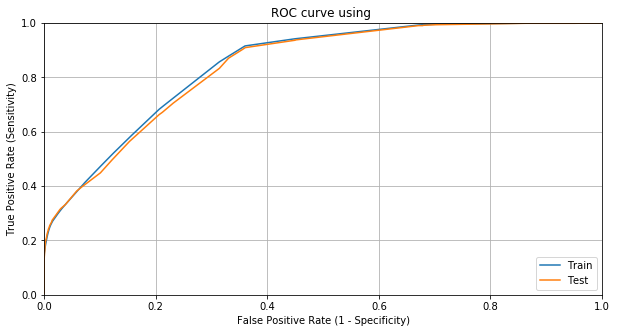

In [62]:
# ROC-AUC
plt.subplots(figsize=(10, 5))
train_prob = model.predict_proba(X_train)[:, 1]
test_prob = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_train['is_promoted'], train_prob,
                    y_test['is_promoted'], test_prob)

#### Confusion Matrix

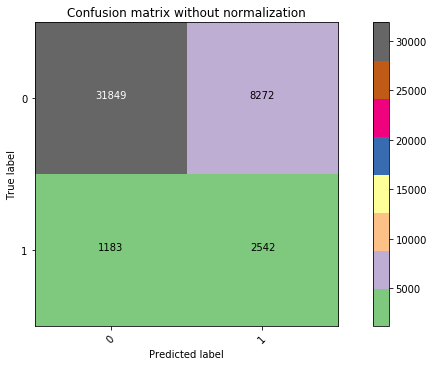

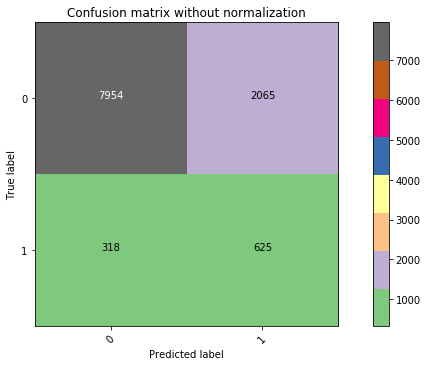

In [63]:
# Confusion matrices
plt.subplots(figsize=(10,5))
plot_confusion_matrix(confusion_matrix(
    y_train['is_promoted'], train_pred), normalize=False)

plt.subplots(figsize=(10,5))
plot_confusion_matrix(confusion_matrix(
    y_test['is_promoted'], test_pred), normalize=False)

#### Model Scoring

In [64]:
predictions = model.predict(X_valid)

In [65]:
emp_ids = validation['employee_id'].tolist()
results = pd.DataFrame({'employee_id' : emp_ids, 'is_promoted' : predictions})
results.to_csv('../data/processed/submission.csv', index=None)

In [66]:
joblib.dump(model, '../models/cb_f1.pickle')

['../models/cb_f1.pickle']